# Regression Project 1

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the training dataset

In [2]:
import os
os.chdir('D:/Datasets/')

In [3]:
import pandas as pd
df = pd.read_csv('training_set.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Check basic details from the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
m = df.isna().sum()
m

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
df.duplicated().sum()

0

### Drop any statistically insignificant features

In [9]:
df = df.drop(columns=['Id'])
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

### Descriptive Analysis

In [10]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [11]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [12]:
cat =list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [13]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [14]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [15]:
df[con].describe().T.head()

count          mean          std     min     25%     50%  \
MSSubClass   1460.0     56.897260    42.300571    20.0    20.0    50.0   
LotFrontage  1201.0     70.049958    24.284752    21.0    59.0    69.0   
LotArea      1460.0  10516.828082  9981.264932  1300.0  7553.5  9478.5   
OverallQual  1460.0      6.099315     1.382997     1.0     5.0     6.0   
OverallCond  1460.0      5.575342     1.112799     1.0     5.0     5.0   

                 75%       max  
MSSubClass      70.0     190.0  
LotFrontage     80.0     313.0  
LotArea      11601.5  215245.0  
OverallQual      7.0      10.0  
OverallCond      6.0       9.0

In [16]:
df[cat].describe().T.head()

count unique   top  freq
MSZoning     1460      5    RL  1151
Street       1460      2  Pave  1454
Alley          91      2  Grvl    50
LotShape     1460      4   Reg   925
LandContour  1460      4   Lvl  1311

### Univariate Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

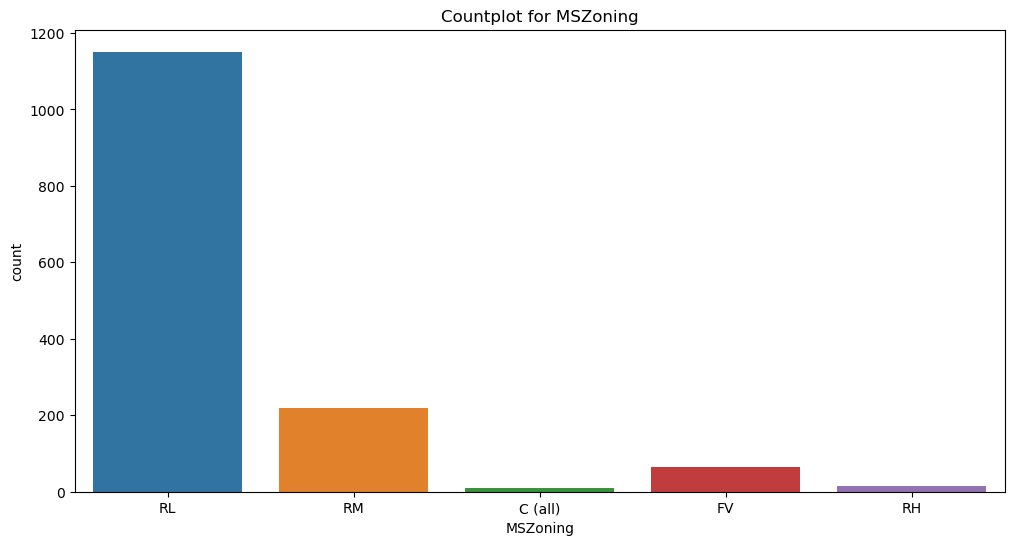

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='MSZoning')
plt.title('Countplot for MSZoning')
plt.show()

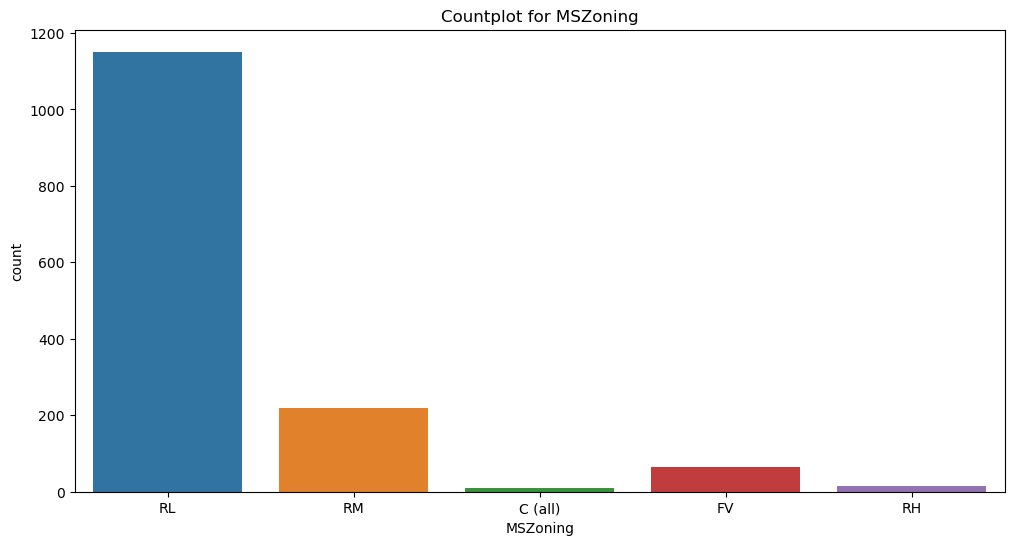

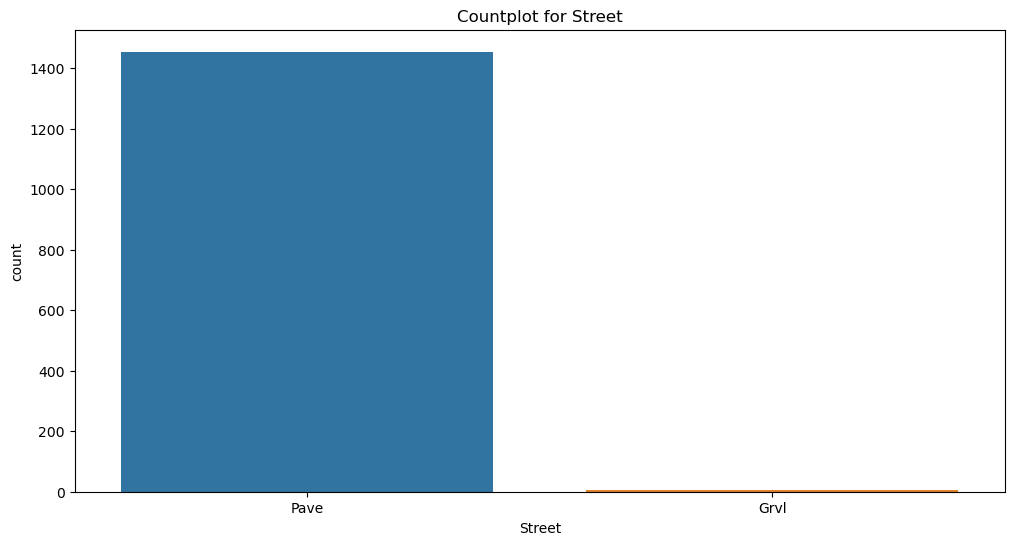

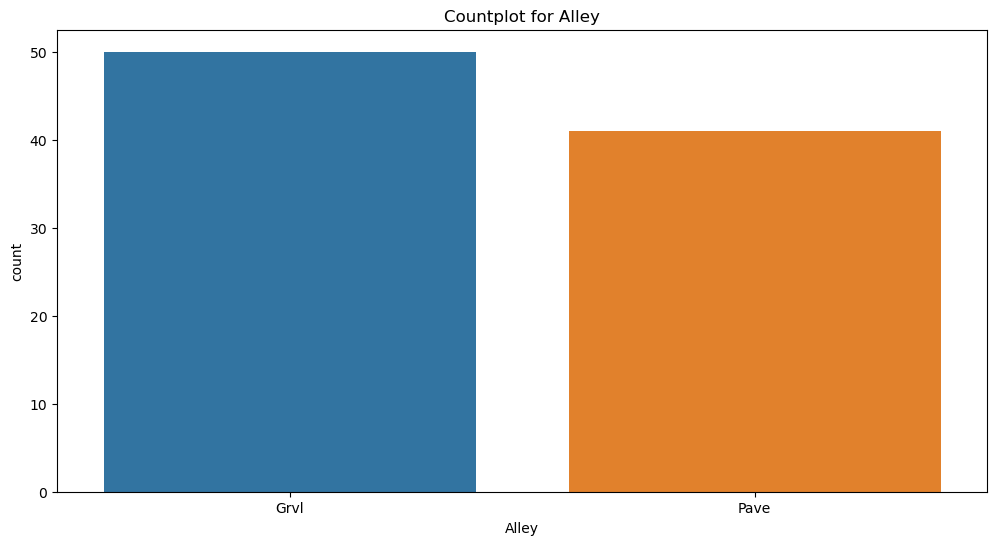

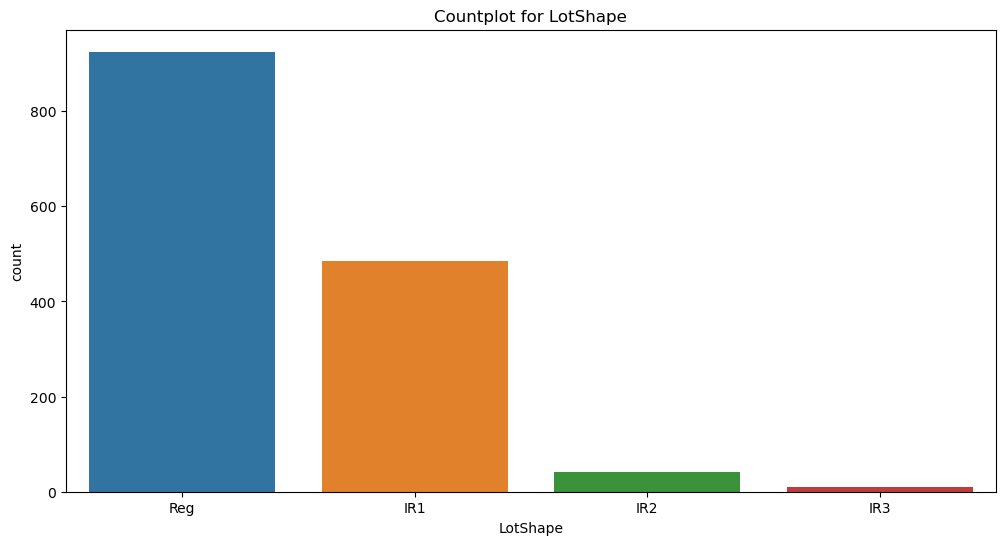

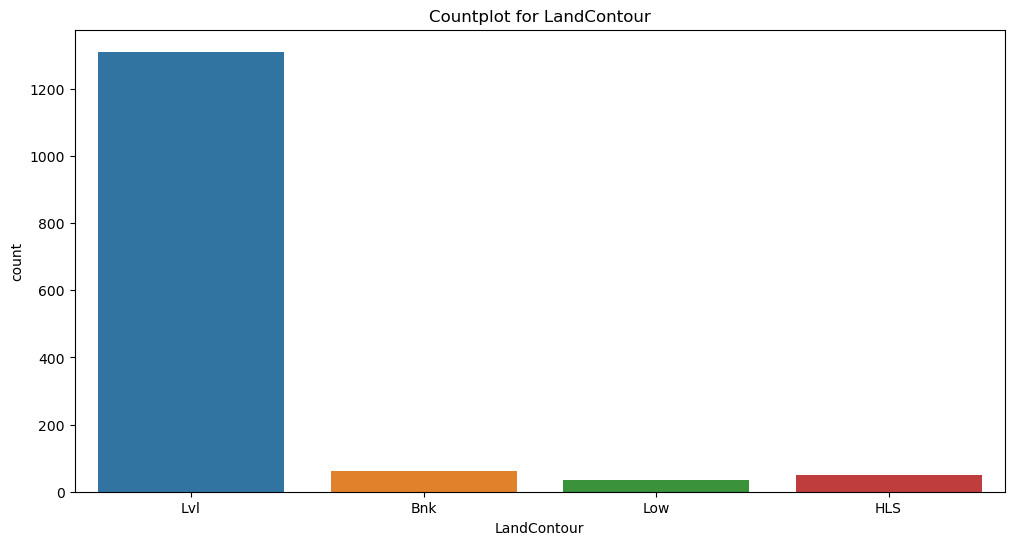

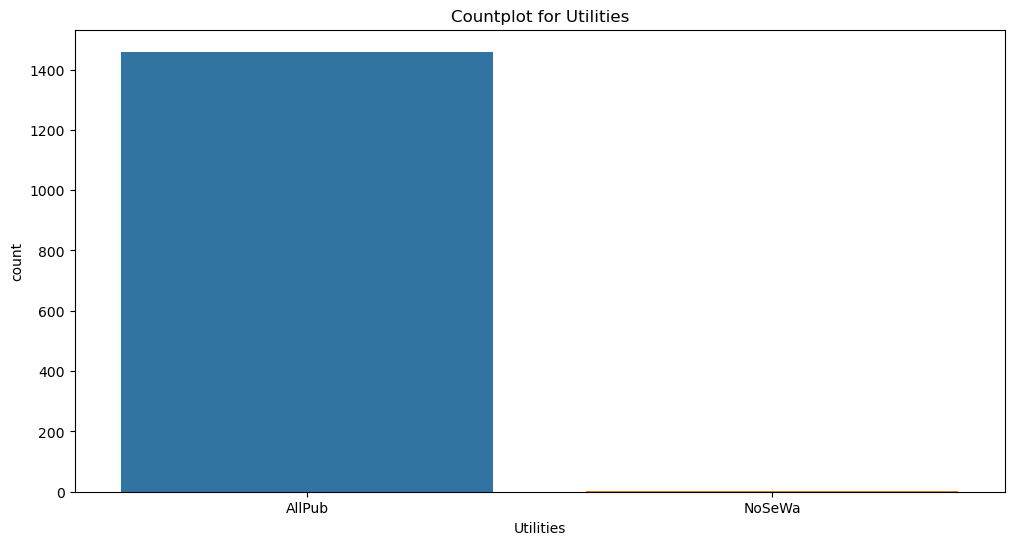

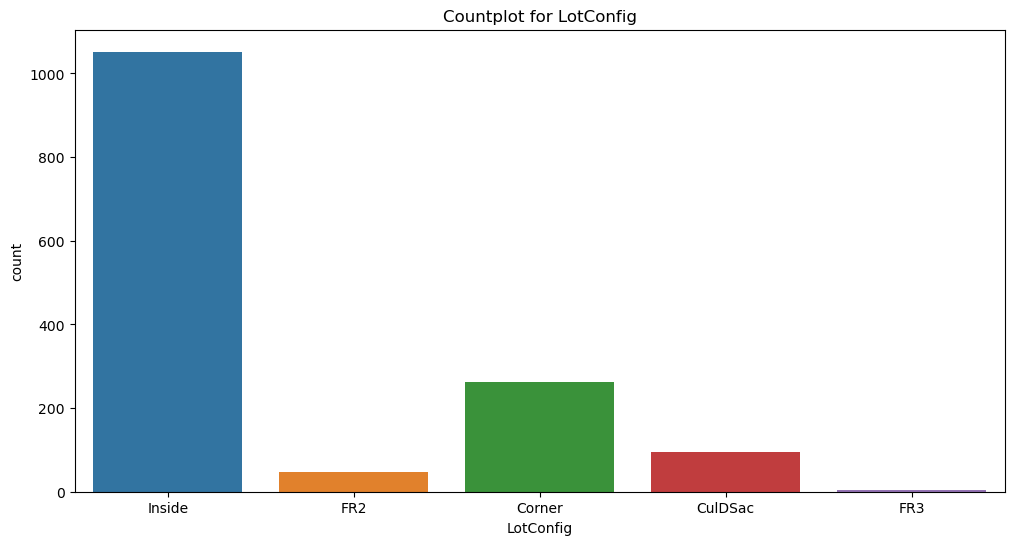

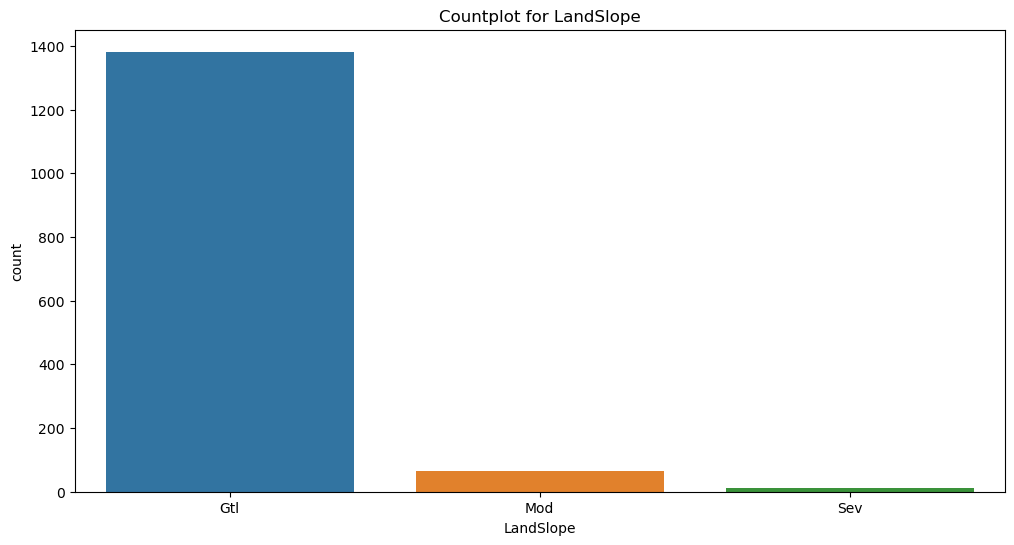

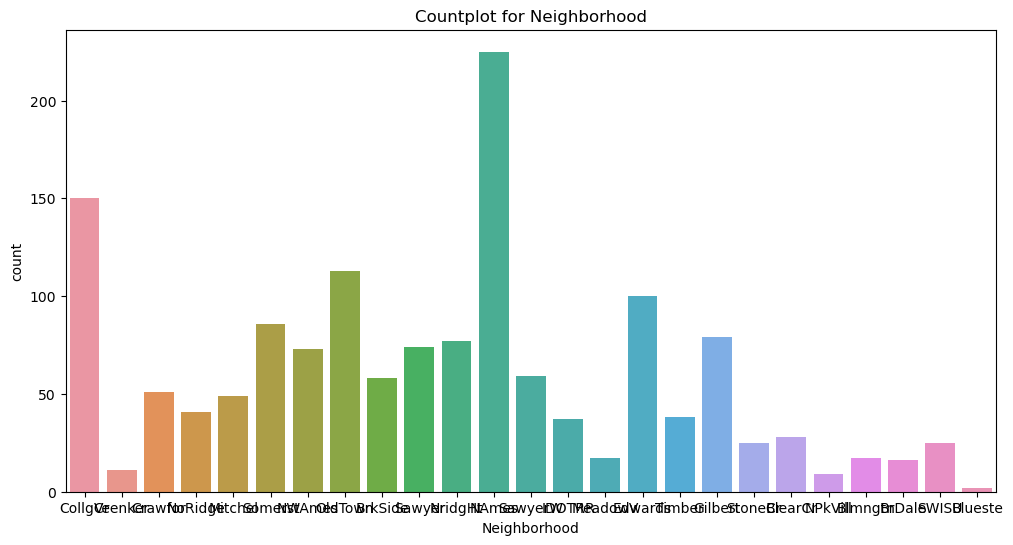

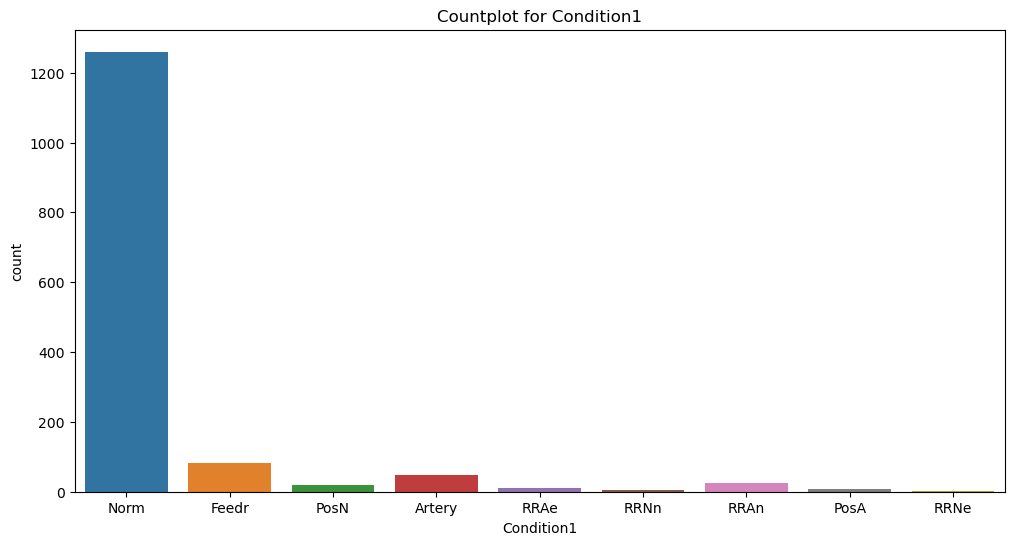

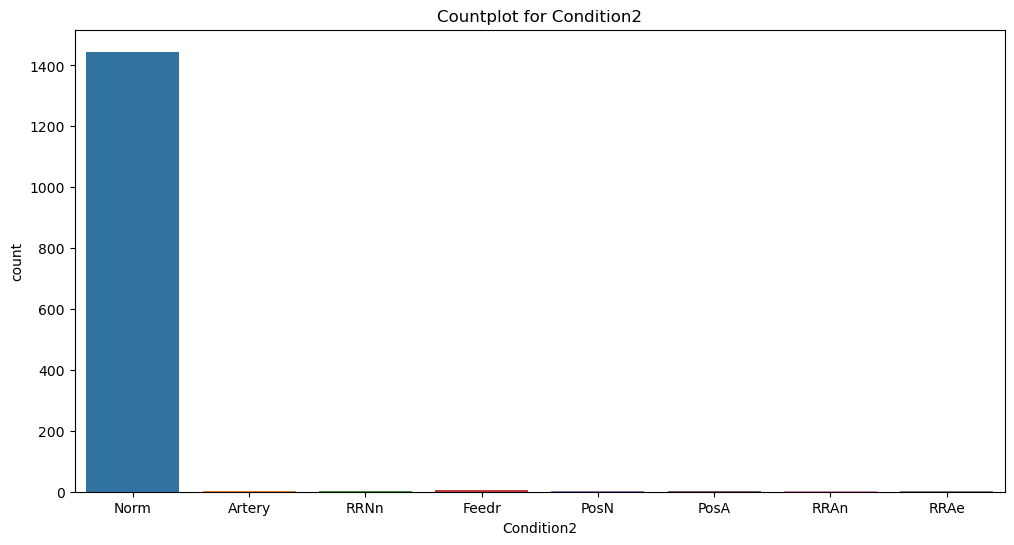

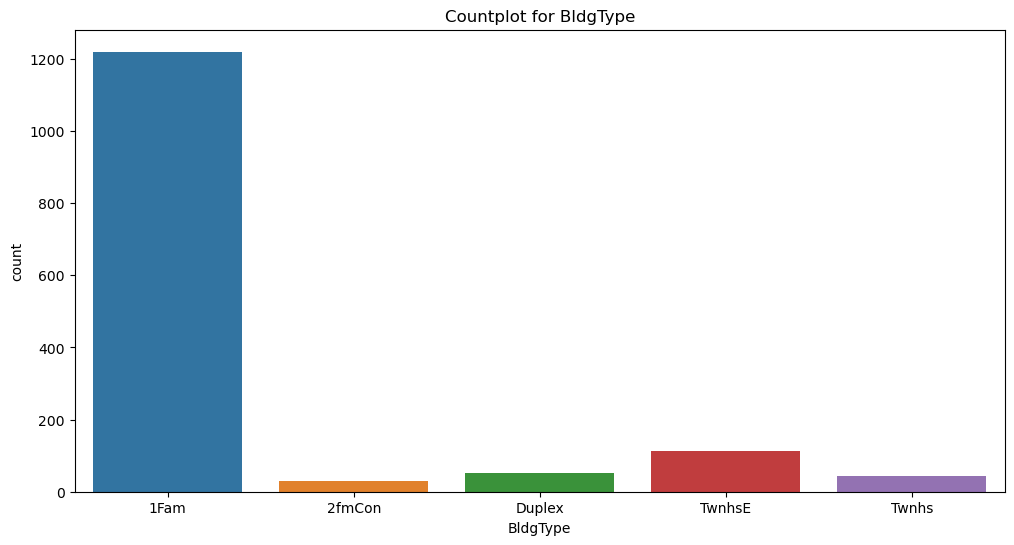

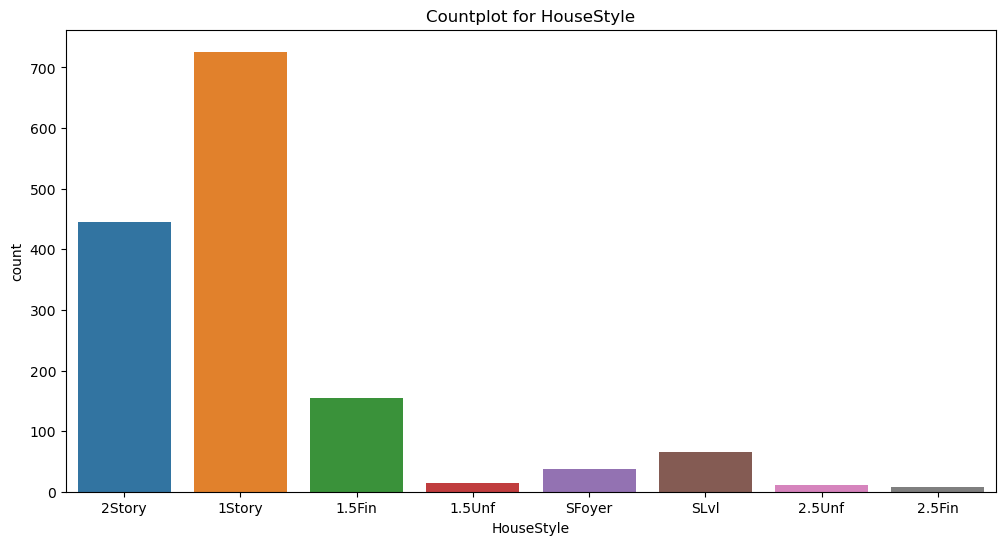

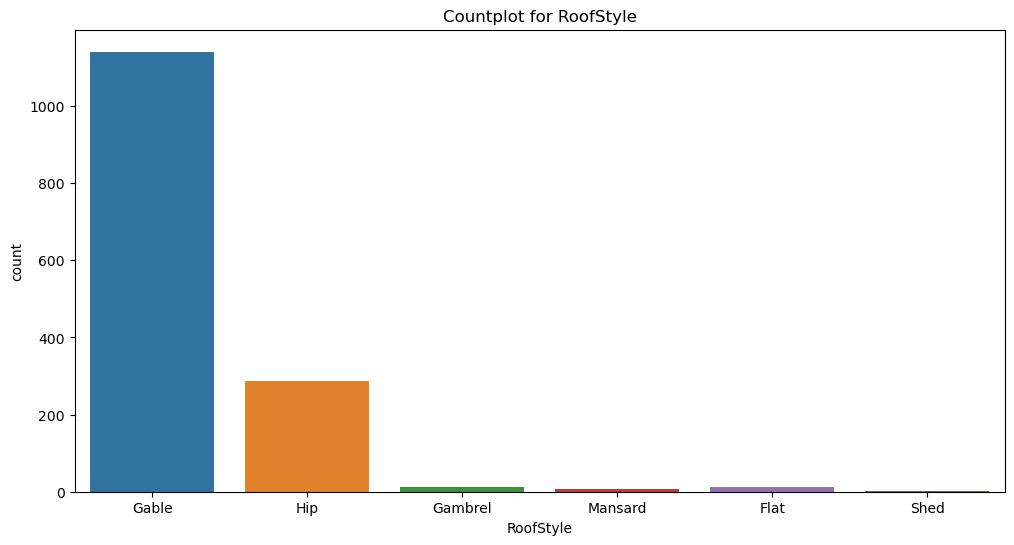

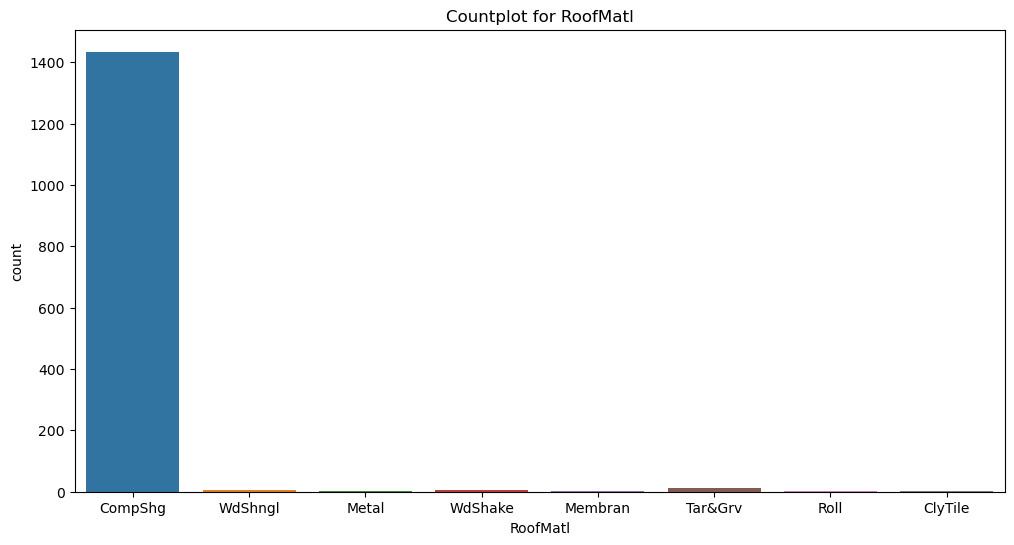

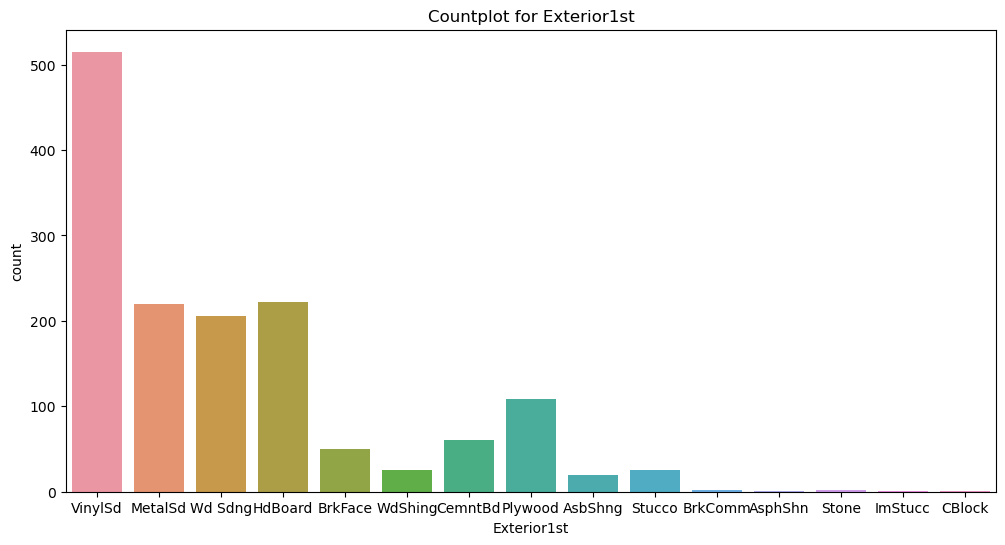

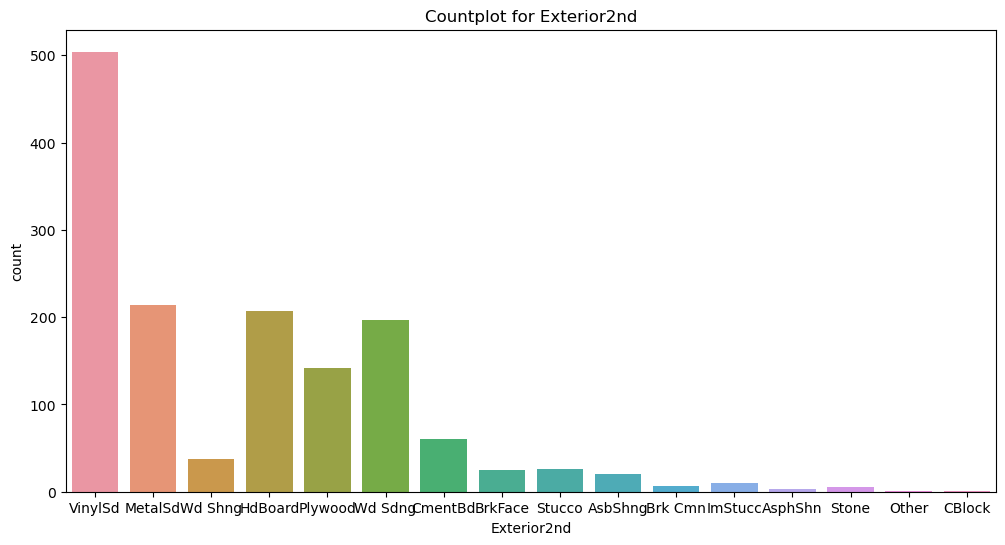

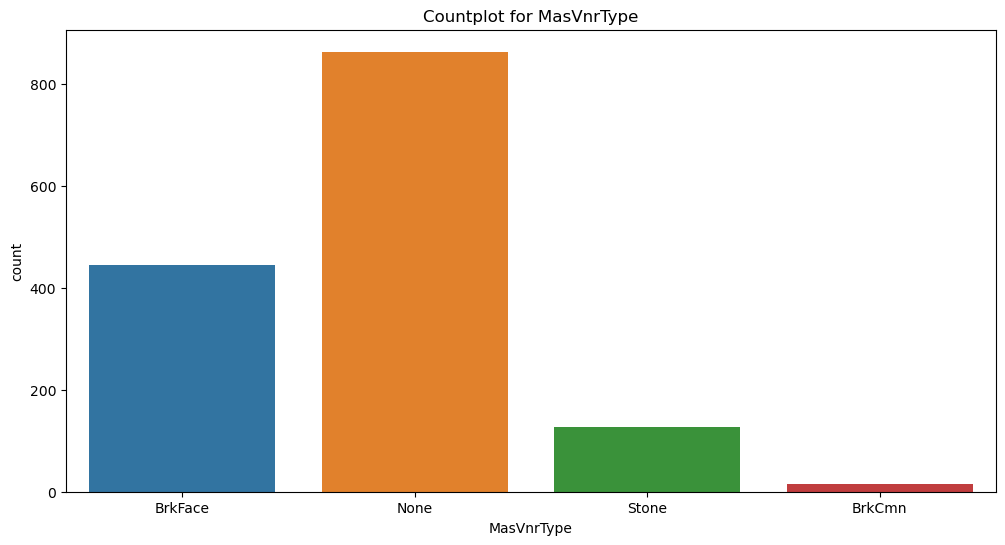

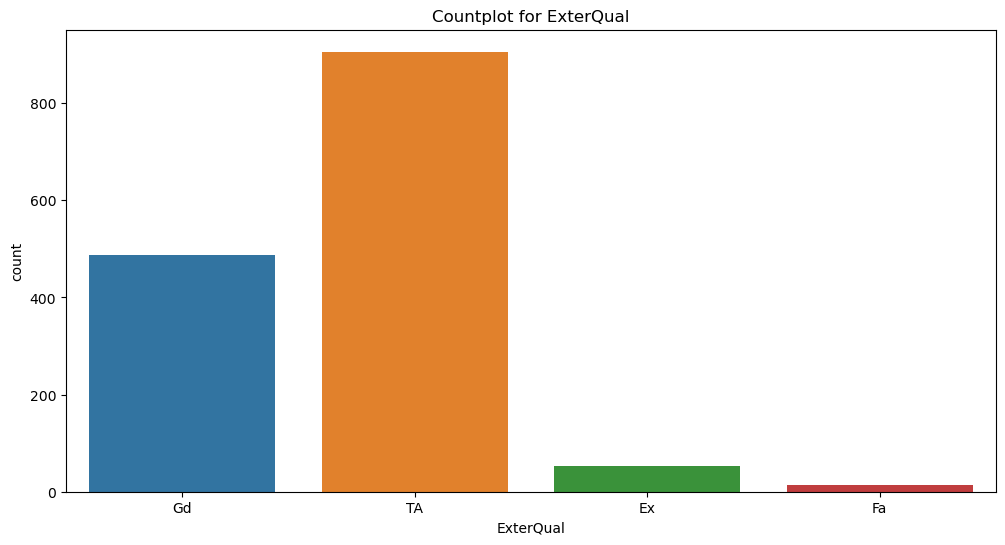

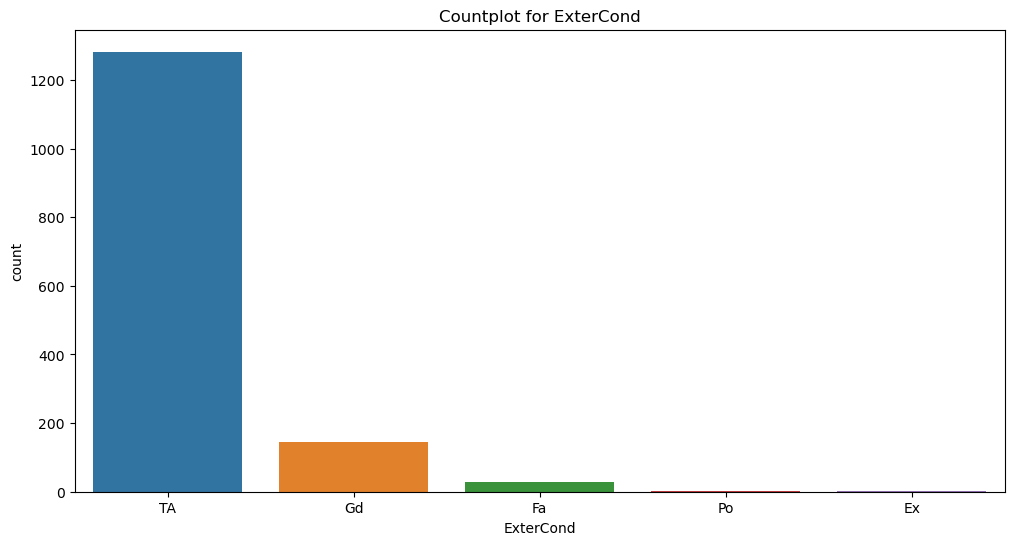

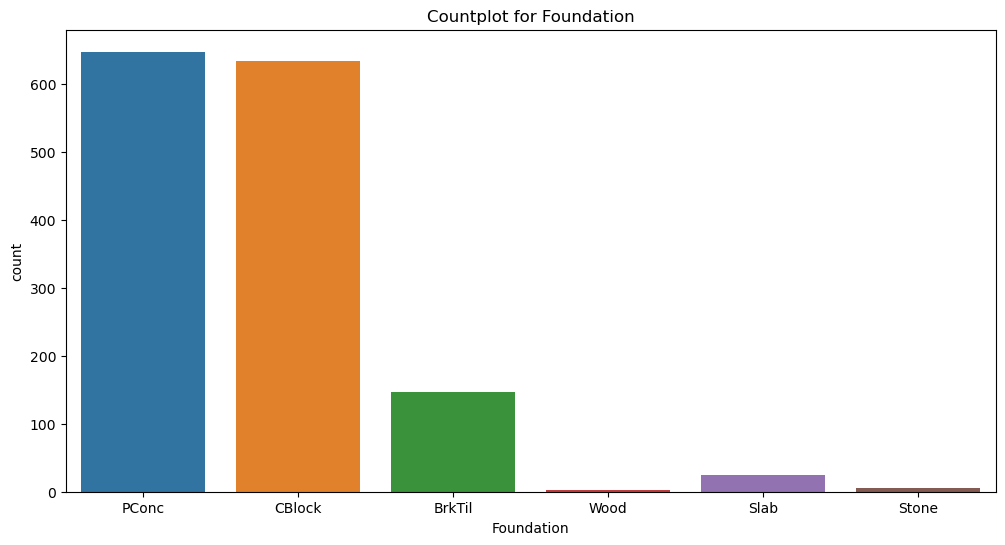

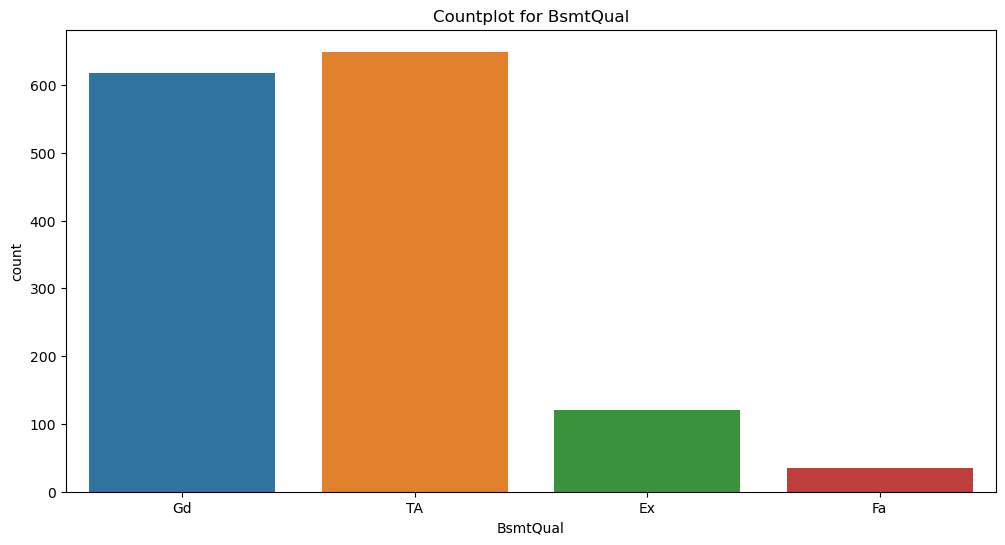

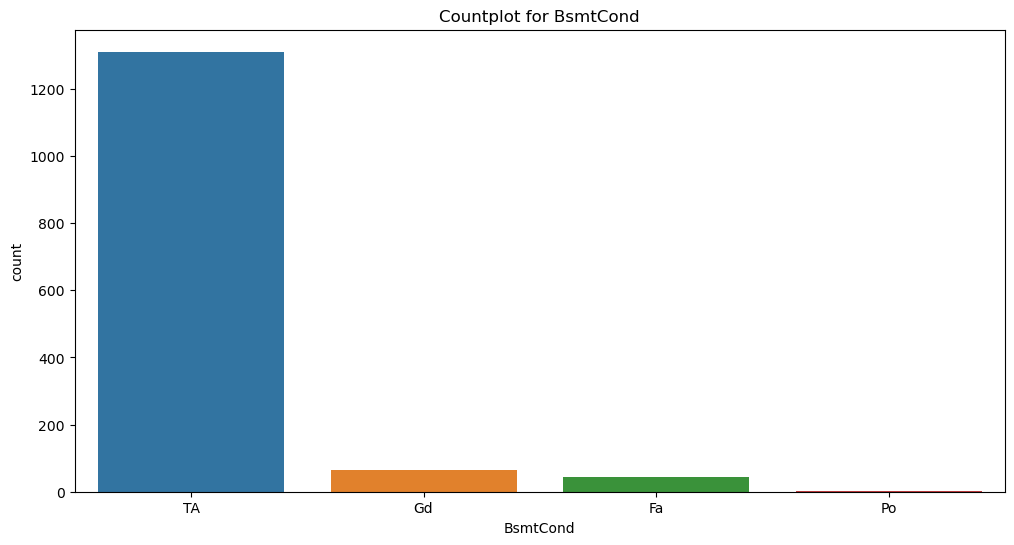

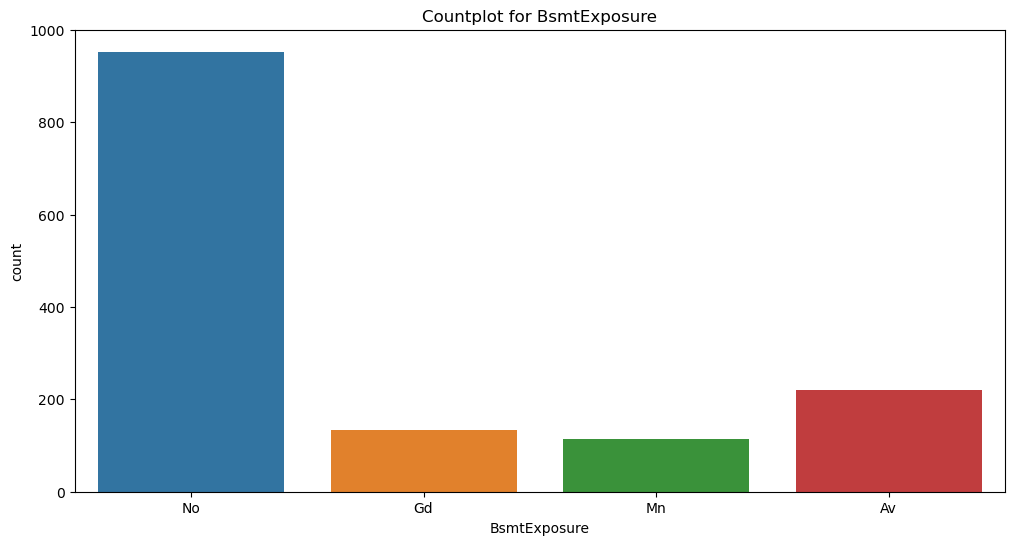

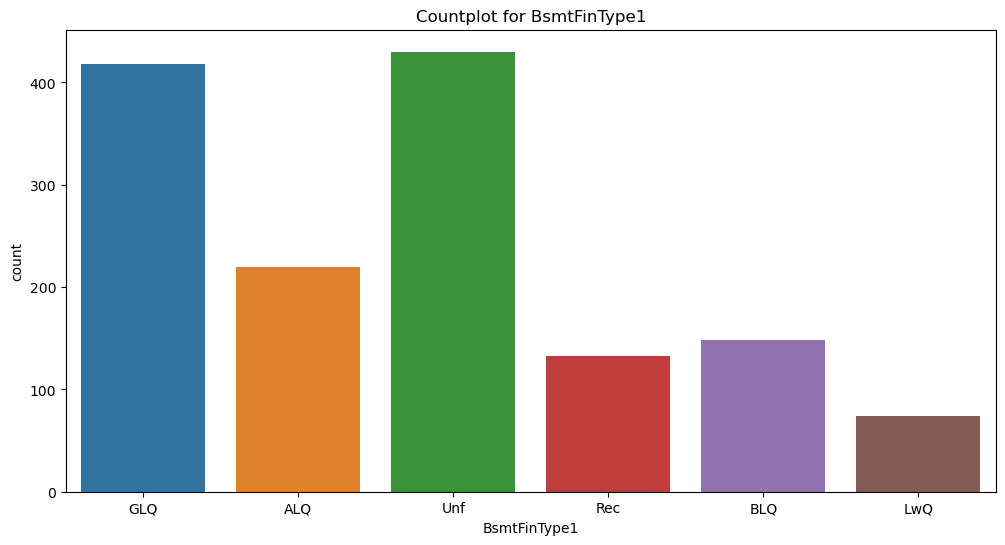

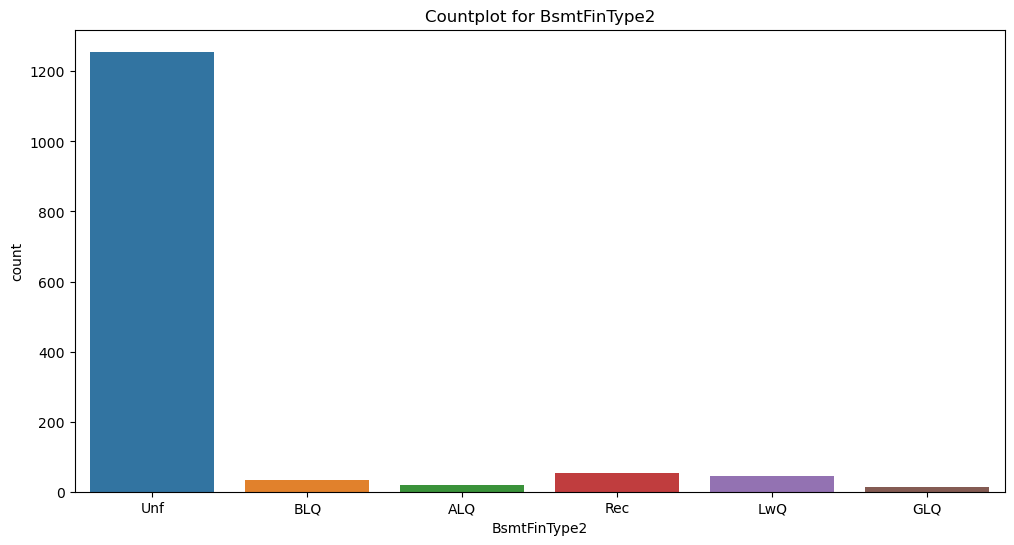

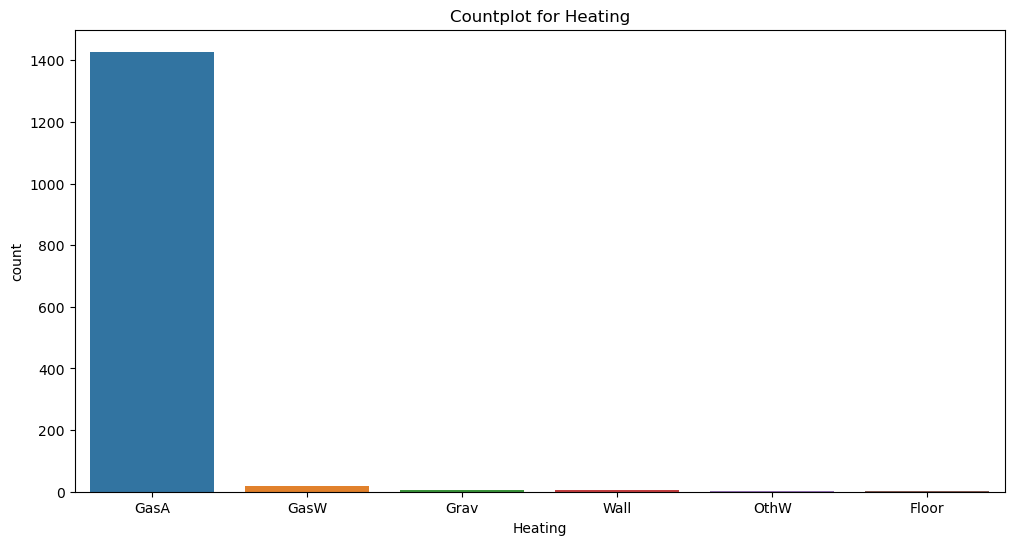

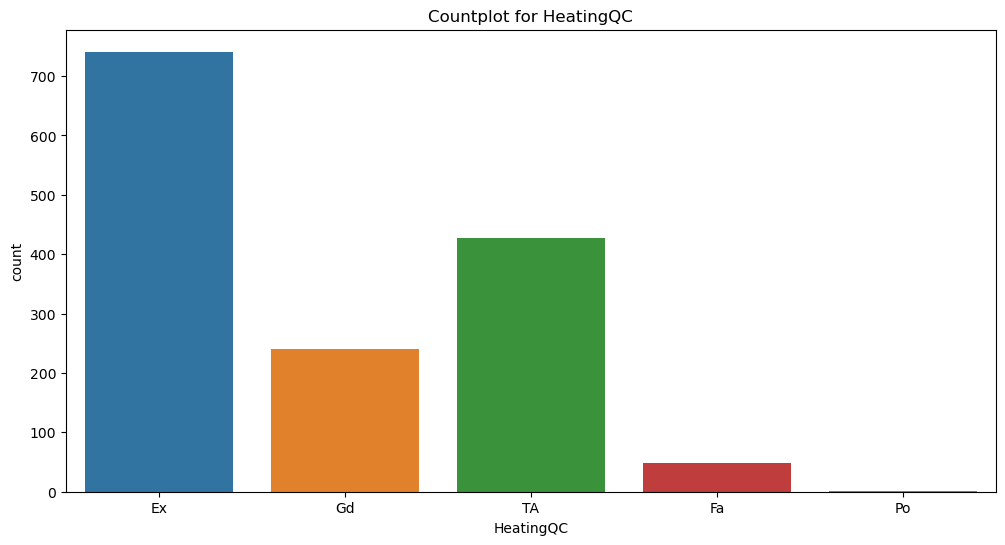

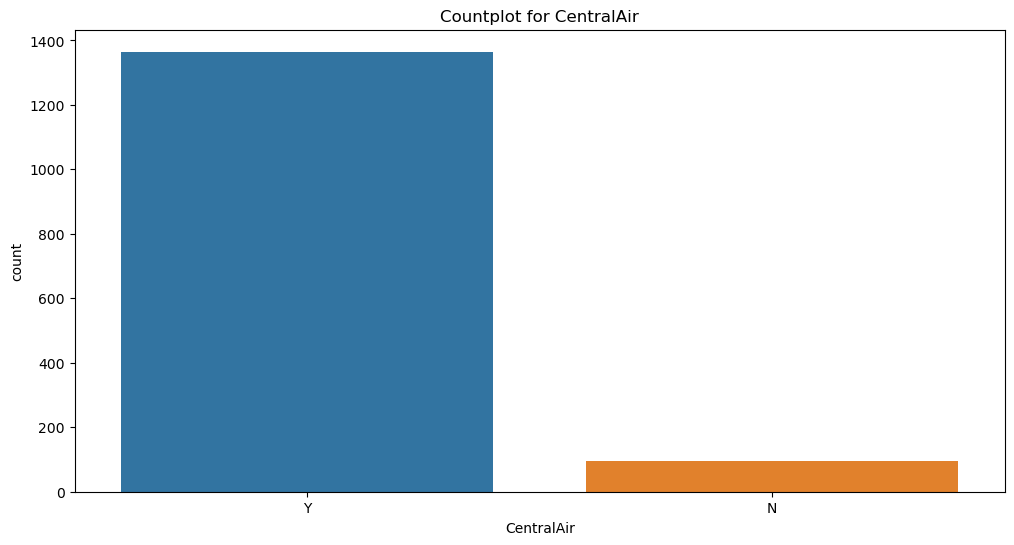

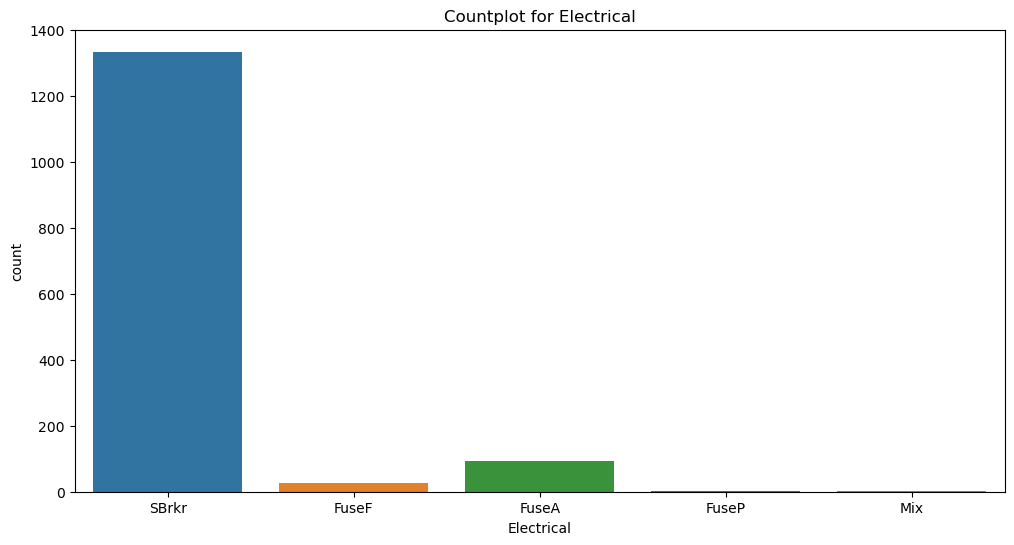

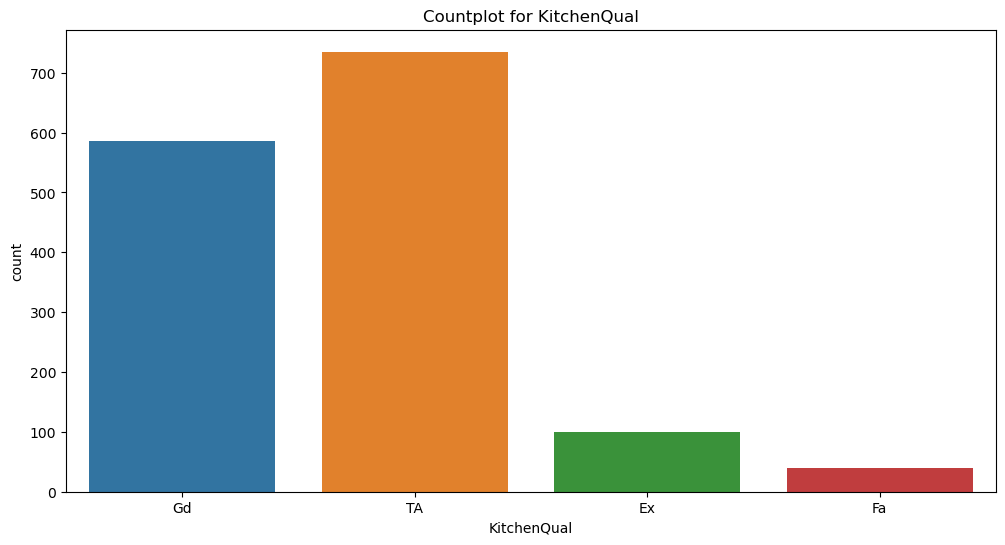

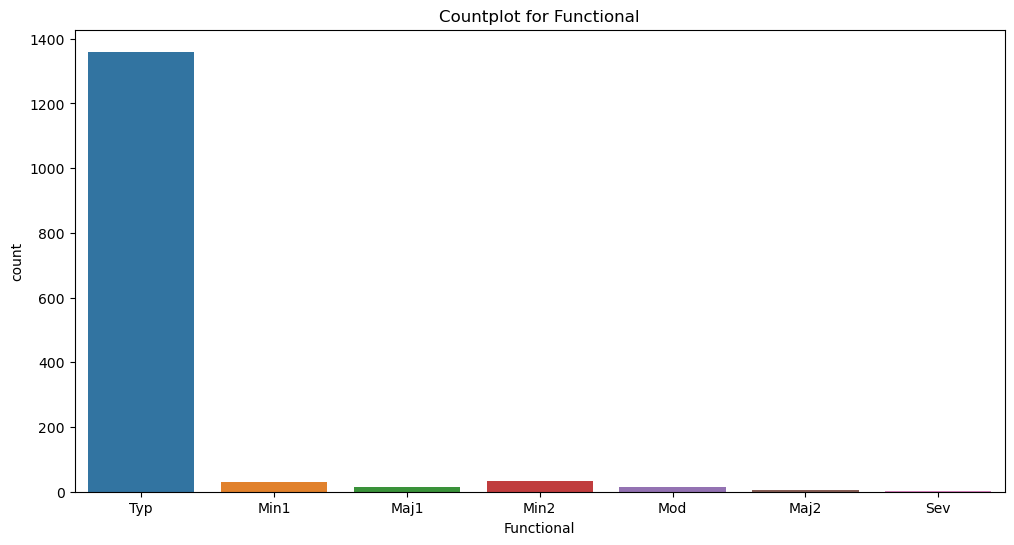

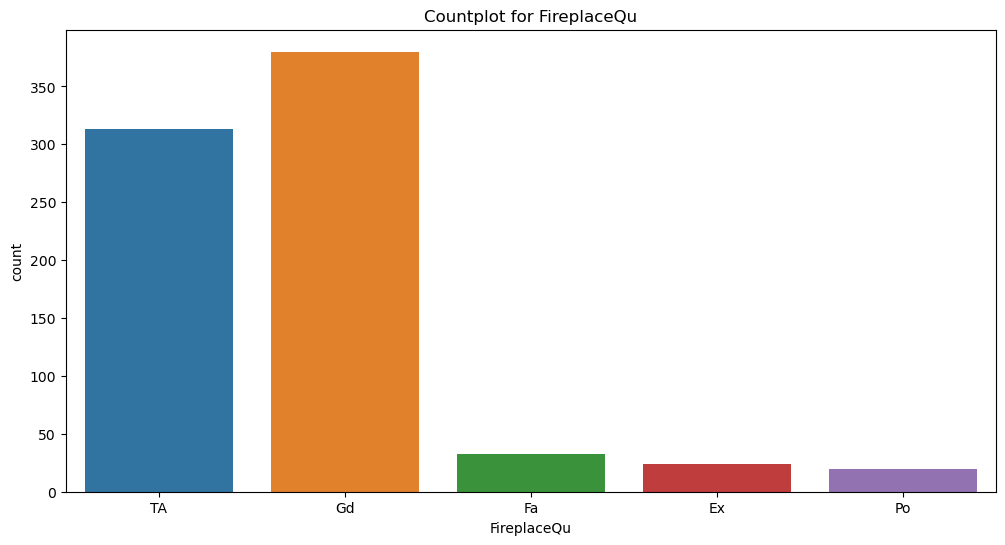

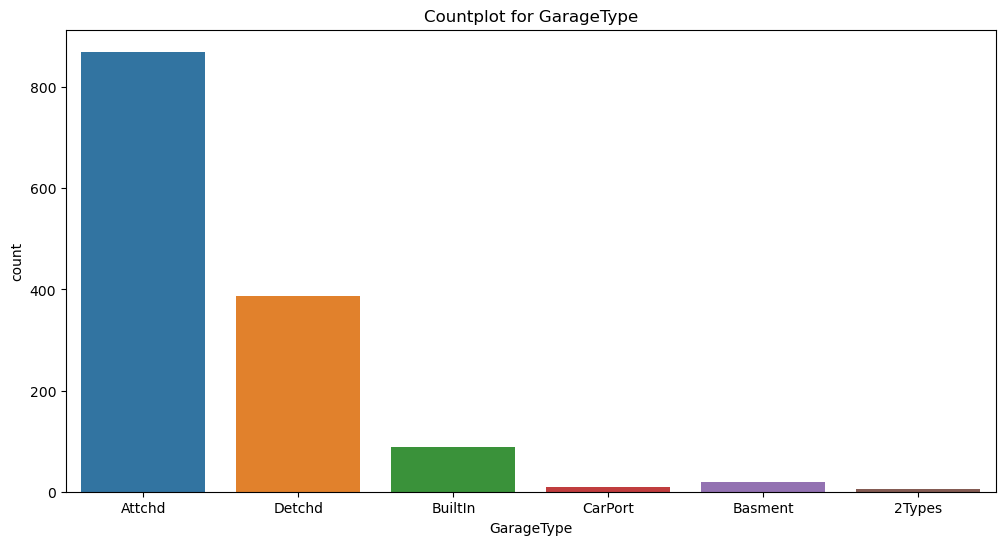

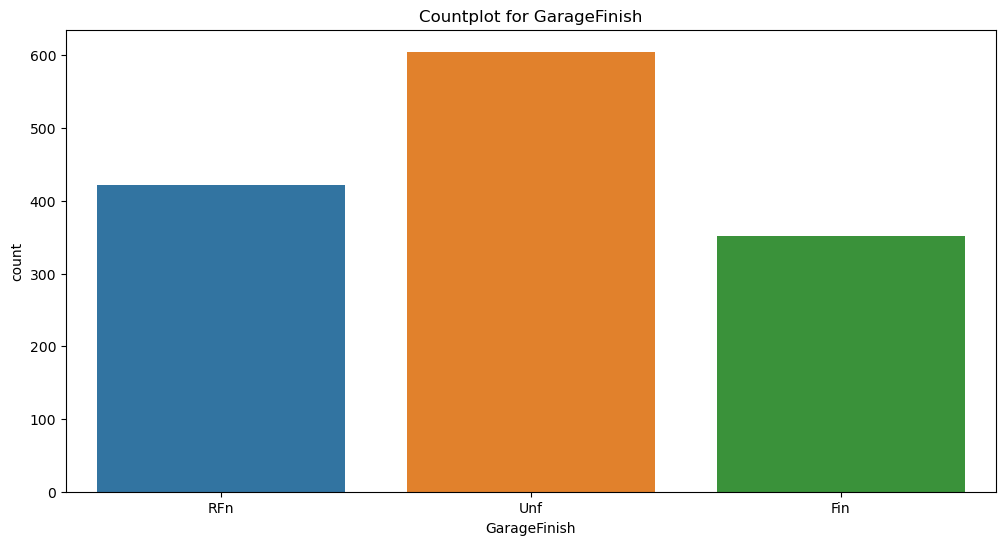

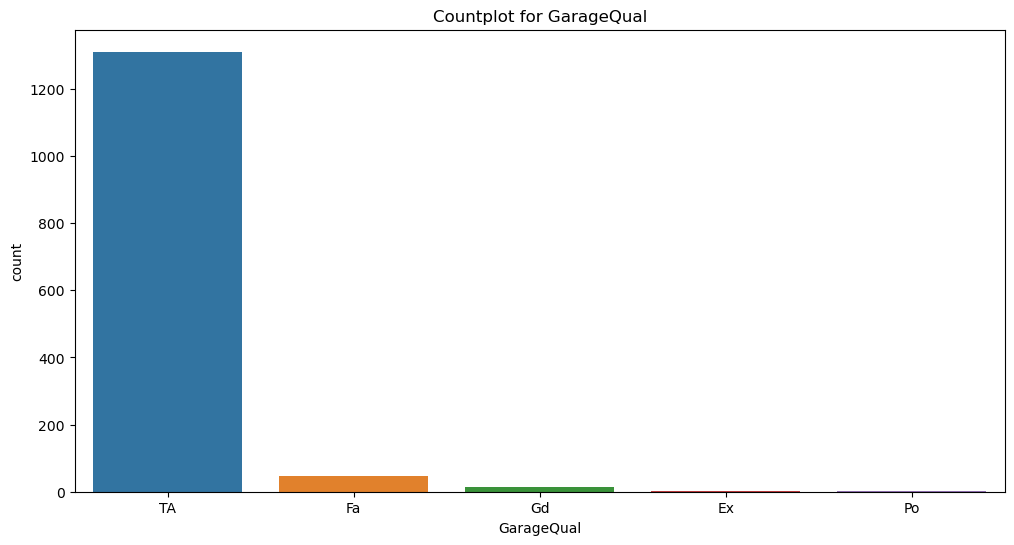

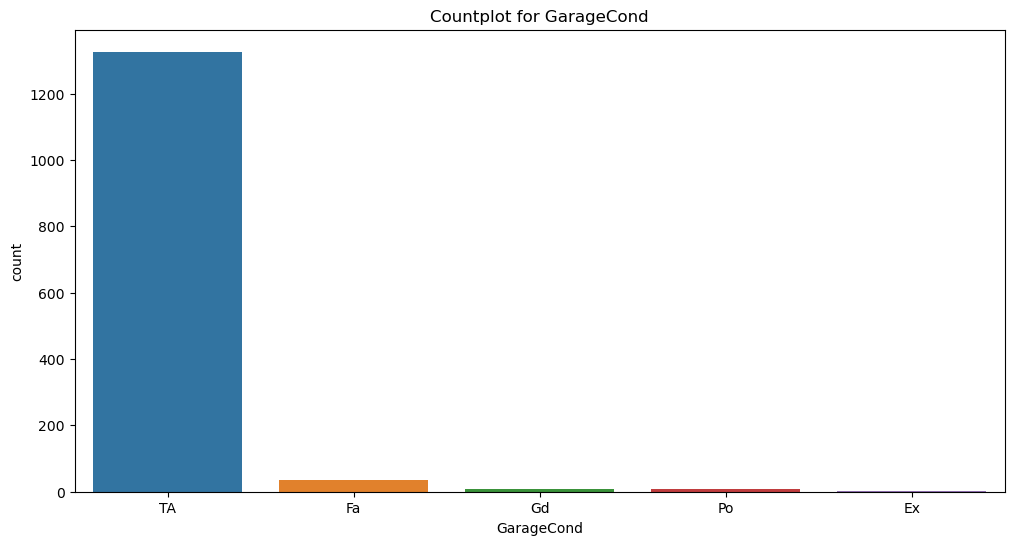

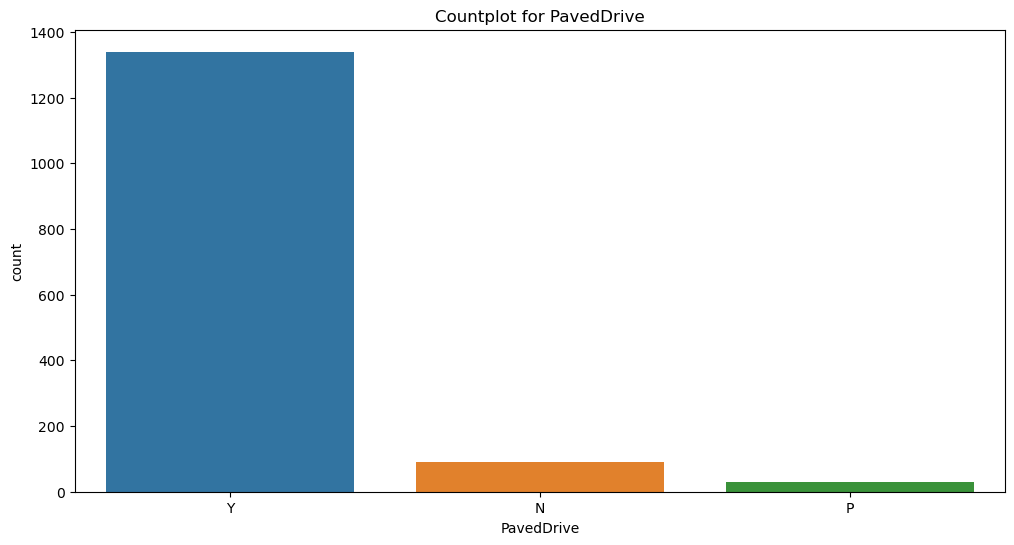

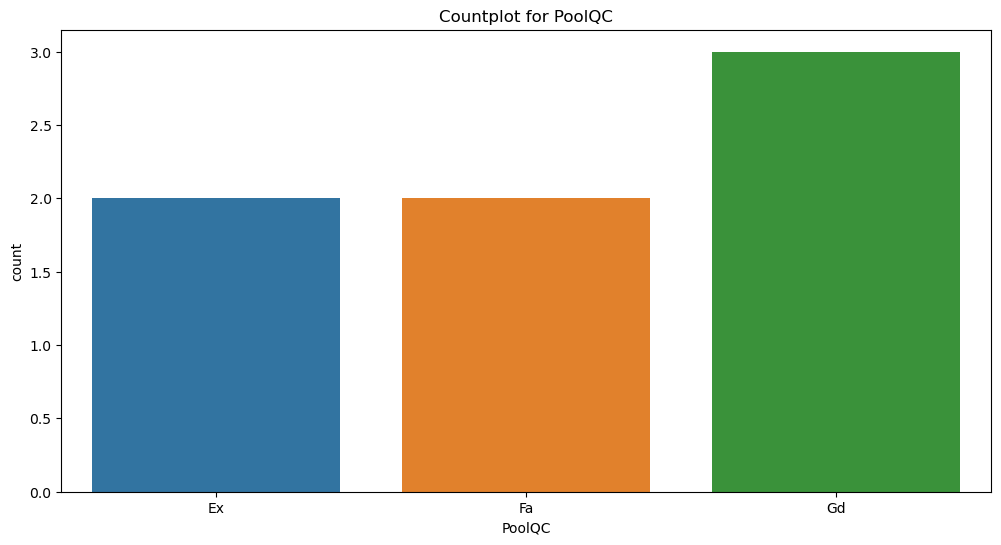

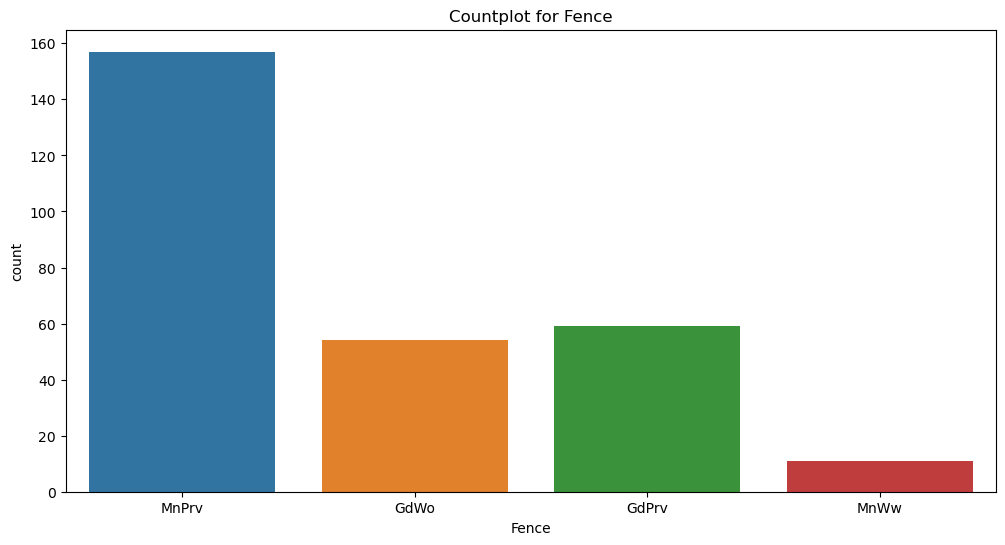

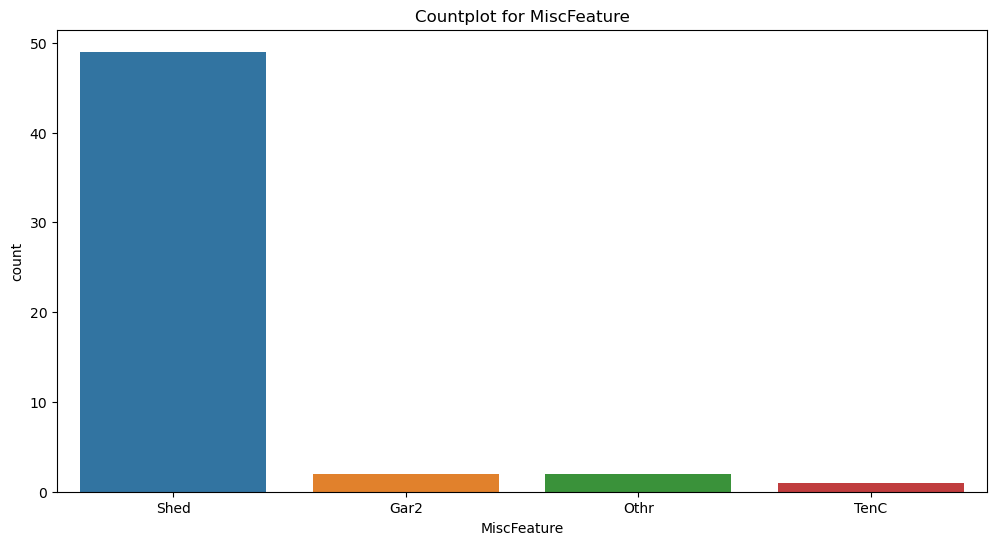

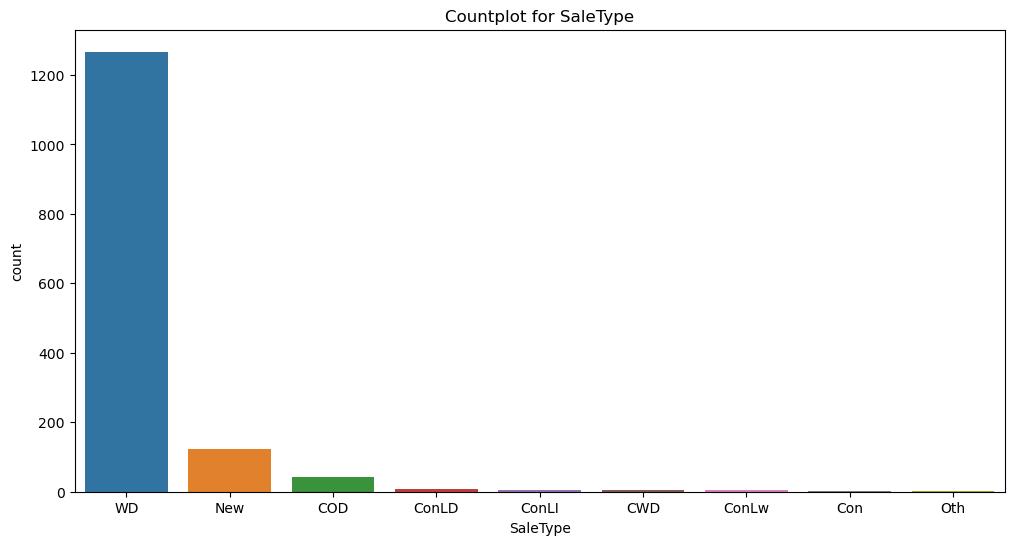

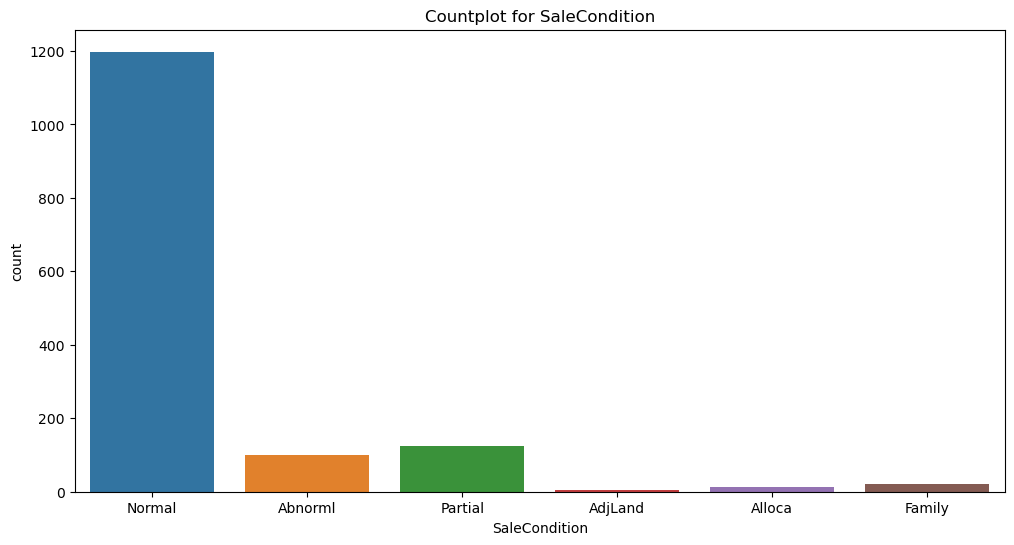

In [19]:
for i in cat:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x=i)
    plt.title(f'Countplot for {i}')
    plt.show()

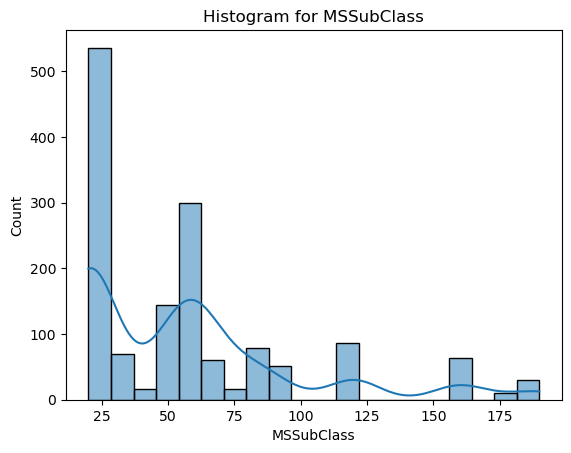

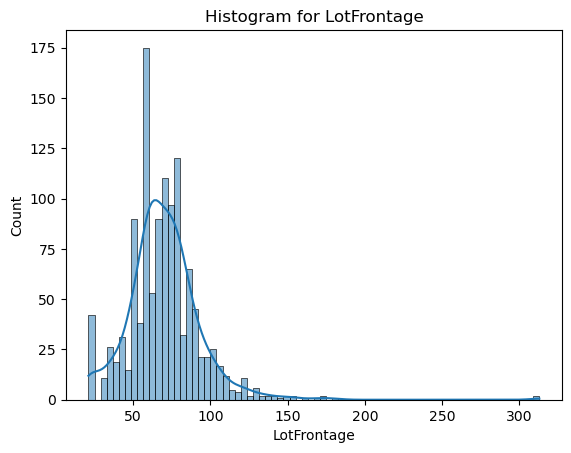

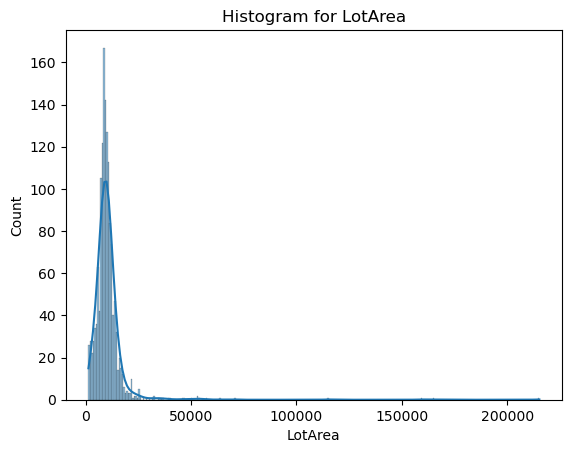

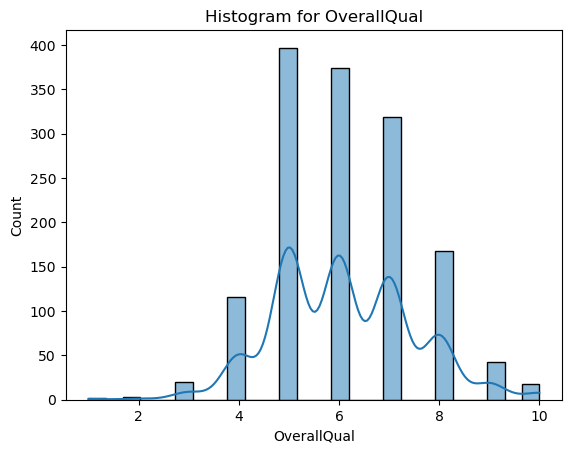

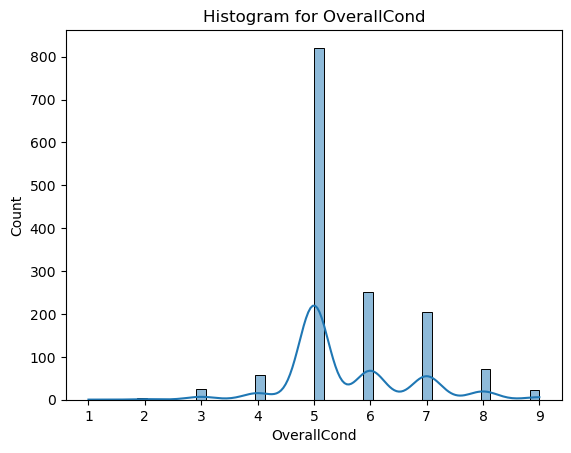

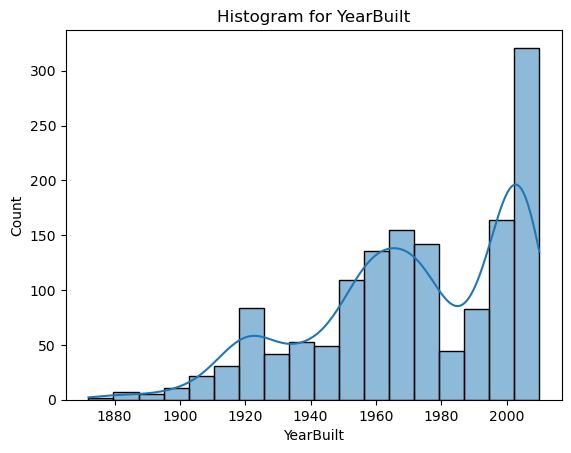

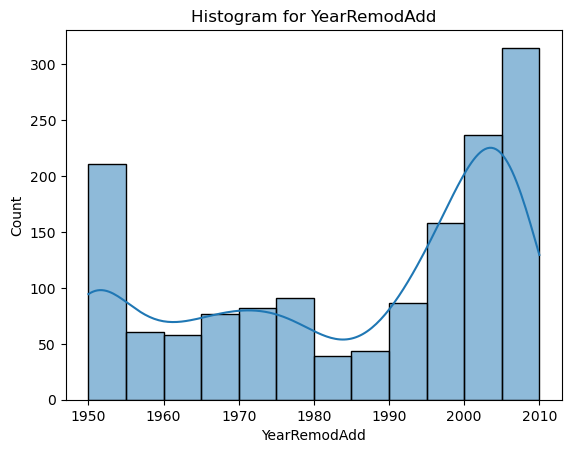

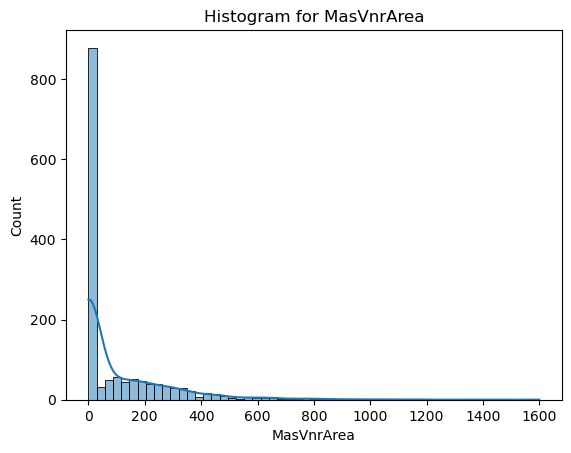

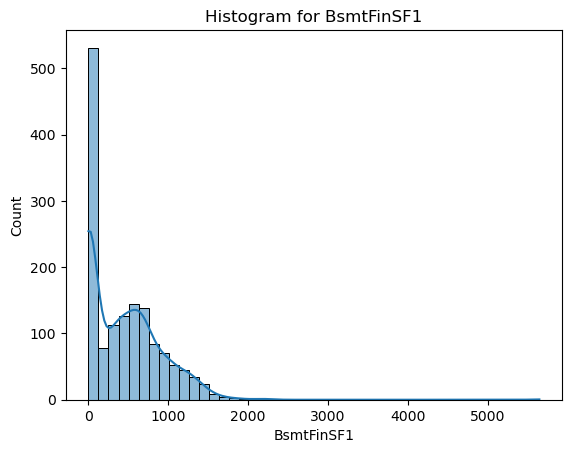

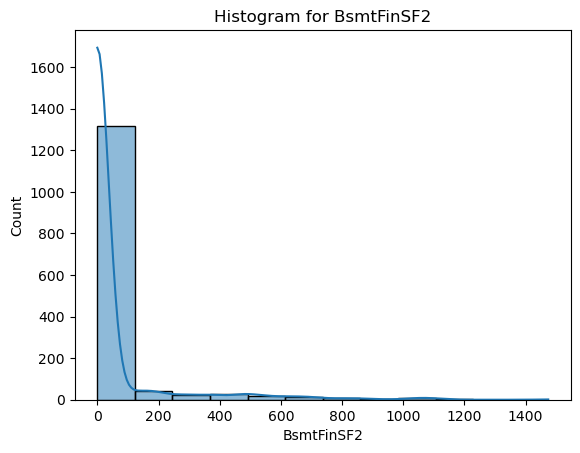

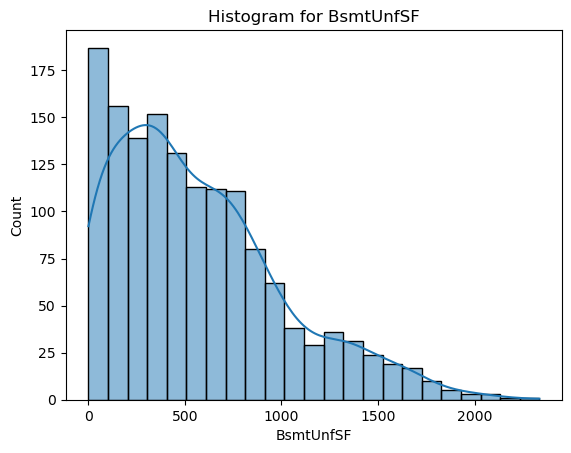

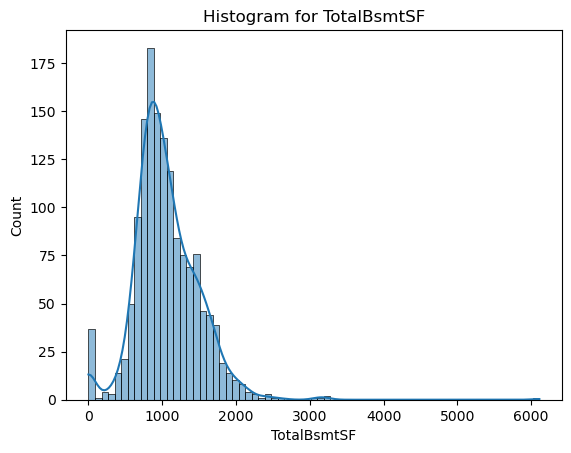

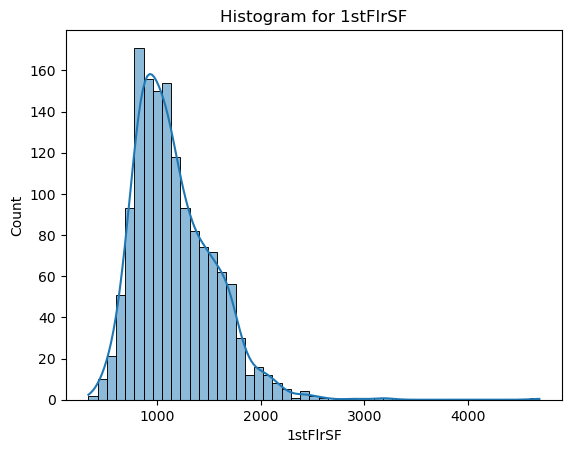

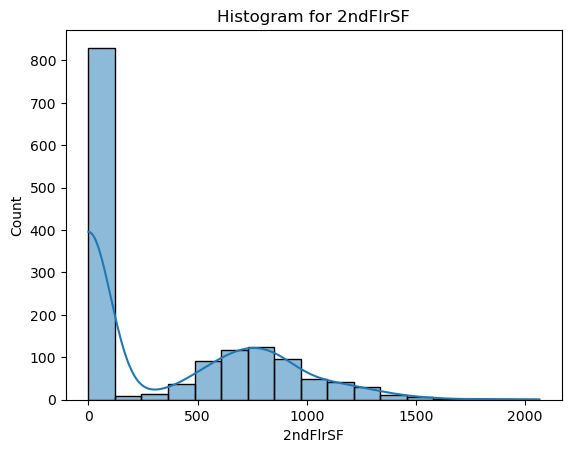

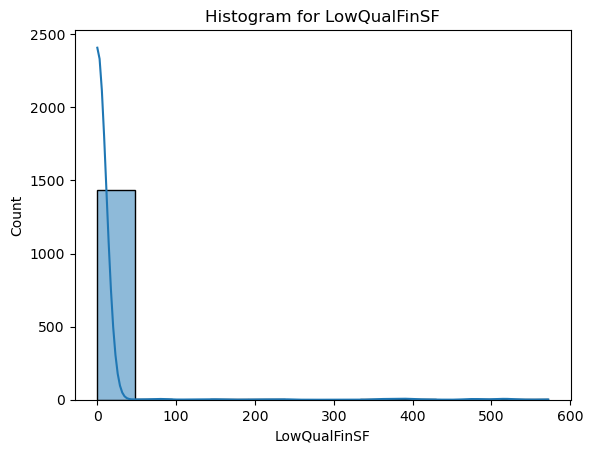

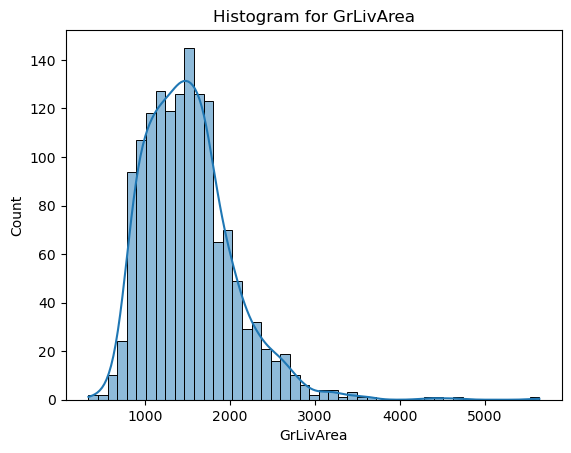

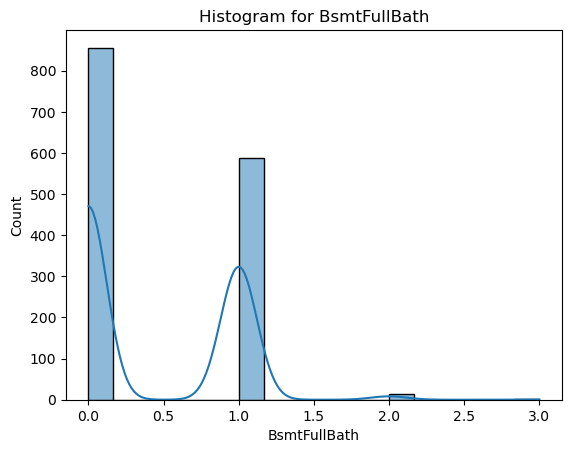

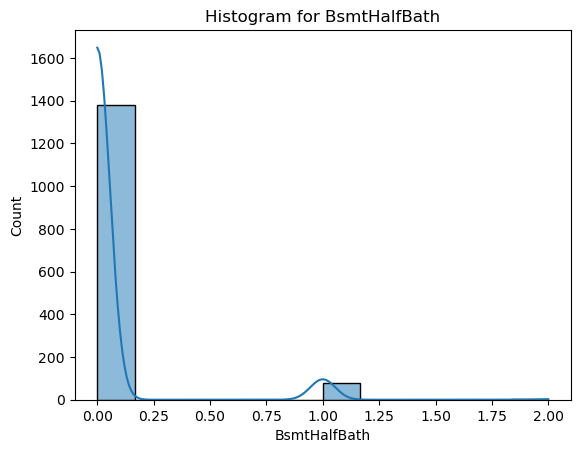

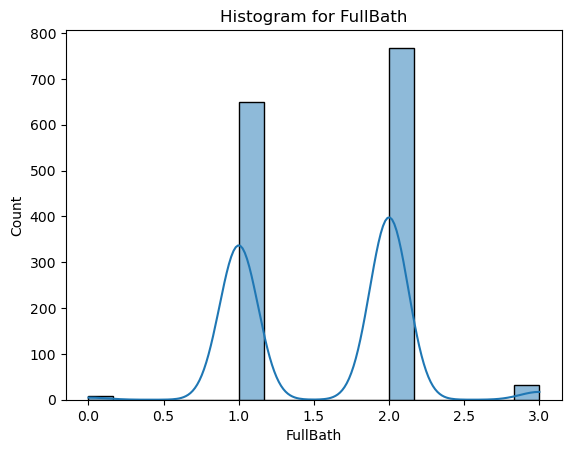

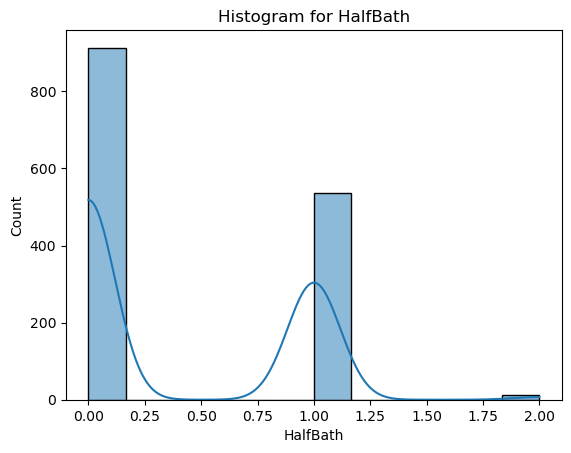

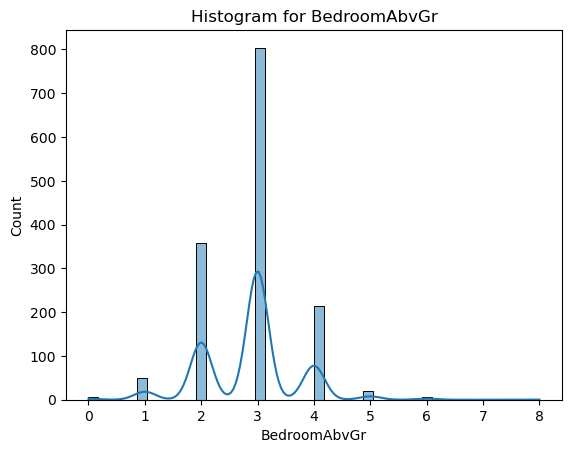

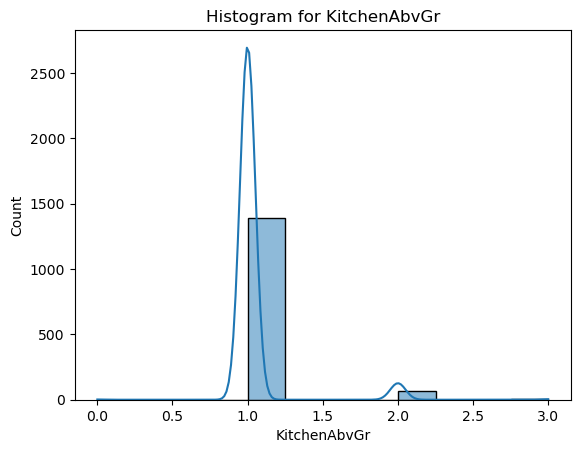

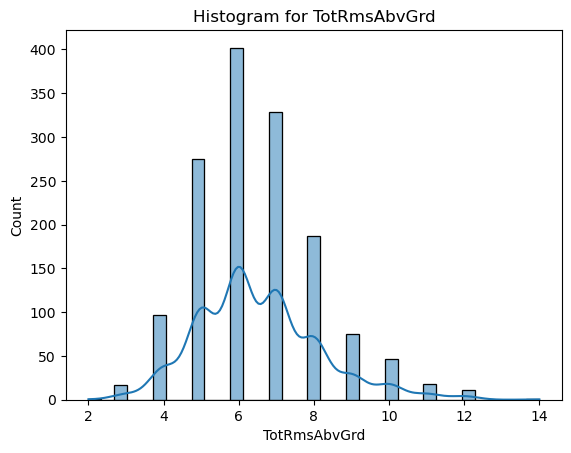

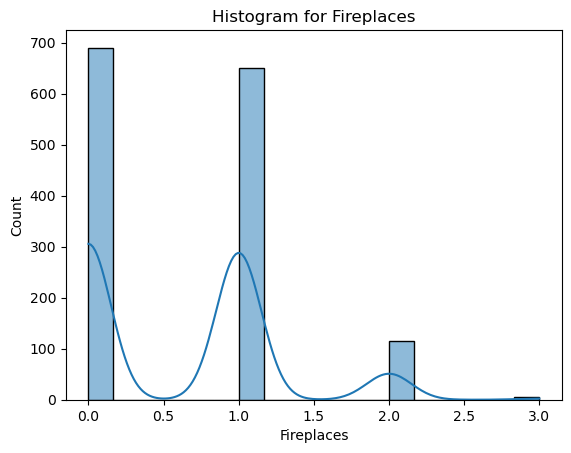

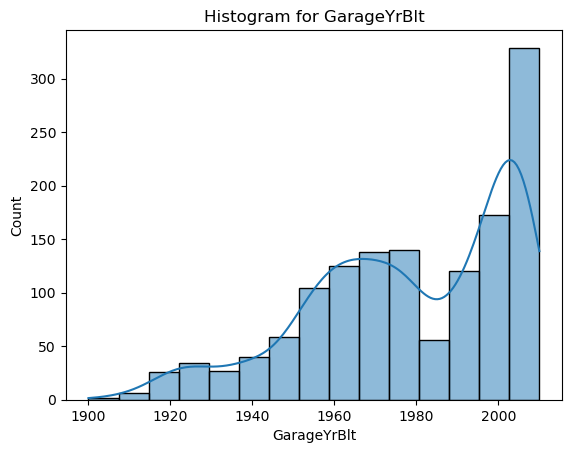

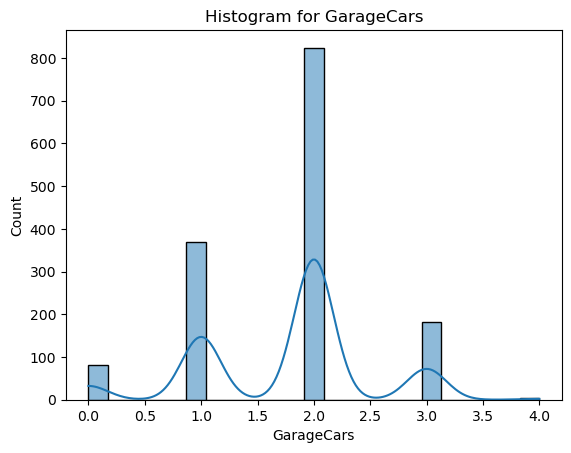

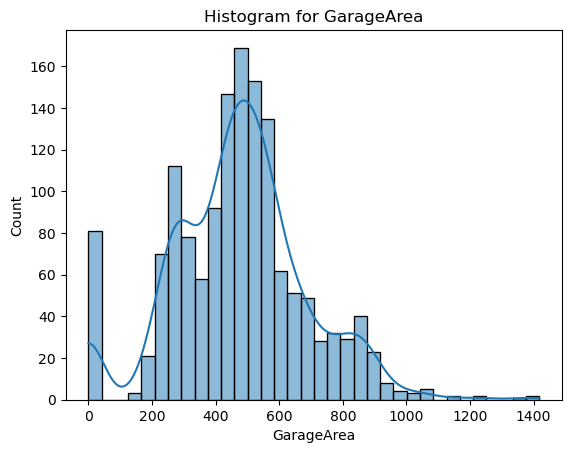

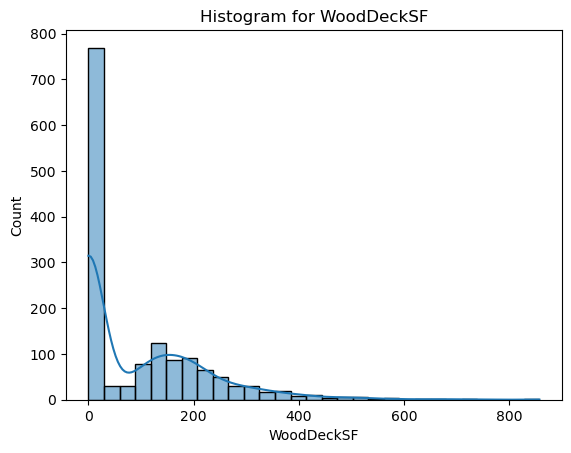

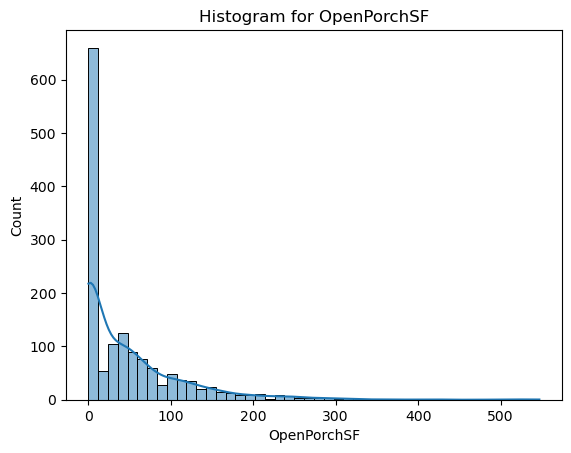

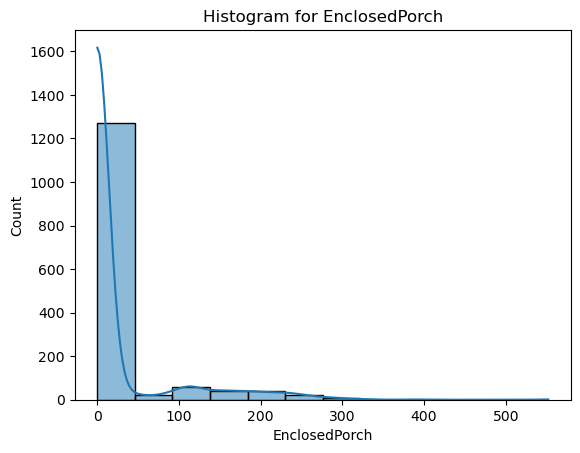

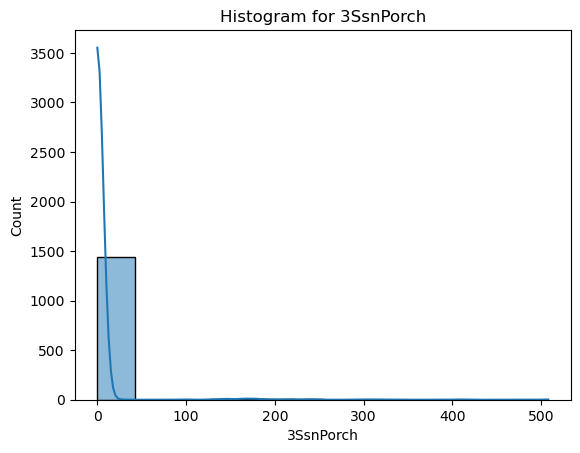

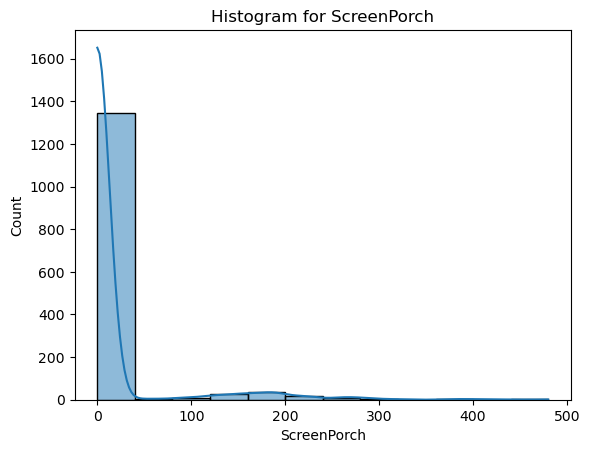

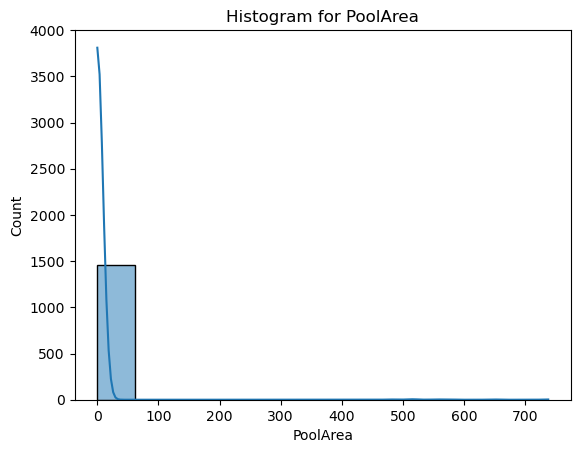

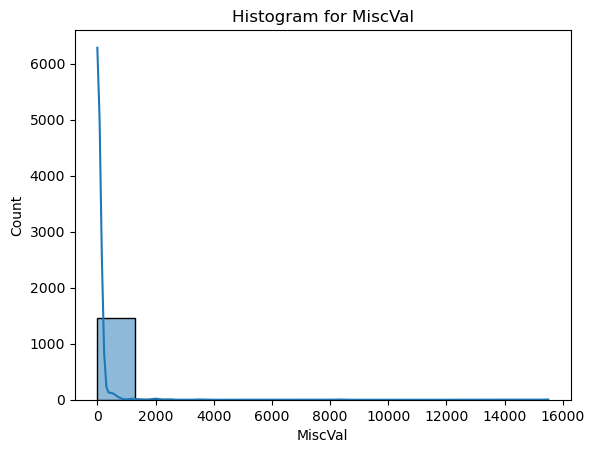

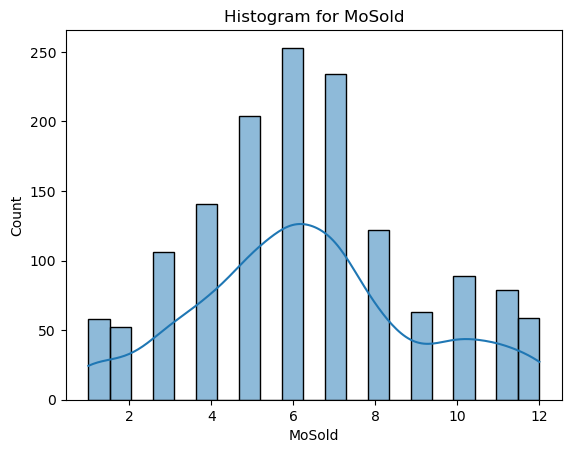

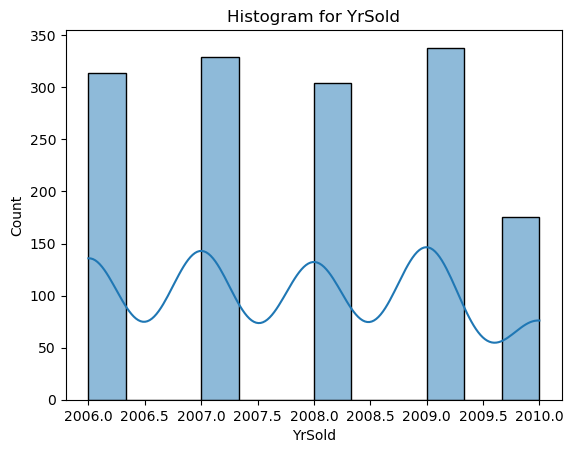

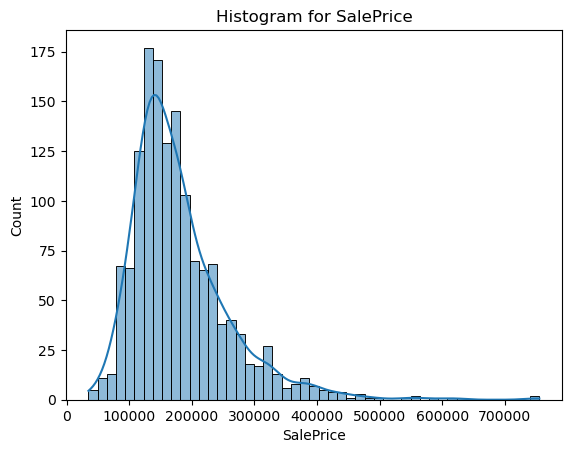

In [20]:
for i in con:
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

### Bivariate Analysis
### Continuous vs Continuous

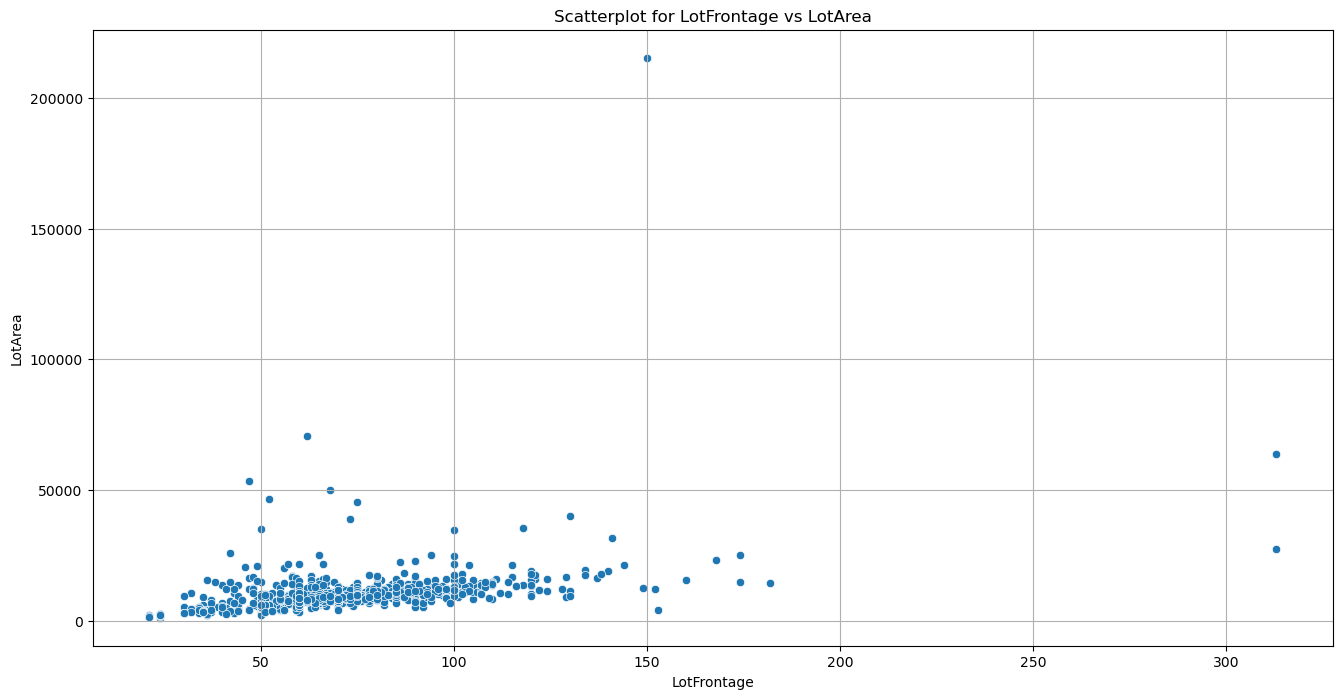

In [21]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df, x='LotFrontage', y='LotArea')
plt.title('Scatterplot for LotFrontage vs LotArea')
plt.grid()
plt.show()

### Correlation Heatmap

In [22]:
df[con].corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

In [23]:
df[con].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<Axes: >

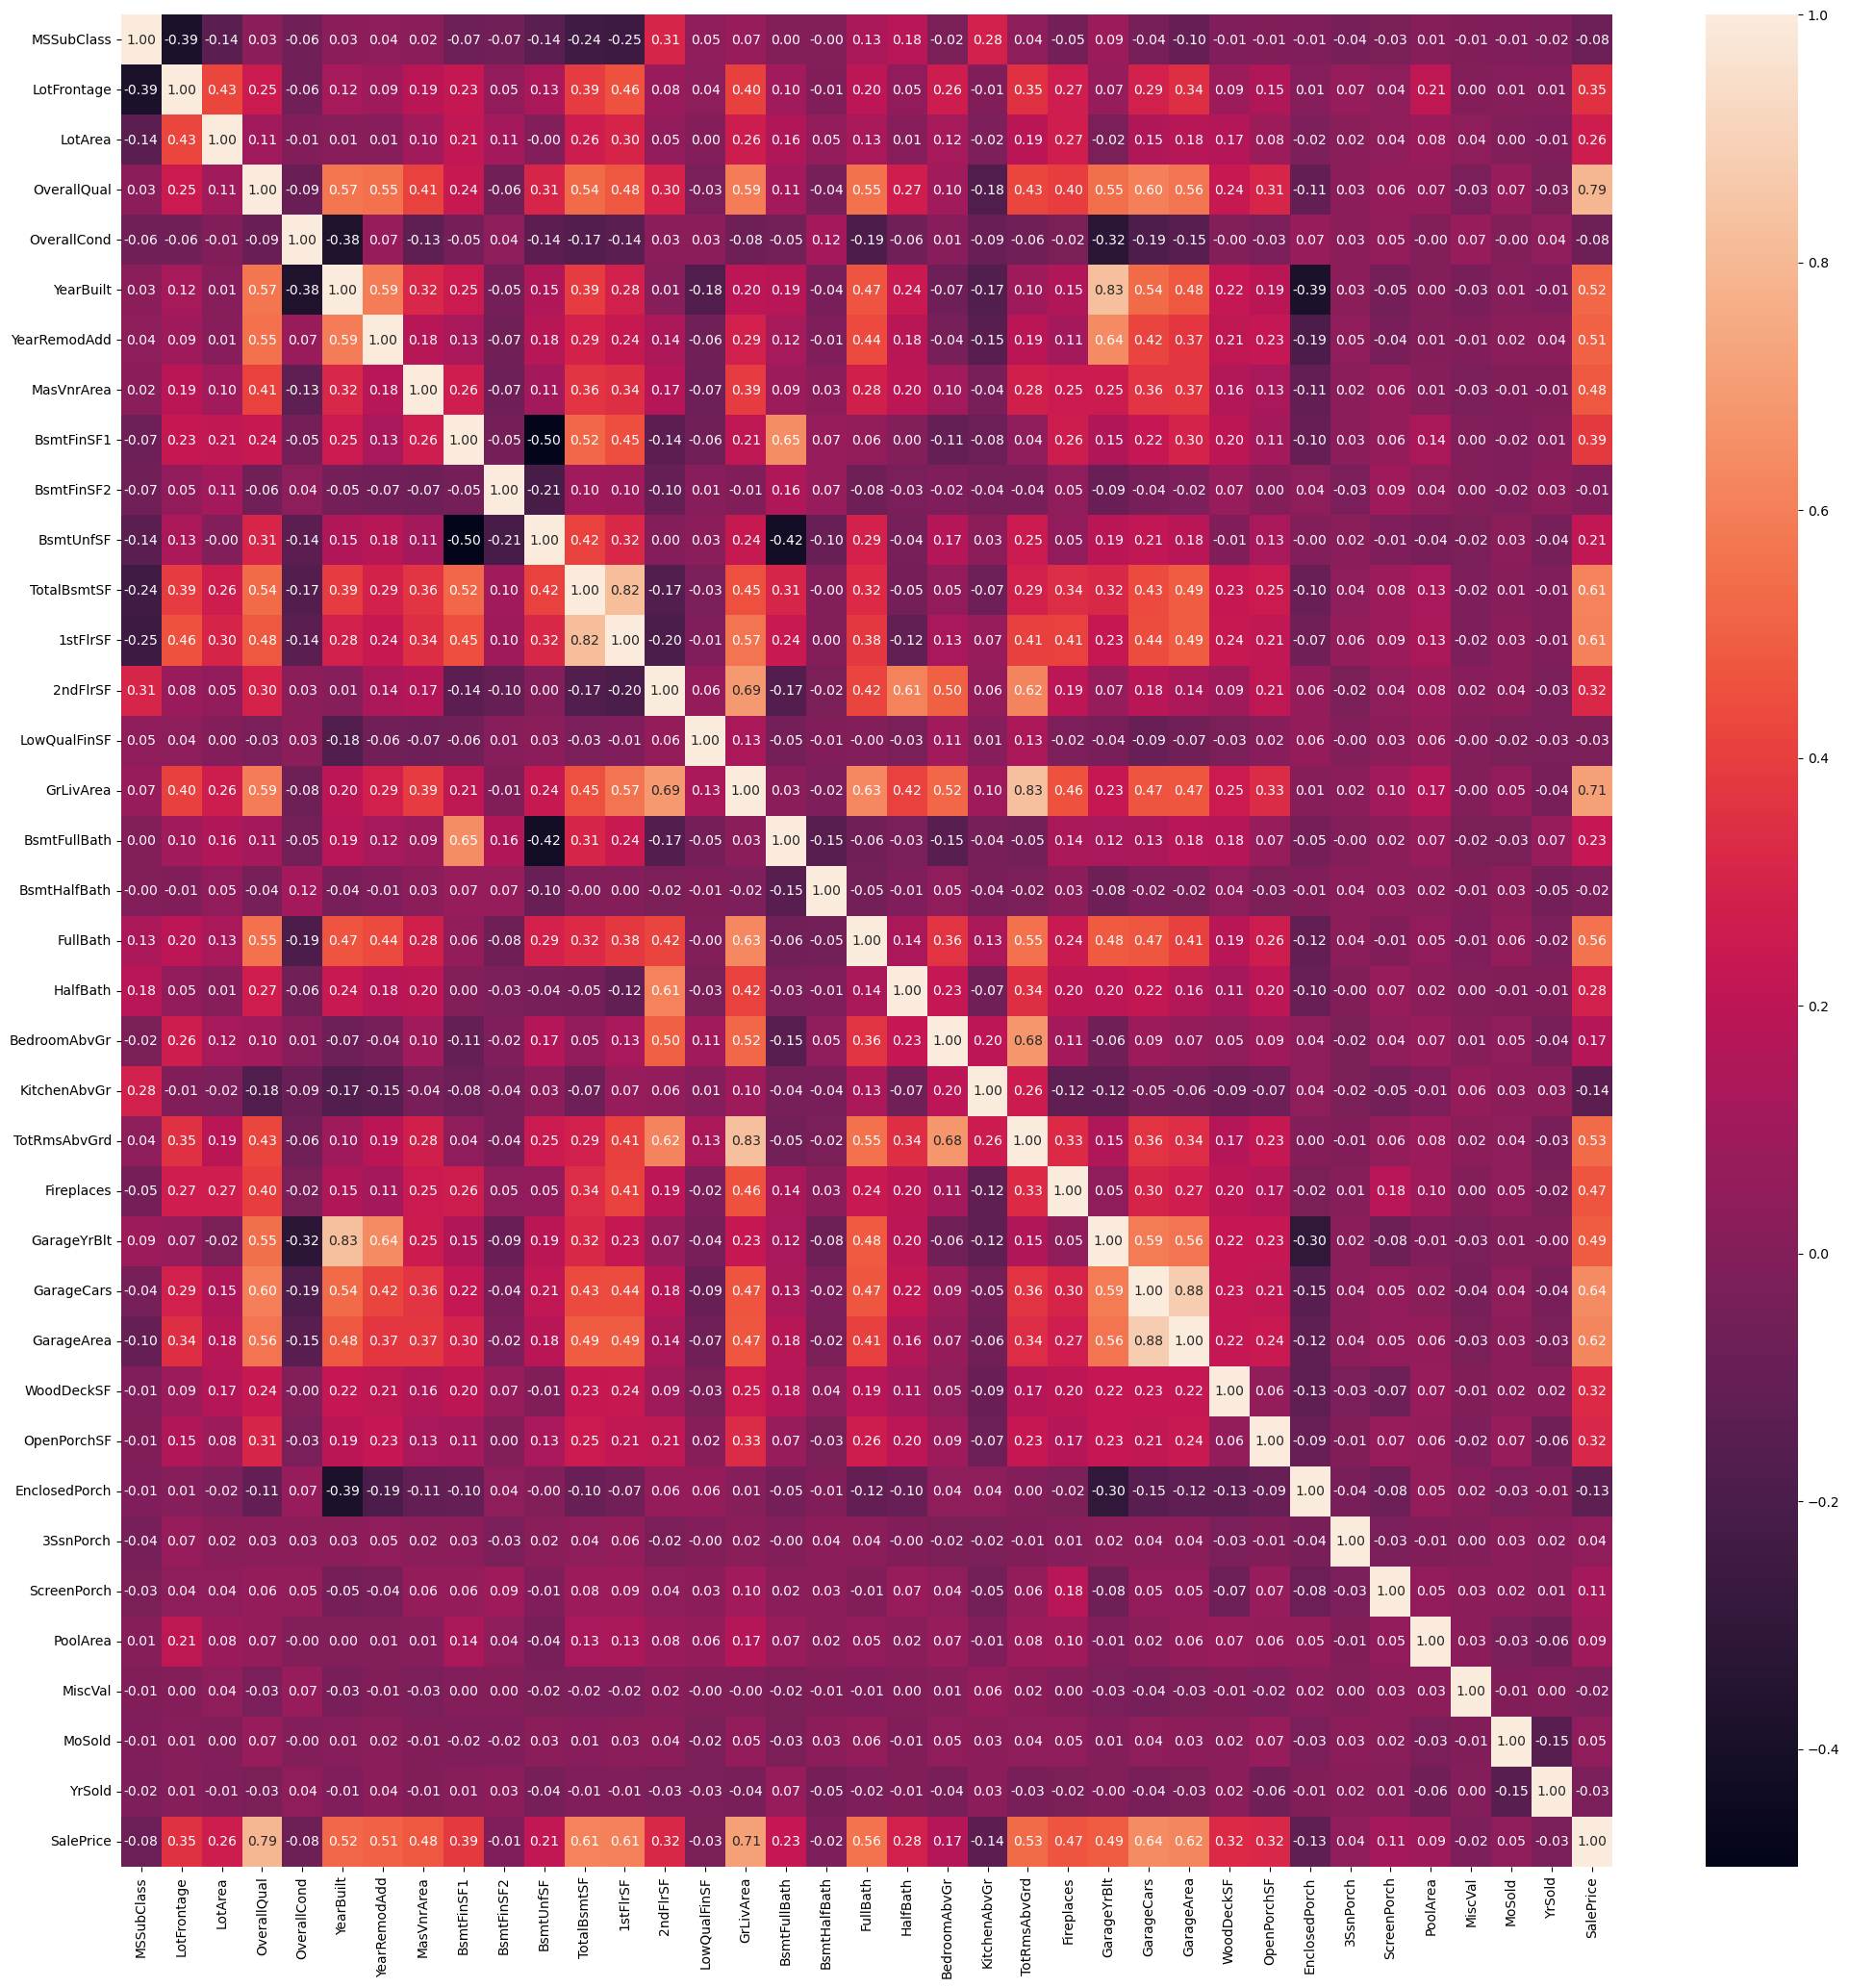

In [24]:
plt.figure(figsize=(25,25))
sns.heatmap(data=df[con].corr(), annot=True, fmt='.2f')

### Cat vs Con

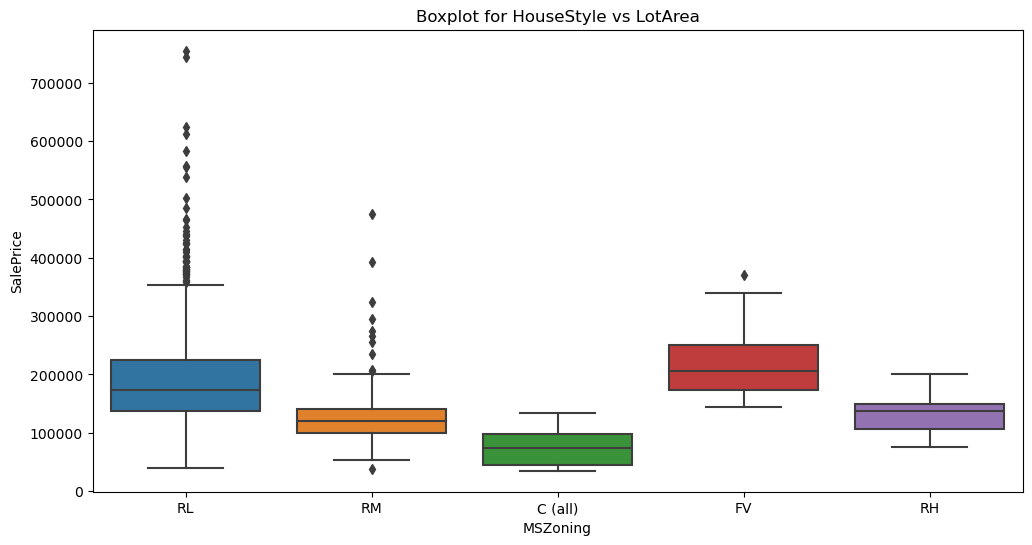

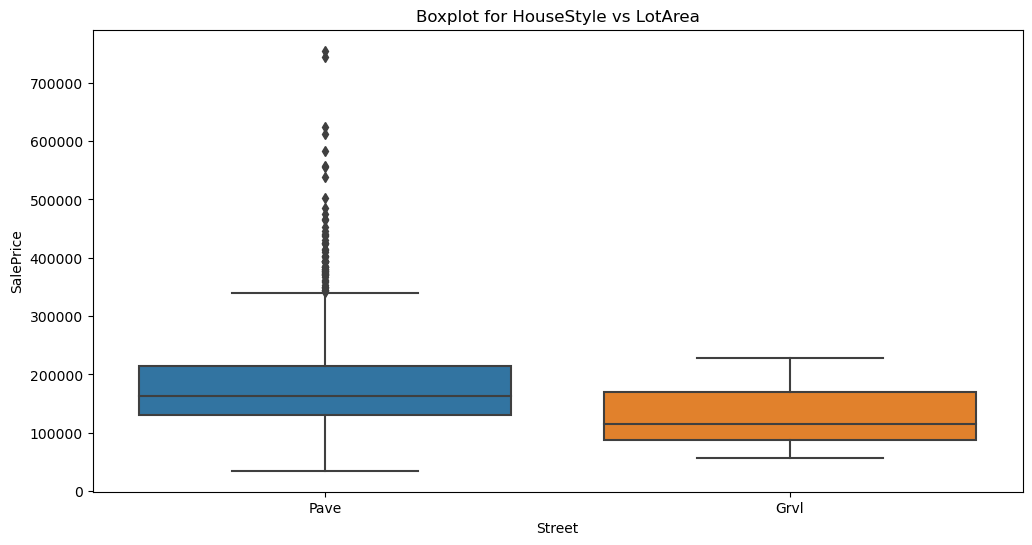

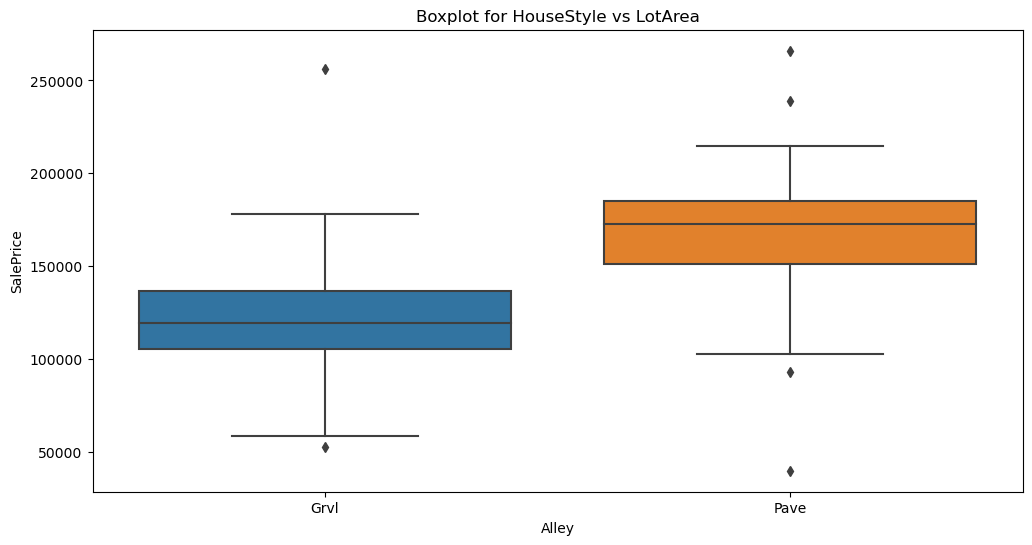

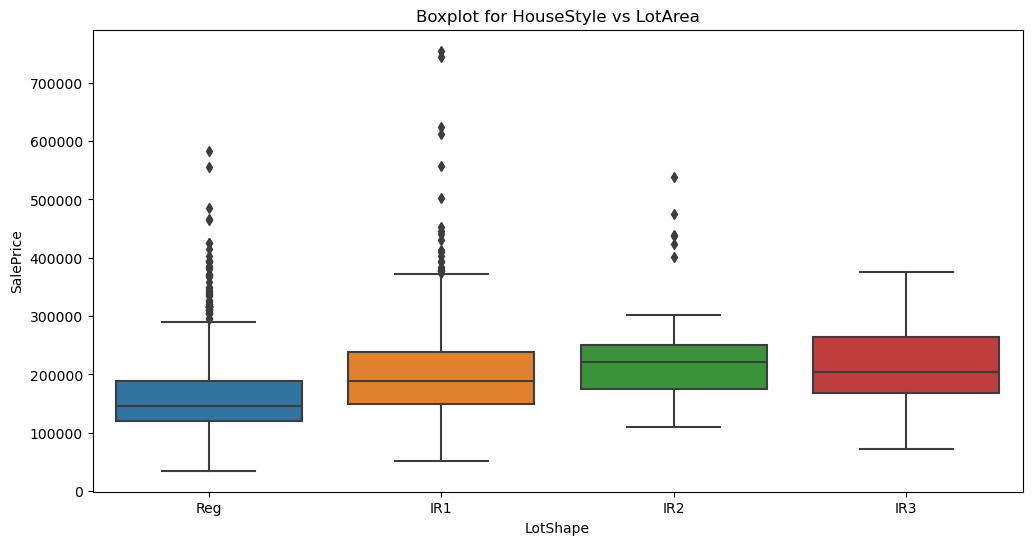

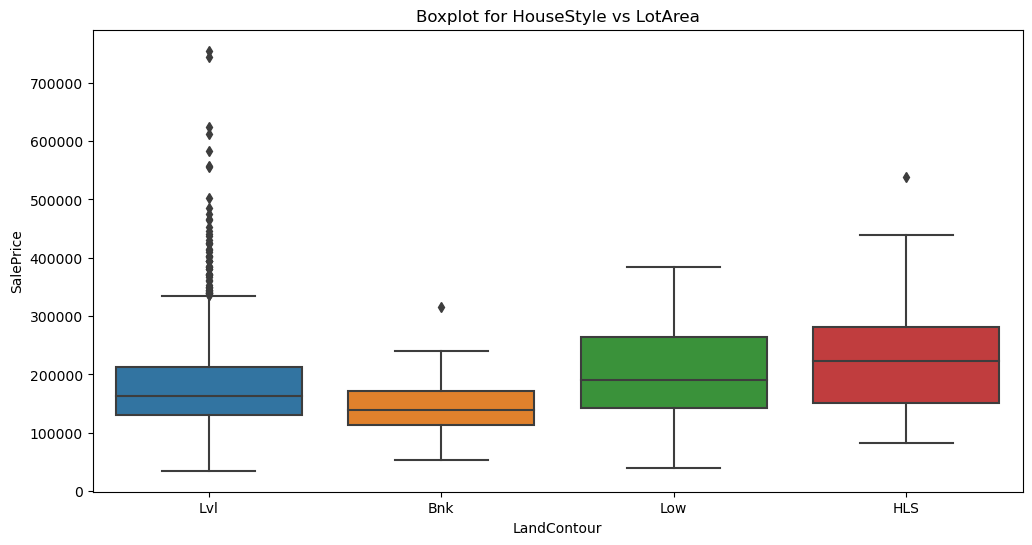

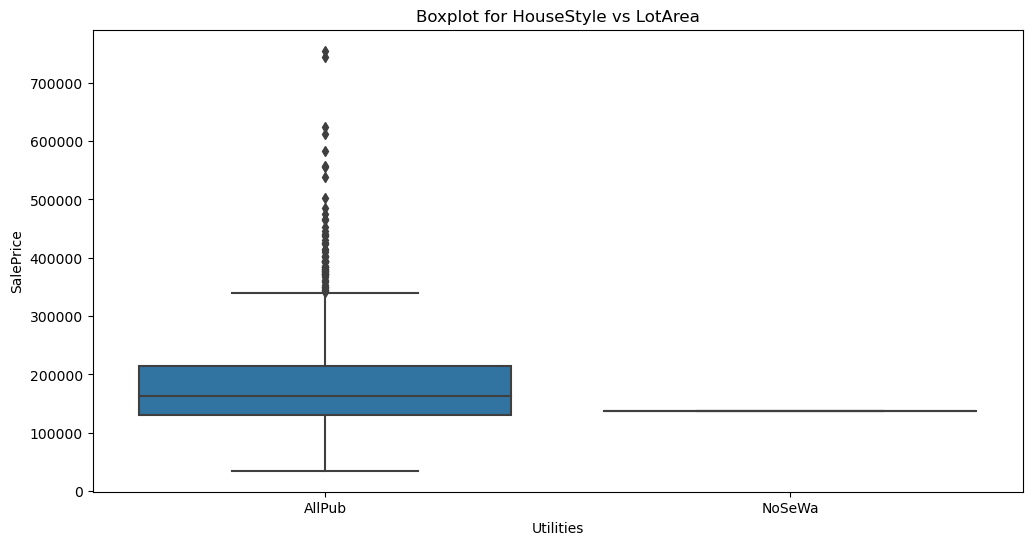

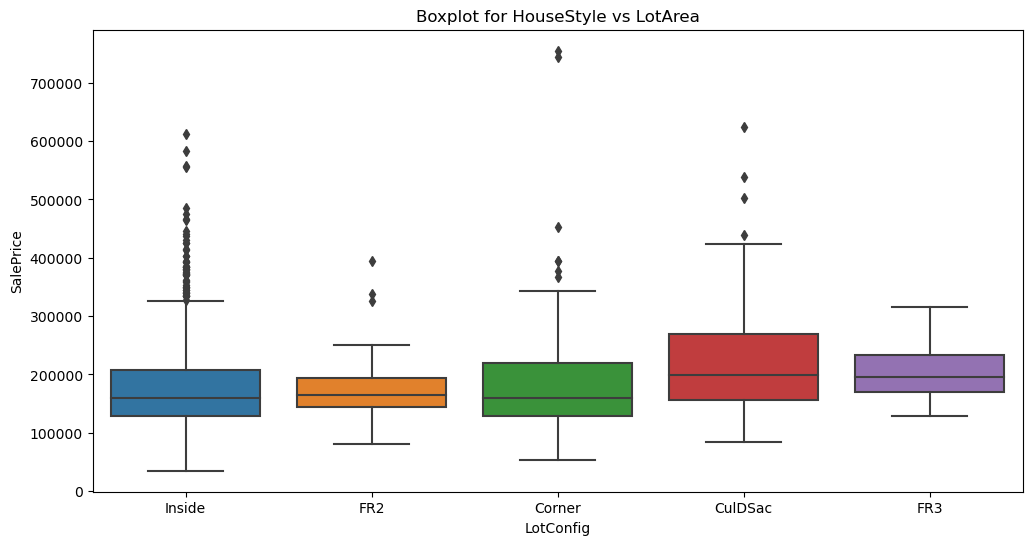

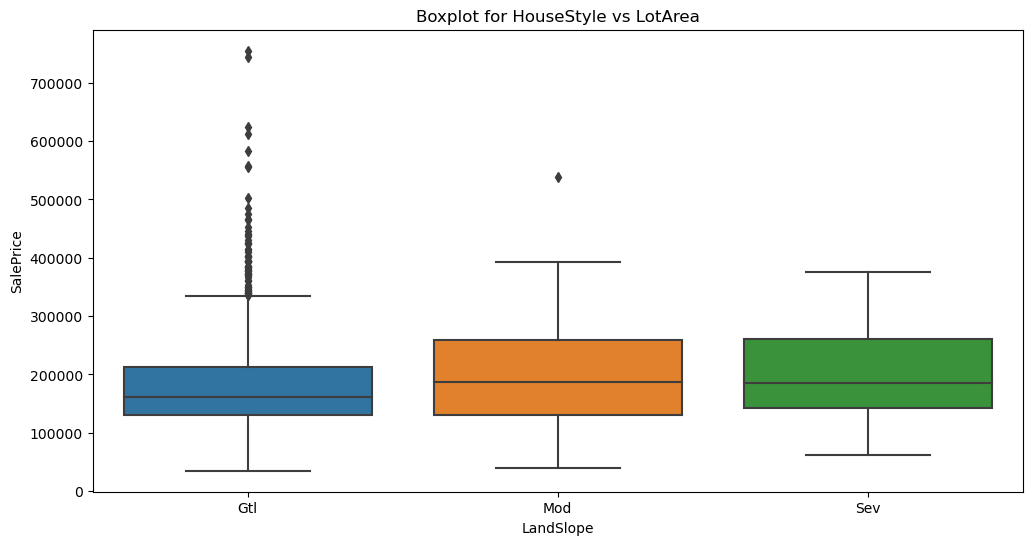

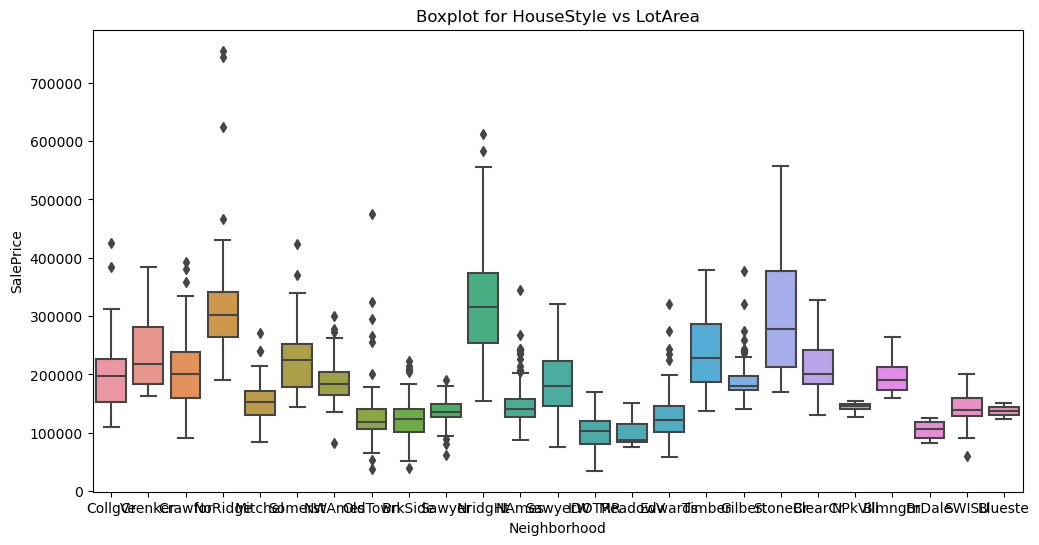

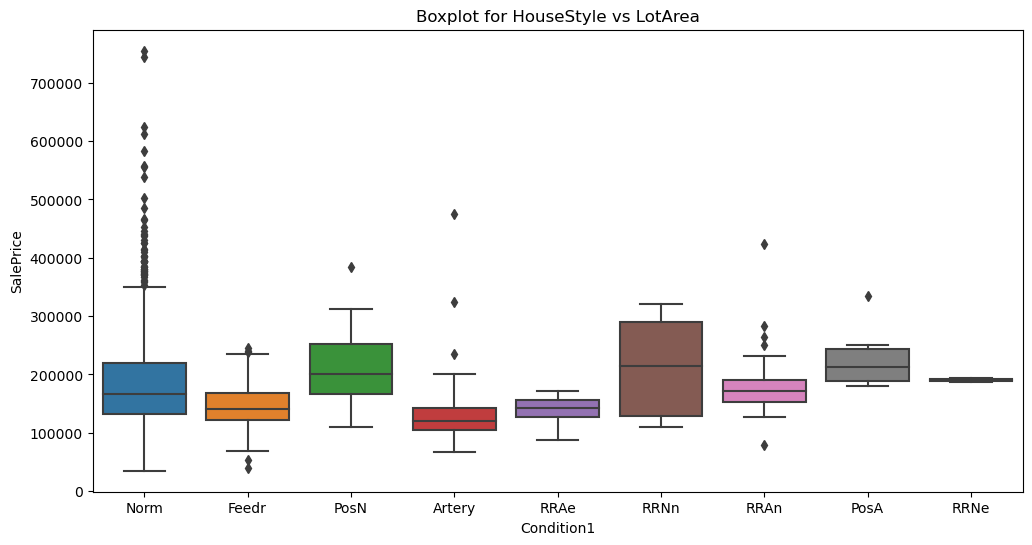

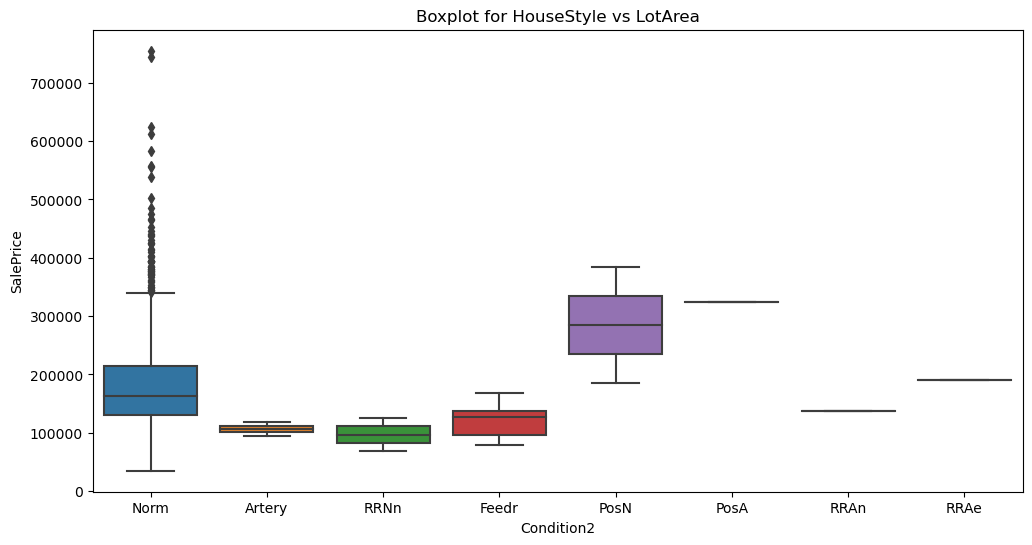

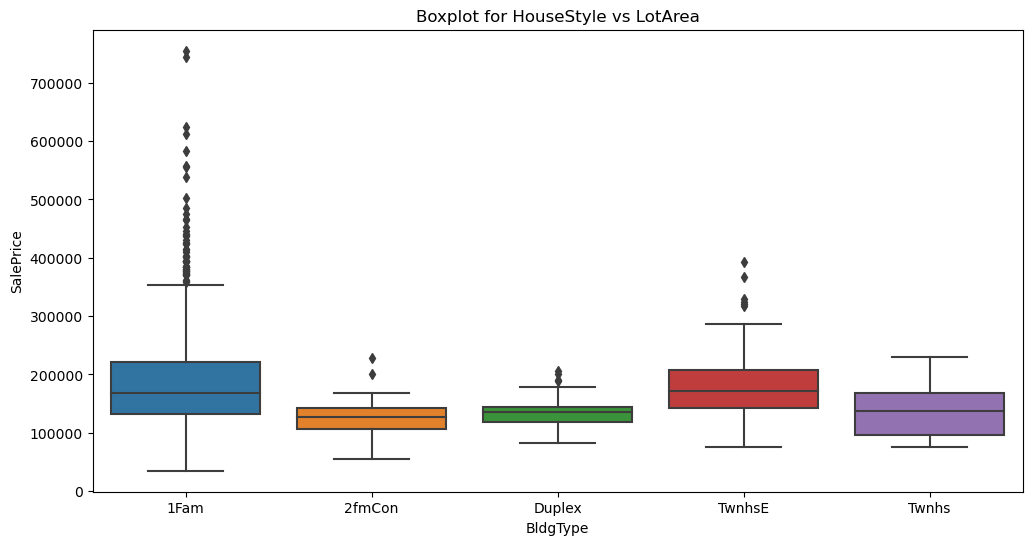

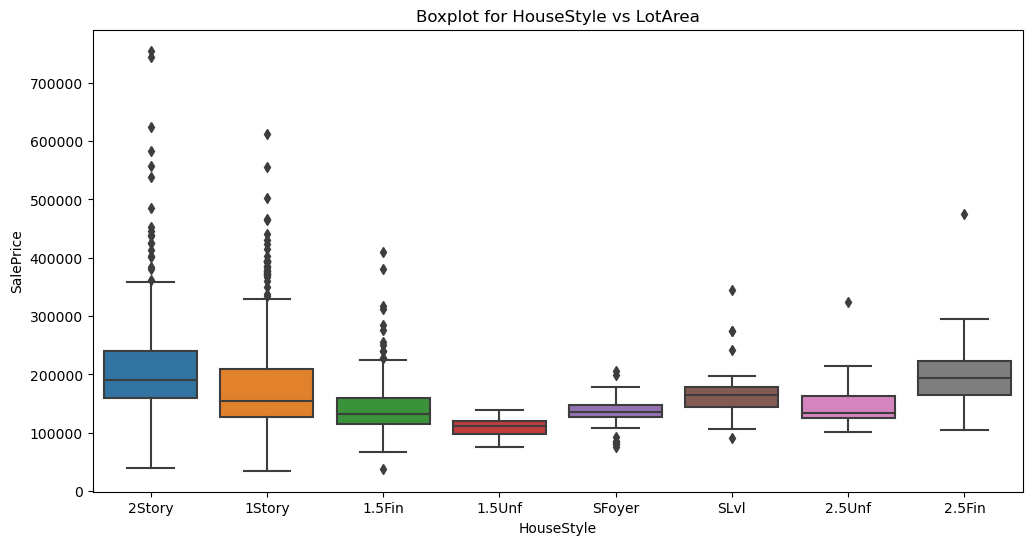

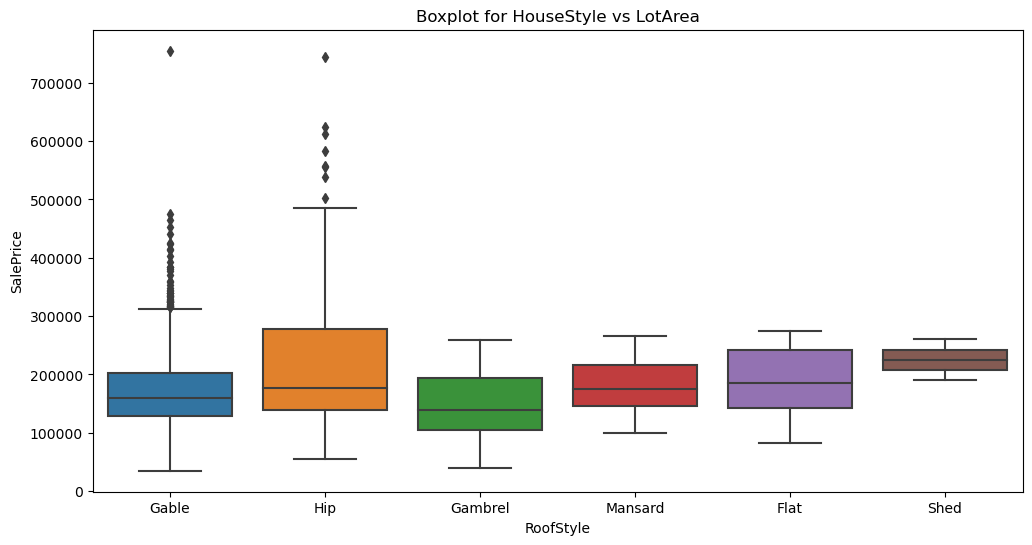

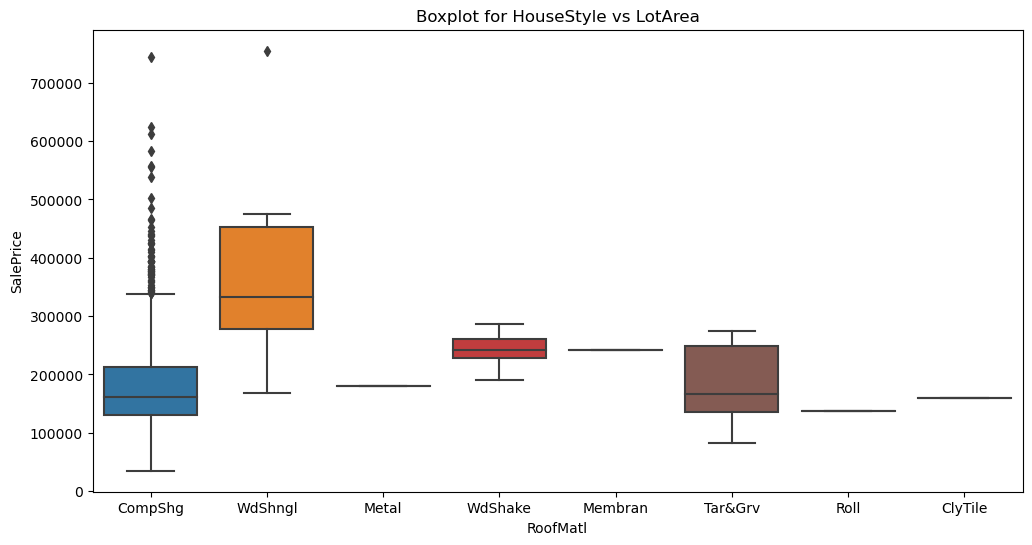

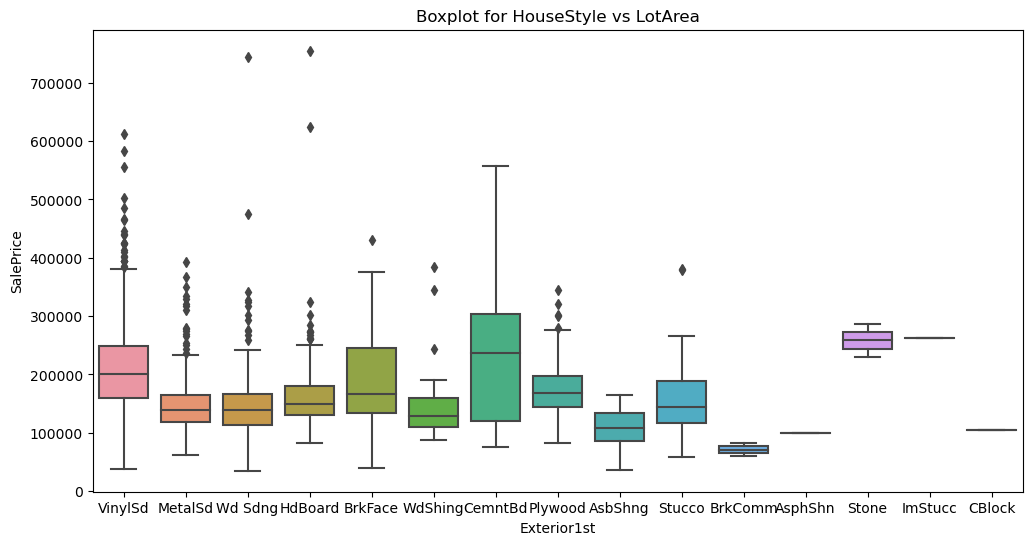

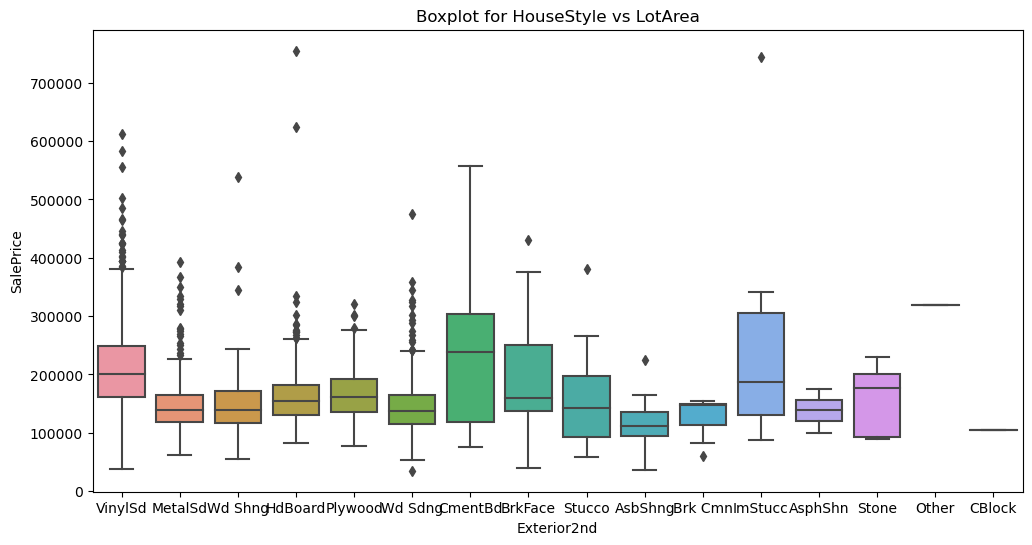

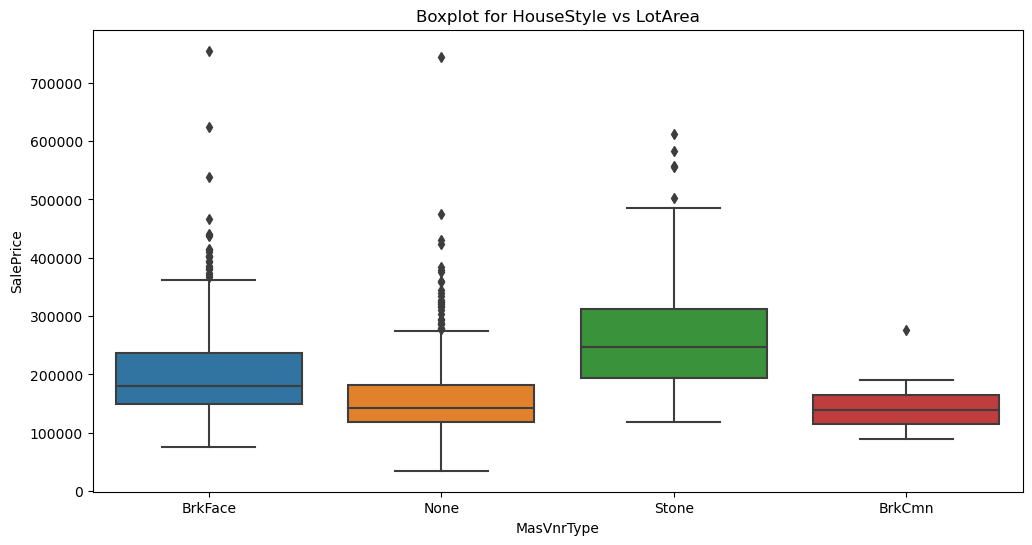

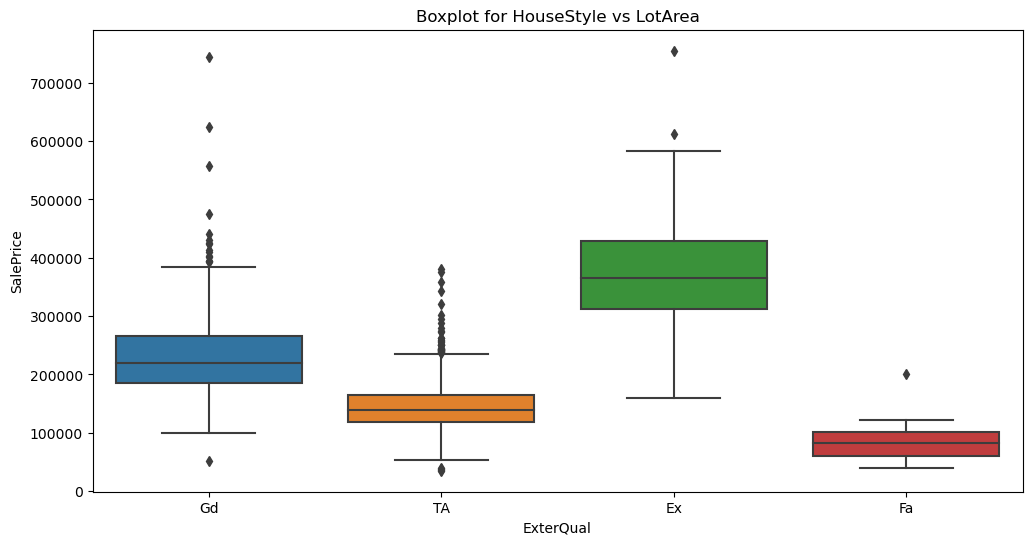

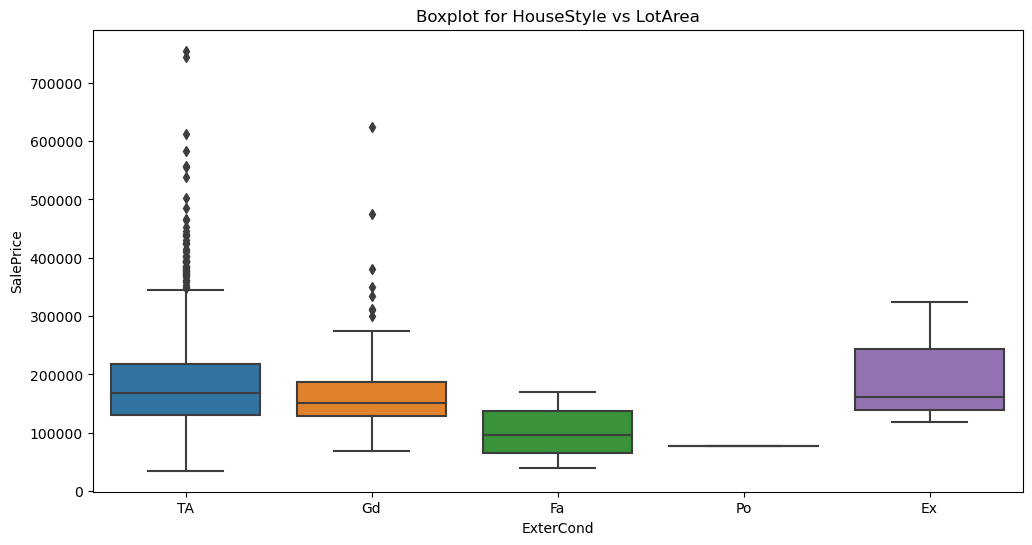

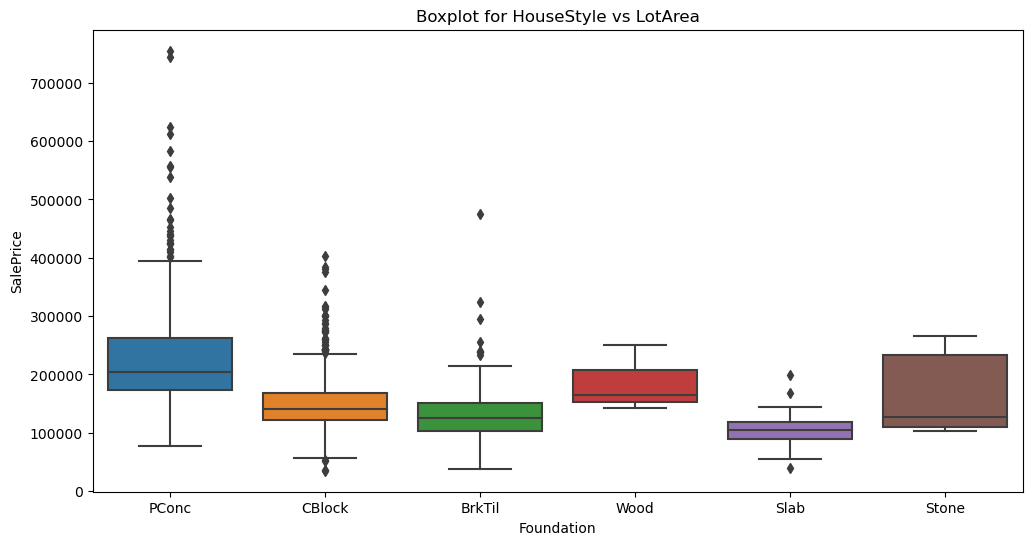

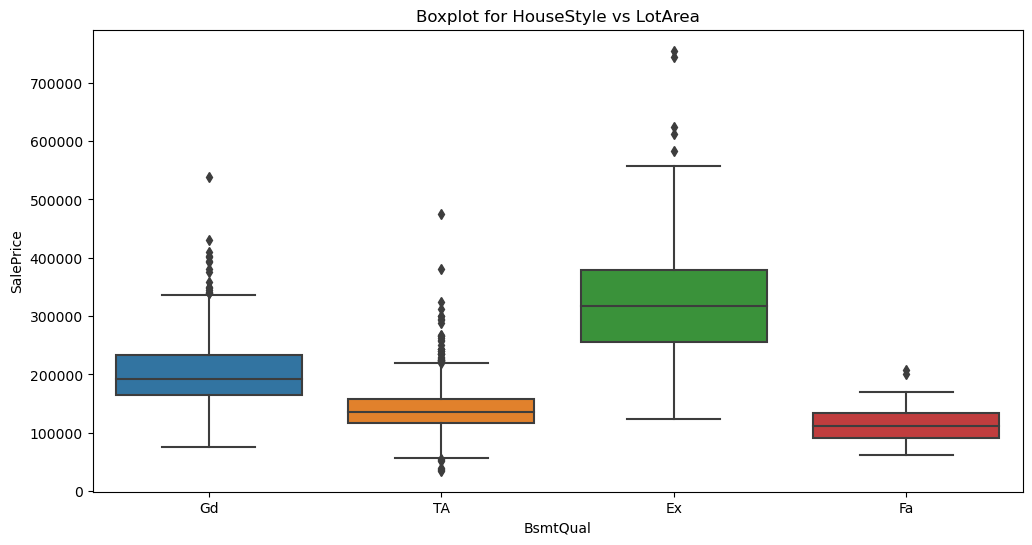

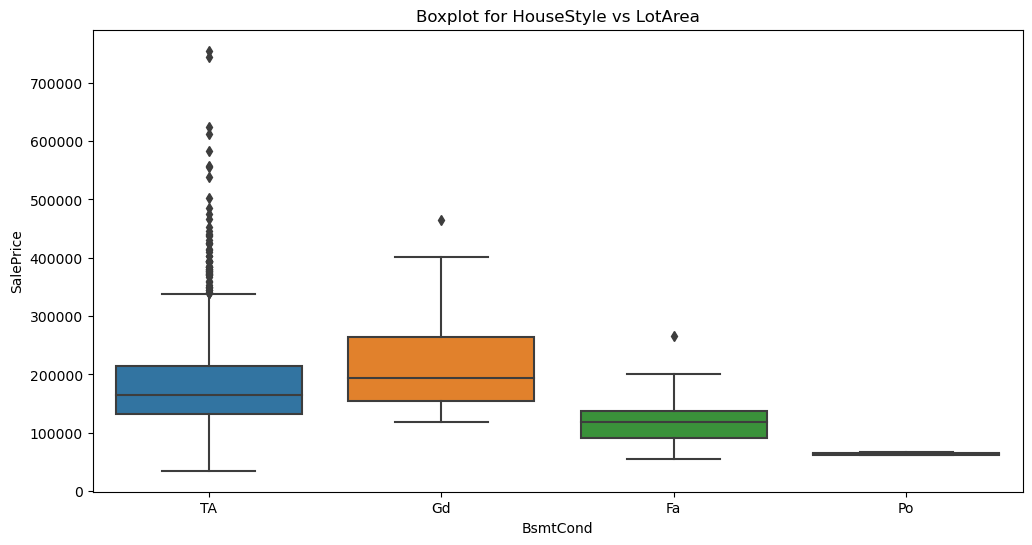

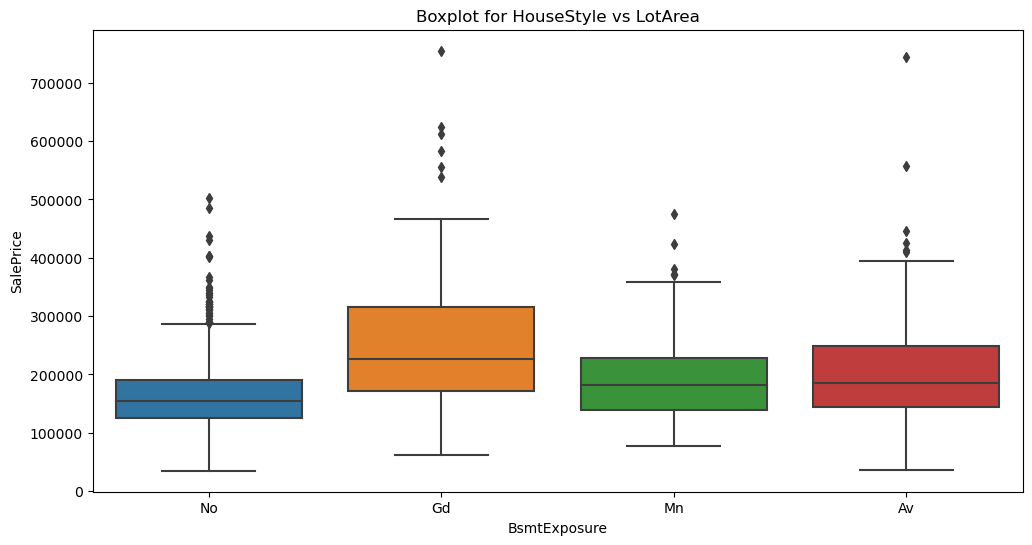

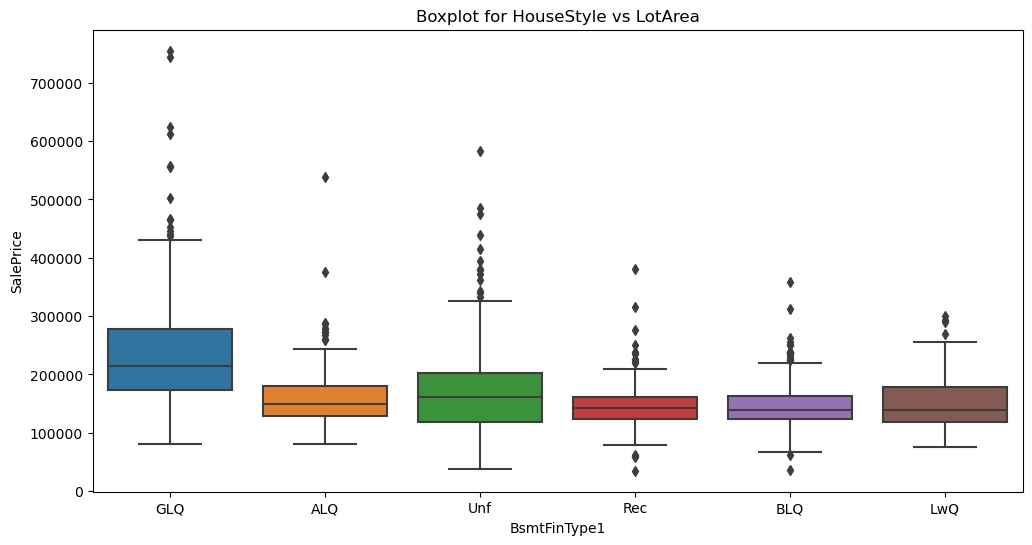

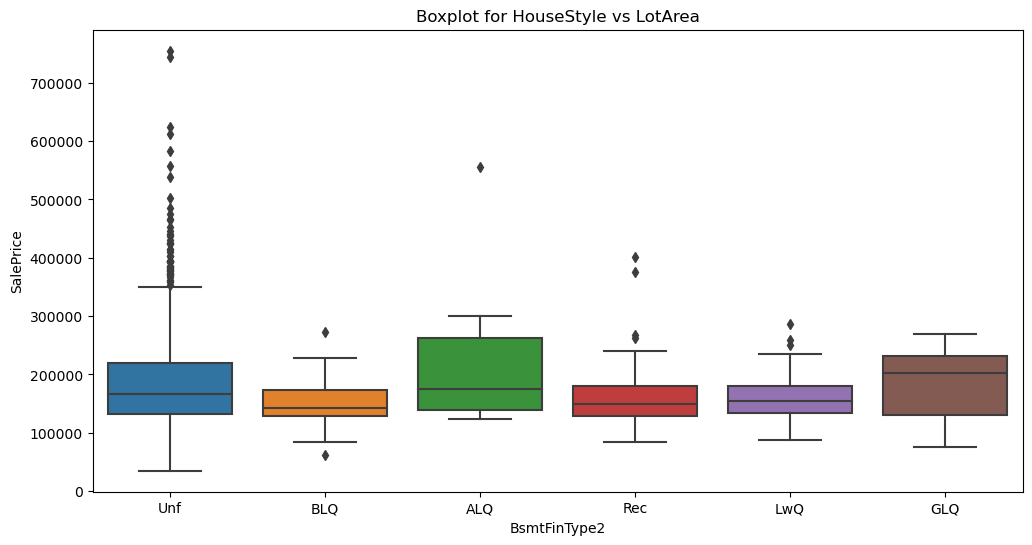

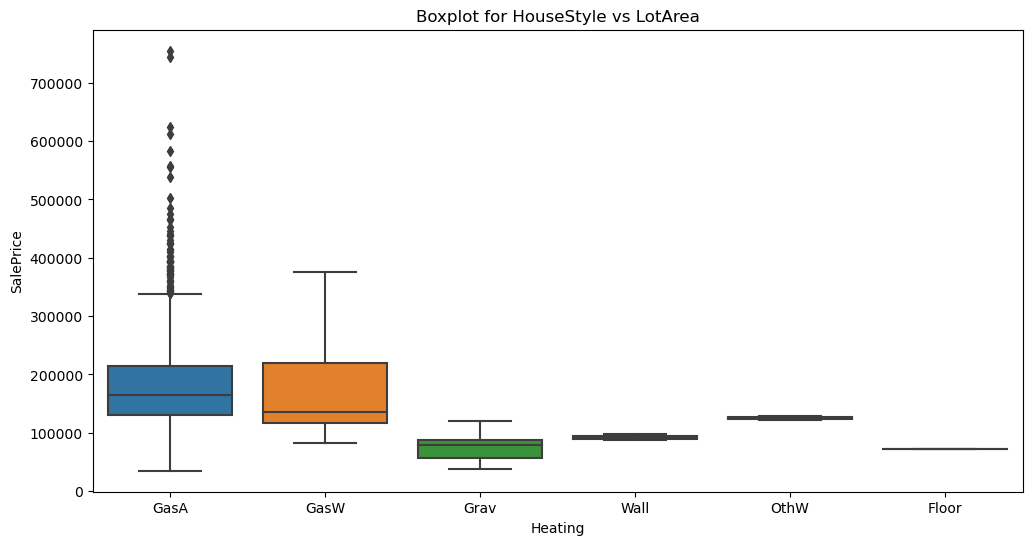

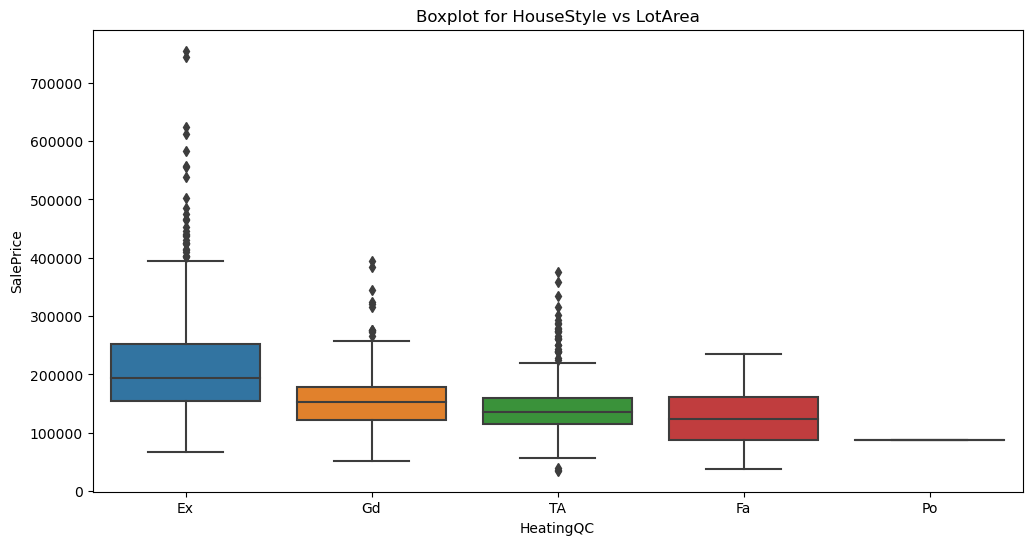

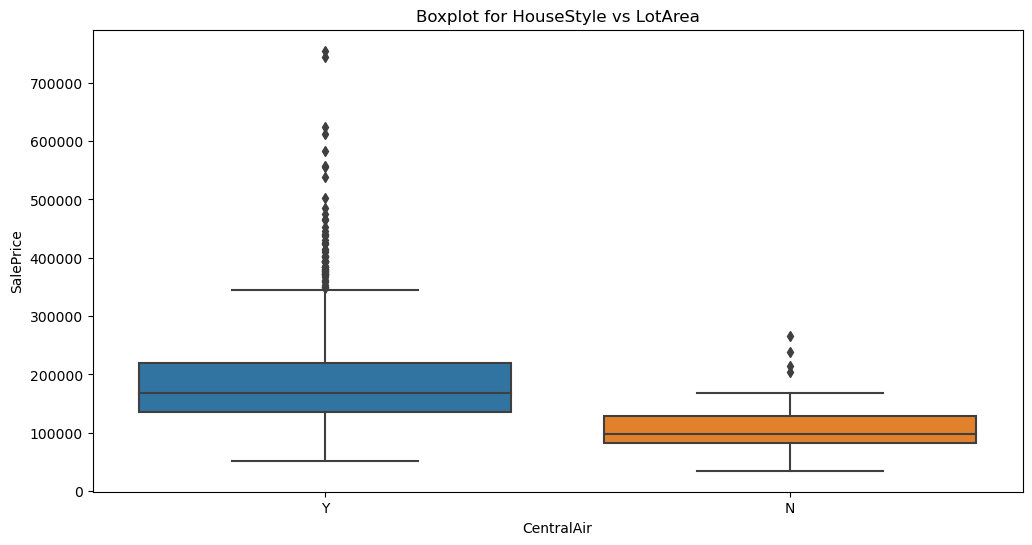

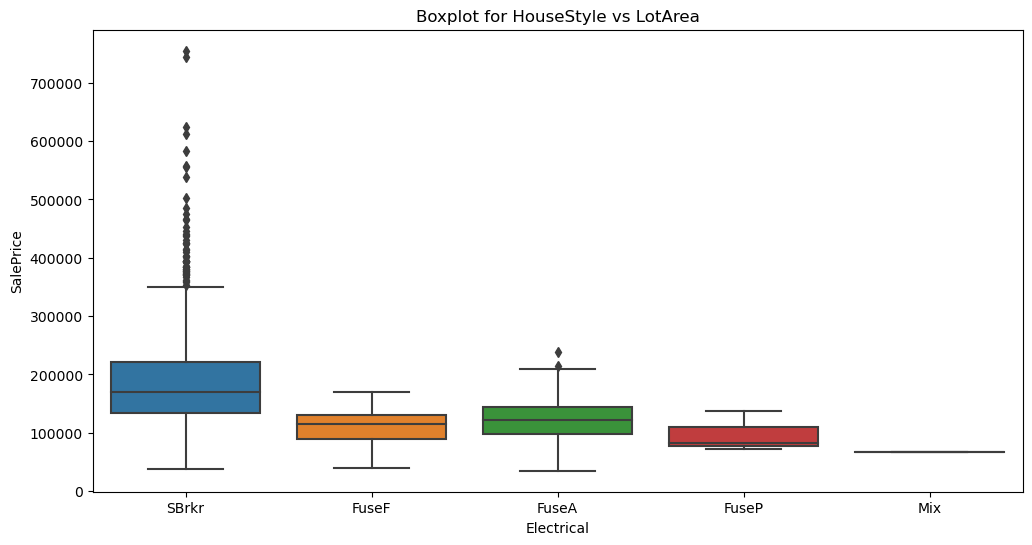

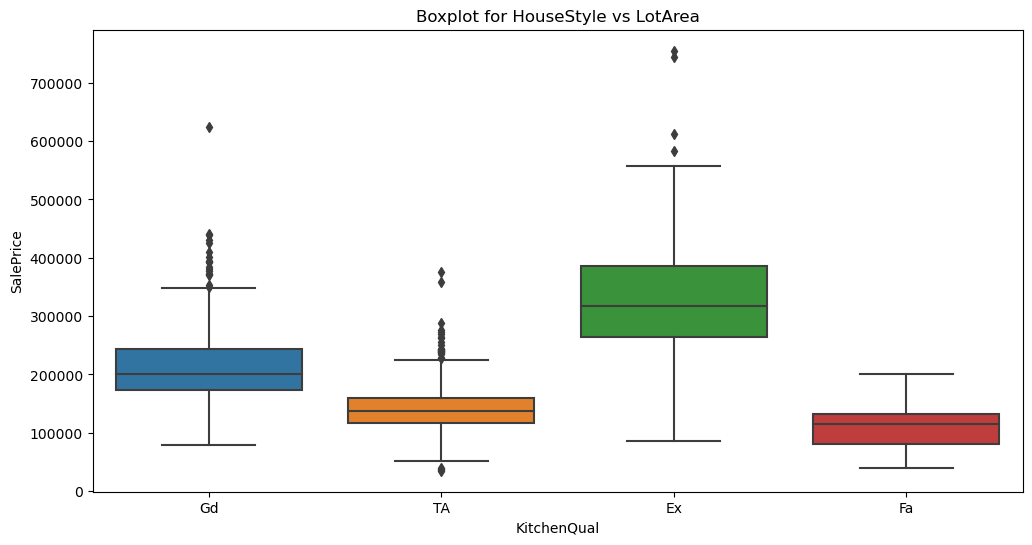

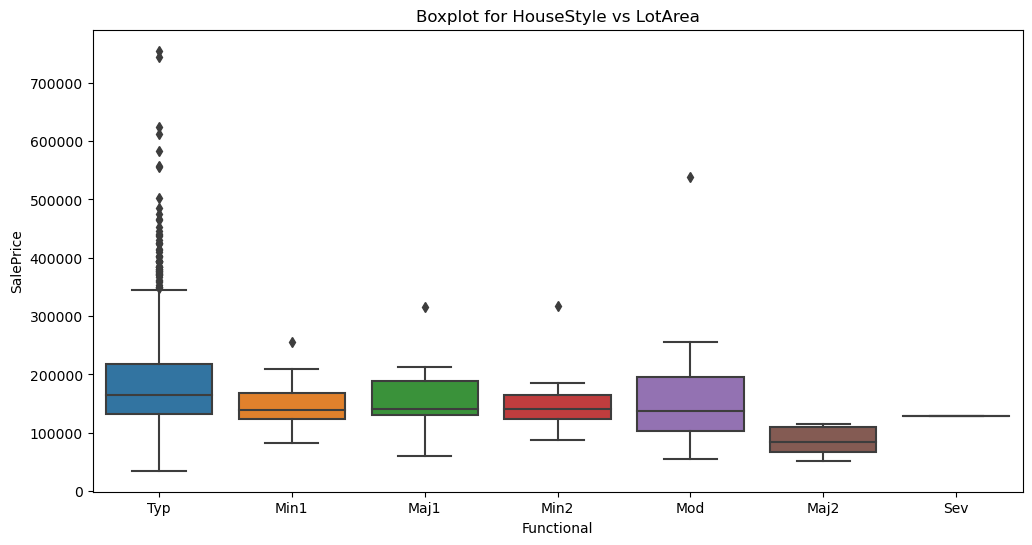

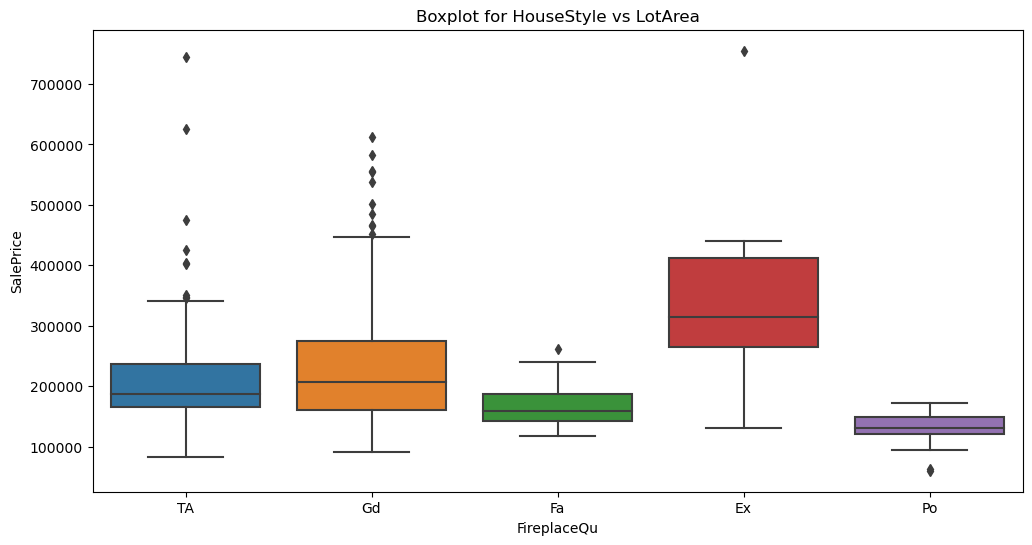

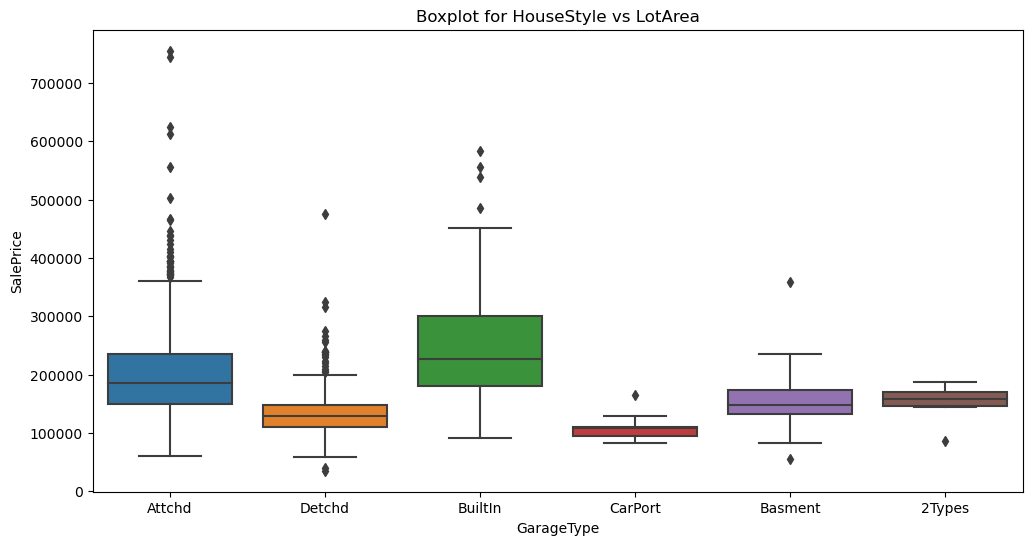

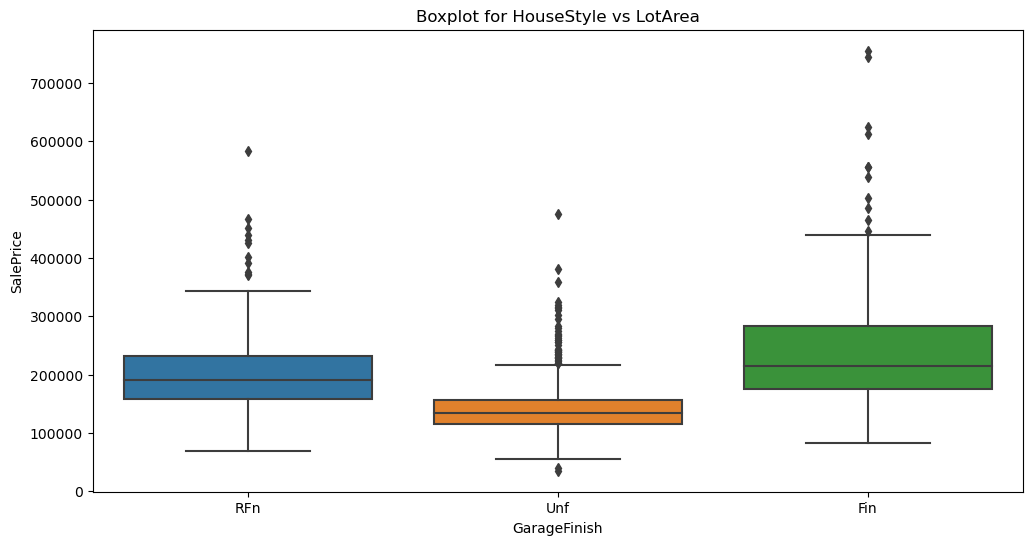

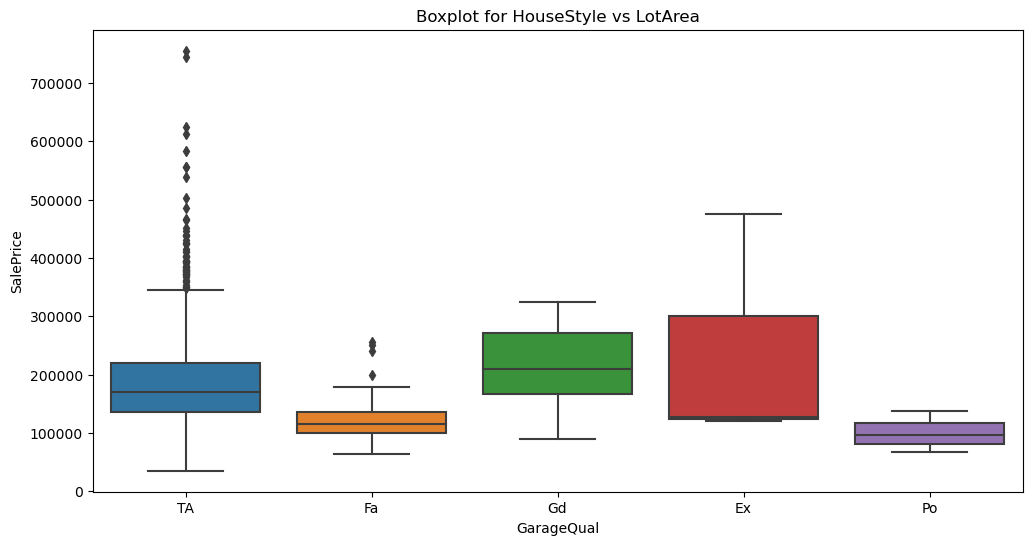

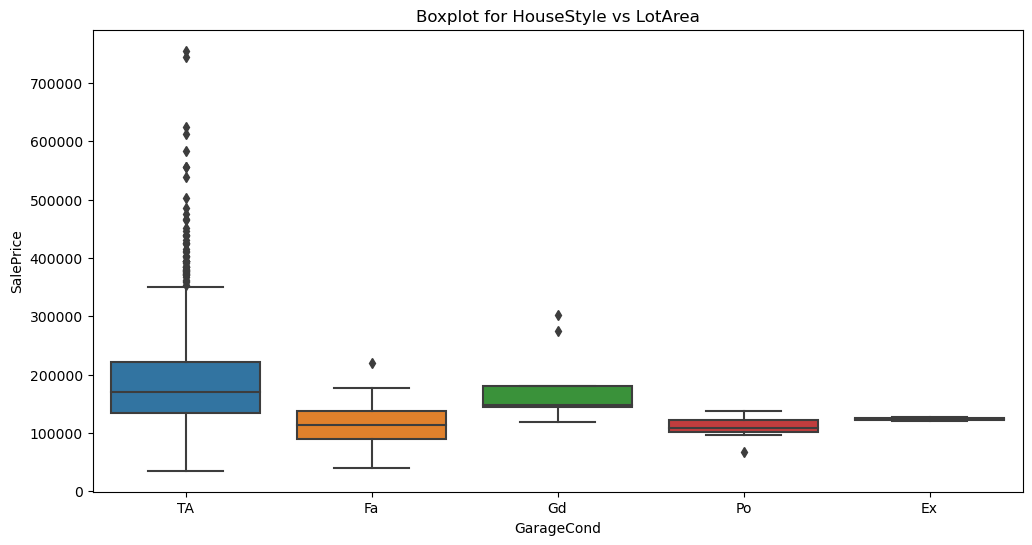

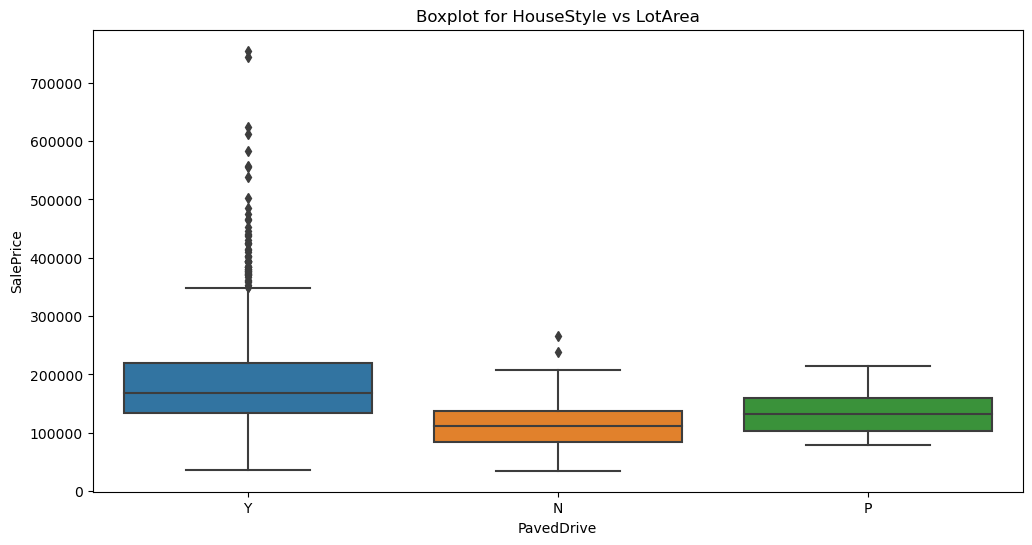

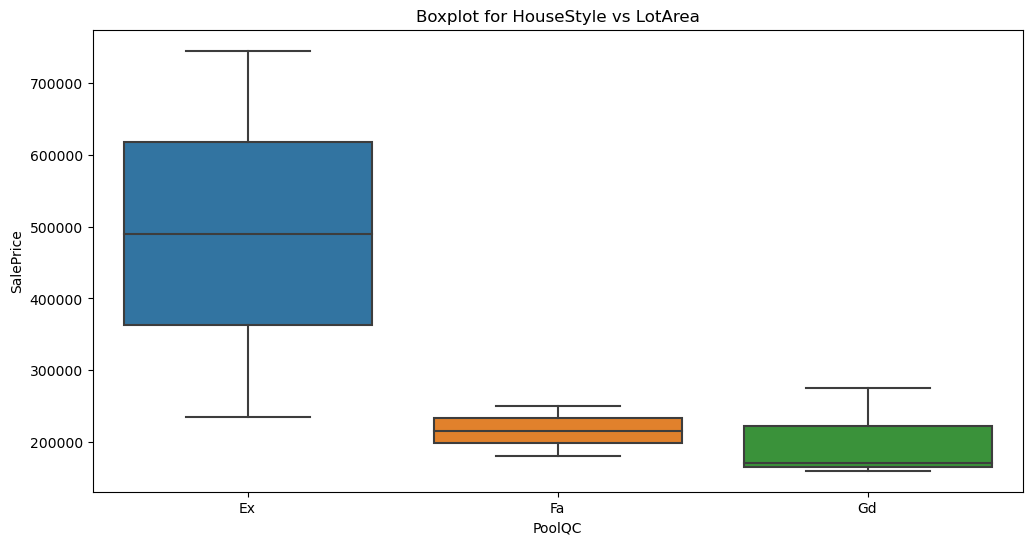

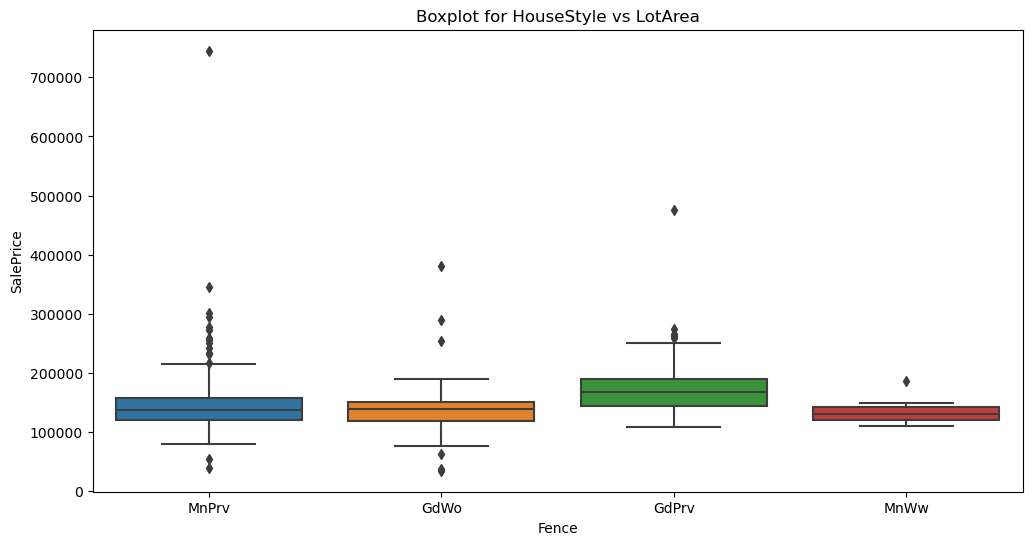

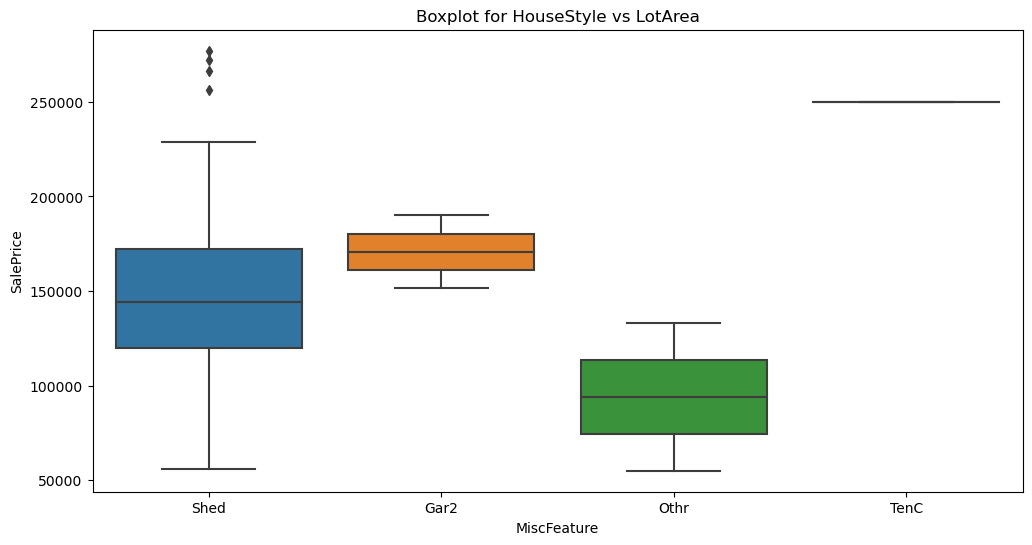

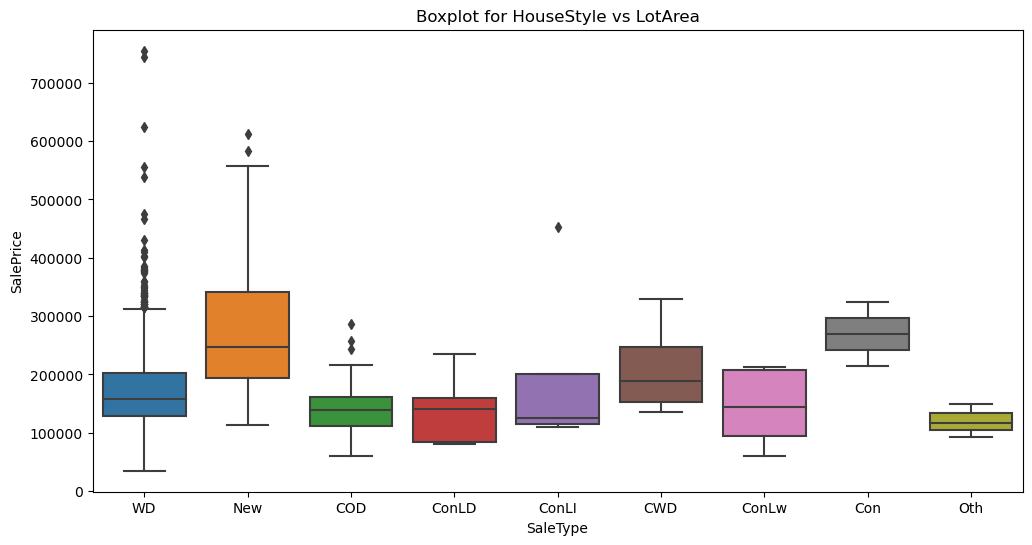

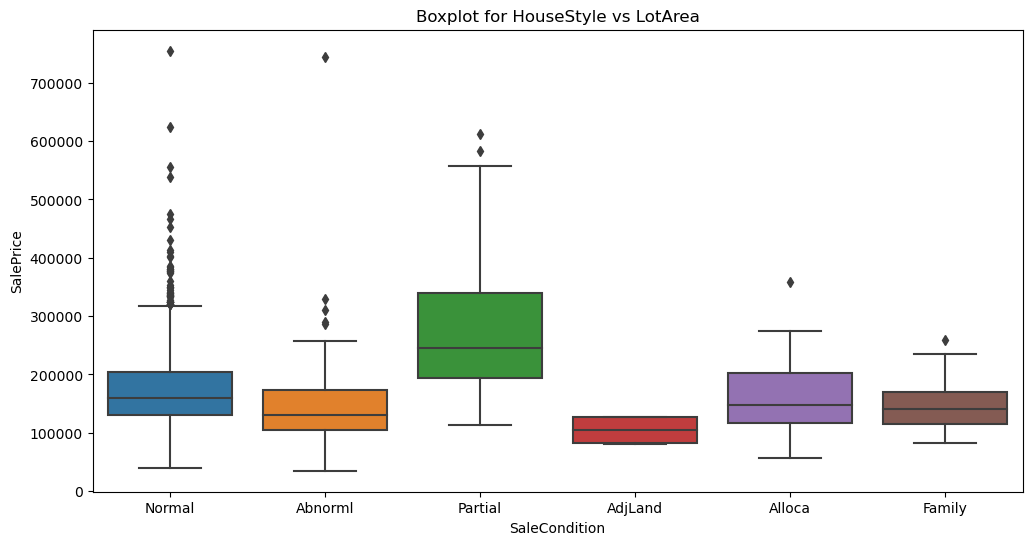

In [25]:
for i in cat:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x=i, y='SalePrice')
    plt.title('Boxplot for HouseStyle vs LotArea')
    plt.show()

### Cat vs Cat Crosstab heatmap

In [26]:
ctab = pd.crosstab(df['ExterQual'], df['ExterCond'])
ctab

ExterCond  Ex  Fa   Gd  Po   TA
ExterQual                      
Ex          1   0    3   0   48
Fa          0   6    0   0    8
Gd          0   0   35   0  453
TA          2  22  108   1  773

<Axes: xlabel='ExterCond', ylabel='ExterQual'>

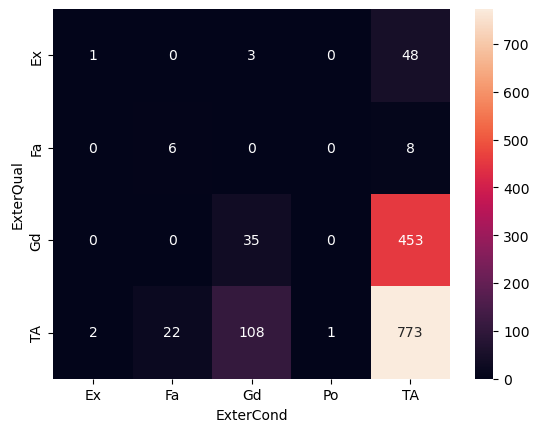

In [27]:
sns.heatmap(ctab, annot=True, fmt='d')

### EDA is Complete

### Apply Regression Process

### Seperate X and Y (SalePrice)

In [28]:
X = df.drop(columns=['SalePrice'])
Y = df[['SalePrice']]

In [29]:
X.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008        WD         Normal  
1         NaN       0       5    2007        WD         Normal  
2         NaN       0       9    2008        WD         Normal  
3         NaN       0       2    2006        WD        Abnorml  
4         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [30]:
Y.head()

SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000

### Seperate cat con seperation

In [31]:
from PM3func import catconsep
cat, con = catconsep(X)

In [32]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [33]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

### Create Preprocessing pipeline for X

### Create a pipeline for feature selection
cat - OrdinalEncoder
con - StandardScaler

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [35]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='NotAvailable')),
                           ('ordinal', OrdinalEncoder())])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [36]:
X_pre = pre.fit_transform(X)
X_pre.head()

num__MSSubClass  num__LotFrontage  num__LotArea  num__OverallQual  \
0         0.073375         -0.220875     -0.207142          0.651479   
1        -0.872563          0.460320     -0.091886         -0.071836   
2         0.073375         -0.084636      0.073480          0.651479   
3         0.309859         -0.447940     -0.096897          0.651479   
4         0.073375          0.641972      0.375148          1.374795   

   num__OverallCond  num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  \
0         -0.517200        1.050994           0.878668         0.514104   
1          2.179628        0.156734          -0.429577        -0.570750   
2         -0.517200        0.984752           0.830215         0.325915   
3         -0.517200       -1.863632          -0.720298        -0.570750   
4         -0.517200        0.951632           0.733308         1.366489   

   num__BsmtFinSF1  num__BsmtFinSF2  ...  cat__GarageType  cat__GarageFinish  \
0         0.575425        -0.288653  ...              1.0                2.0   
1         1.171992        -0.288653  ...              1.0                2.0   
2         0.092907        -0.288653  ...              1.0                2.0   
3        -0.499274        -0.288653  ...              5.0                3.0   
4         0.463568        -0.288653  ...              1.0                2.0   

   cat__GarageQual  cat__GarageCond  cat__PavedDrive  cat__PoolQC  cat__Fence  \
0              5.0              5.0              2.0          3.0         4.0   
1              5.0              5.0              2.0          3.0         4.0   
2              5.0              5.0              2.0          3.0         4.0   
3              5.0              5.0              2.0          3.0         4.0   
4              5.0              5.0              2.0          3.0         4.0   

   cat__MiscFeature  cat__SaleType  cat__SaleCondition  
0               1.0            8.0                 4.0  
1               1.0            8.0                 4.0  
2               1.0            8.0                 4.0  
3               1.0            8.0                 0.0  
4               1.0            8.0                 4.0  

[5 rows x 79 columns]

### Feature selection with sequentialFeatureSelector

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

### Forward method

In [38]:
lr = LinearRegression()
sel = SequentialFeatureSelector(lr, direction= 'forward')
sel_features = sel.fit_transform(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__YearRemodAdd',
       'num__MasVnrArea', 'num__BsmtFinSF1', 'num__GrLivArea',
       'num__BsmtFullBath', 'num__Fireplaces', 'num__GarageCars',
       'num__WoodDeckSF', 'num__ScreenPorch', 'num__PoolArea',
       'num__YrSold', 'cat__Street', 'cat__LandContour', 'cat__Utilities',
       'cat__Neighborhood', 'cat__BldgType', 'cat__HouseStyle',
       'cat__RoofStyle', 'cat__RoofMatl', 'cat__Exterior1st',
       'cat__MasVnrType', 'cat__ExterQual', 'cat__ExterCond',
       'cat__Foundation', 'cat__BsmtQual', 'cat__BsmtCond',
       'cat__BsmtExposure', 'cat__HeatingQC', 'cat__KitchenQual',
       'cat__Functional', 'cat__GarageCond', 'cat__PavedDrive',
       'cat__Fence', 'cat__MiscFeature'], dtype=object)

In [39]:
len(sel_cols)

39

In [40]:
sel_cols[0]

'num__MSSubClass'

In [41]:
sel_cols[0].split('__')[1]

'MSSubClass'

In [42]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [43]:
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'GrLivArea',
 'BsmtFullBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'Street',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature']

In [44]:
X_sel = X[imp_cols]
X_sel

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1455          60     7917            6            5       1999          2000   
1456          20    13175            6            6       1978          1988   
1457          70     9042            7            9       1941          2006   
1458          20     9717            5            6       1950          1996   
1459          20     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  GrLivArea  BsmtFullBath  ...  BsmtQual  \
0          196.0         706       1710             1  ...        Gd   
1            0.0         978       1262             0  ...        Gd   
2          162.0         486       1786             1  ...        Gd   
3            0.0         216       1717             1  ...        TA   
4          350.0         655       2198             1  ...        Gd   
...          ...         ...        ...           ...  ...       ...   
1455         0.0           0       1647             0  ...        Gd   
1456       119.0         790       2073             1  ...        Gd   
1457         0.0         275       2340             0  ...        TA   
1458         0.0          49       1078             1  ...        TA   
1459         0.0         830       1256             1  ...        TA   

      BsmtCond  BsmtExposure  HeatingQC  KitchenQual  Functional GarageCond  \
0           TA            No         Ex           Gd         Typ         TA   
1           TA            Gd         Ex           TA         Typ         TA   
2           TA            Mn         Ex           Gd         Typ         TA   
3           Gd            No         Gd           Gd         Typ         TA   
4           TA            Av         Ex           Gd         Typ         TA   
...        ...           ...        ...          ...         ...        ...   
1455        TA            No         Ex           TA         Typ         TA   
1456        TA            No         TA           TA        Min1         TA   
1457        Gd            No         Ex           Gd         Typ         TA   
1458        TA            Mn         Gd           Gd         Typ         TA   
1459        TA            No         Gd           TA         Typ         TA   

     PavedDrive  Fence MiscFeature  
0             Y    NaN         NaN  
1             Y    NaN         NaN  
2             Y    NaN         NaN  
3             Y    NaN         NaN  
4             Y    NaN         NaN  
...         ...    ...         ...  
1455          Y    NaN         NaN  
1456          Y  MnPrv         NaN  
1457          Y  GdPrv        Shed  
1458          Y    NaN         NaN  
1459          Y    NaN         NaN  

[1460 rows x 39 columns]

### Seperate cat and con feature for selected columns

In [46]:
cat_sel, con_sel = catconsep(X_sel)

In [47]:
cat_sel

['Street',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature']

In [48]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'GrLivArea',
 'BsmtFullBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

### Create the final pipeline
cat - OneHotEncoder
con - StandardScaler

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='NotAvailable')),
                           ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))])

pre1 = ColumnTransformer([('num', num_pipe1, con_sel),
                         ('cat', cat_pipe1, cat_sel)]).set_output(transform='pandas')

In [51]:
X_sel_pre = pre1.fit_transform(X_sel)
X_sel_pre.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0         0.073375     -0.207142          0.651479         -0.517200   
1        -0.872563     -0.091886         -0.071836          2.179628   
2         0.073375      0.073480          0.651479         -0.517200   
3         0.309859     -0.096897          0.651479         -0.517200   
4         0.073375      0.375148          1.374795         -0.517200   

   num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  num__BsmtFinSF1  \
0        1.050994           0.878668         0.514104         0.575425   
1        0.156734          -0.429577        -0.570750         1.171992   
2        0.984752           0.830215         0.325915         0.092907   
3       -1.863632          -0.720298        -0.570750        -0.499274   
4        0.951632           0.733308         1.366489         0.463568   

   num__GrLivArea  num__BsmtFullBath  ...  cat__Fence_GdPrv  cat__Fence_GdWo  \
0        0.370333           1.107810  ...               0.0              0.0   
1       -0.482512          -0.819964  ...               0.0              0.0   
2        0.515013           1.107810  ...               0.0              0.0   
3        0.383659           1.107810  ...               0.0              0.0   
4        1.299326           1.107810  ...               0.0              0.0   

   cat__Fence_MnPrv  cat__Fence_MnWw  cat__Fence_NotAvailable  \
0               0.0              0.0                      1.0   
1               0.0              0.0                      1.0   
2               0.0              0.0                      1.0   
3               0.0              0.0                      1.0   
4               0.0              0.0                      1.0   

   cat__MiscFeature_Gar2  cat__MiscFeature_NotAvailable  \
0                    0.0                            1.0   
1                    0.0                            1.0   
2                    0.0                            1.0   
3                    0.0                            1.0   
4                    0.0                            1.0   

   cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  
0                    0.0                    0.0                    0.0  
1                    0.0                    0.0                    0.0  
2                    0.0                    0.0                    0.0  
3                    0.0                    0.0                    0.0  
4                    0.0                    0.0                    0.0  

[5 rows x 161 columns]

### Train test split

In [52]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=21)

In [53]:
xtrain.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
710         -0.636078     -0.640101         -2.241782          0.381743   
1098        -0.163109     -0.452686         -1.518467          0.381743   
1286        -0.872563     -0.072844         -0.071836         -0.517200   
992          0.073375     -0.075851         -0.071836          2.179628   
631          1.492282     -0.593999          1.374795         -0.517200   

      num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  num__BsmtFinSF1  \
710        -1.201217           0.878668        -0.570750        -0.973018   
1098       -1.168096          -1.689368        -0.570750         0.500854   
1286       -0.273836          -1.059473         1.925521         0.274948   
992        -0.240715           0.394133         1.311140         0.202570   
631         1.150356           1.024029         0.027027        -0.920380   

      num__GrLivArea  num__BsmtFullBath  ...  cat__Fence_GdPrv  \
710        -1.497169          -0.819964  ...               0.0   
1098       -0.364484          -0.819964  ...               0.0   
1286       -0.356870           1.107810  ...               0.0   
992         0.638751          -0.819964  ...               0.0   
631         0.073361          -0.819964  ...               0.0   

      cat__Fence_GdWo  cat__Fence_MnPrv  cat__Fence_MnWw  \
710               0.0               0.0              0.0   
1098              0.0               0.0              0.0   
1286              0.0               0.0              0.0   
992               0.0               0.0              1.0   
631               0.0               0.0              0.0   

      cat__Fence_NotAvailable  cat__MiscFeature_Gar2  \
710                       1.0                    0.0   
1098                      1.0                    0.0   
1286                      1.0                    0.0   
992                       0.0                    0.0   
631                       1.0                    0.0   

      cat__MiscFeature_NotAvailable  cat__MiscFeature_Othr  \
710                             1.0                    0.0   
1098                            1.0                    0.0   
1286                            1.0                    0.0   
992                             1.0                    0.0   
631                             1.0                    0.0   

      cat__MiscFeature_Shed  cat__MiscFeature_TenC  
710                     0.0                    0.0  
1098                    0.0                    0.0  
1286                    0.0                    0.0  
992                     0.0                    0.0  
631                     0.0                    0.0  

[5 rows x 161 columns]

In [54]:
ytrain.head()

SalePrice
710       52000
1098     128000
1286     143000
992      187000
631      209500

In [55]:
xtest.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
880         -0.872563     -0.350058         -0.795151         -0.517200   
605          0.073375      0.309002          0.651479          0.381743   
1166        -0.872563     -0.004192          1.374795         -0.517200   
216         -0.872563     -0.207142          0.651479         -0.517200   
970         -0.163109      0.028380         -1.518467         -1.416142   

      num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  num__BsmtFinSF1  \
880         1.117235           1.024029        -0.570750         1.176379   
605        -0.207594           0.248772         0.403405         0.022723   
1166        1.216598           1.120936        -0.172232        -0.973018   
216         1.084115           0.927122         0.901552         1.101808   
970        -0.737526          -1.689368        -0.570750        -0.973018   

      num__GrLivArea  num__BsmtFullBath  ...  cat__Fence_GdPrv  \
880        -0.809944           1.107810  ...               0.0   
605         0.895747          -0.819964  ...               0.0   
1166        0.339875          -0.819964  ...               0.0   
216        -0.151273           1.107810  ...               0.0   
970        -0.615769          -0.819964  ...               0.0   

      cat__Fence_GdWo  cat__Fence_MnPrv  cat__Fence_MnWw  \
880               0.0               0.0              0.0   
605               0.0               0.0              0.0   
1166              0.0               0.0              0.0   
216               0.0               0.0              0.0   
970               0.0               0.0              0.0   

      cat__Fence_NotAvailable  cat__MiscFeature_Gar2  \
880                       1.0                    0.0   
605                       1.0                    0.0   
1166                      1.0                    0.0   
216                       1.0                    0.0   
970                       1.0                    0.0   

      cat__MiscFeature_NotAvailable  cat__MiscFeature_Othr  \
880                             1.0                    0.0   
605                             1.0                    0.0   
1166                            1.0                    0.0   
216                             1.0                    0.0   
970                             1.0                    0.0   

      cat__MiscFeature_Shed  cat__MiscFeature_TenC  
880                     0.0                    0.0  
605                     0.0                    0.0  
1166                    0.0                    0.0  
216                     0.0                    0.0  
970                     0.0                    0.0  

[5 rows x 161 columns]

In [56]:
ytest.head()

SalePrice
880      157000
605      205000
1166     245350
216      210000
970      135000

In [57]:
xtrain.shape

(1168, 161)

In [58]:
xtest.shape

(292, 161)

### Model building

In [59]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

### Model Evaluation

In [60]:
model.score(xtrain, ytrain)

0.9261617973142343

In [61]:
model.score(xtest, ytest)

0.8026882684541159

### Check MSE, RMSE, MAE,R2

In [62]:
from PM3func import evaluate_model

In [63]:
evaluate_model(xtrain, ytrain, model)

Mean squared Error :456979137.05
Root Mean squared Error : 21377.07
Mean Absolute Error : 14490.38
R2 Score : 0.9262


In [64]:
evaluate_model(xtest, ytest, model)

Mean squared Error :1337243162.61
Root Mean squared Error : 36568.34
Mean Absolute Error : 18607.97
R2 Score : 0.8027


### predcting results for train and test

In [65]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [66]:
ypred_tr[0:5]

array([[ 58242.],
       [124110.],
       [153428.],
       [221190.],
       [215994.]])

In [67]:
ytrain.head()

SalePrice
710       52000
1098     128000
1286     143000
992      187000
631      209500

In [68]:
ypred_ts[0:5]

array([[187630.],
       [204510.],
       [231410.],
       [213812.],
       [ 79824.]])

In [69]:
ytest.head()

SalePrice
880      157000
605      205000
1166     245350
216      210000
970      135000

### Backward Elimination method

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [70]:
lr = LinearRegression()
sel = SequentialFeatureSelector(lr, direction= 'backward')
sel_features = sel.fit_transform(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtUnfSF', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__LowQualFinSF', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__ScreenPorch',
       'num__PoolArea', 'num__YrSold', 'cat__LandContour',
       'cat__Neighborhood', 'cat__BldgType', 'cat__HouseStyle',
       'cat__RoofMatl', 'cat__Exterior1st', 'cat__MasVnrType',
       'cat__ExterQual', 'cat__BsmtQual', 'cat__BsmtCond',
       'cat__BsmtExposure', 'cat__BsmtFinType2', 'cat__HeatingQC',
       'cat__KitchenQual', 'cat__Functional', 'cat__GarageFinish',
       'cat__PavedDrive', 'cat__Fence', 'cat__MiscFeature',
       'cat__SaleCondition'], dtype=object)

In [73]:
len(sel_cols)

40

In [74]:
sel_cols[0]

'num__MSSubClass'

In [75]:
sel_cols[0].split('__')[1]

'MSSubClass'

In [76]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [77]:
imp_cols 

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'LandContour',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleCondition']

In [78]:
X_sel = X[imp_cols]

In [105]:
X_sel.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  GrLivArea  BsmtFullBath  ...  BsmtQual  BsmtCond  \
0       196.0         706       1710             1  ...        Gd        TA   
1         0.0         978       1262             0  ...        Gd        TA   
2       162.0         486       1786             1  ...        Gd        TA   
3         0.0         216       1717             1  ...        TA        Gd   
4       350.0         655       2198             1  ...        Gd        TA   

   BsmtExposure  HeatingQC  KitchenQual  Functional GarageCond PavedDrive  \
0            No         Ex           Gd         Typ         TA          Y   
1            Gd         Ex           TA         Typ         TA          Y   
2            Mn         Ex           Gd         Typ         TA          Y   
3            No         Gd           Gd         Typ         TA          Y   
4            Av         Ex           Gd         Typ         TA          Y   

  Fence MiscFeature  
0   NaN         NaN  
1   NaN         NaN  
2   NaN         NaN  
3   NaN         NaN  
4   NaN         NaN  

[5 rows x 39 columns]

In [107]:
X_sel.shape

(1460, 39)

### Seperate categorical and continuous features for selected features

In [110]:
cat_sel, con_sel = catconsep(X_sel)


In [111]:
cat_sel

['Street',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature']

In [112]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'GrLivArea',
 'BsmtFullBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

### Create a final pipeline for preprocessing
cat - OneHotEncoder

In [113]:
from sklearn.preprocessing import OneHotEncoder

In [114]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [115]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='NotAvailable')),
                           ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))])

In [116]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                         ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')

In [117]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0         0.073375     -0.207142          0.651479         -0.517200   
1        -0.872563     -0.091886         -0.071836          2.179628   
2         0.073375      0.073480          0.651479         -0.517200   
3         0.309859     -0.096897          0.651479         -0.517200   
4         0.073375      0.375148          1.374795         -0.517200   

   num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  num__BsmtFinSF1  \
0        1.050994           0.878668         0.514104         0.575425   
1        0.156734          -0.429577        -0.570750         1.171992   
2        0.984752           0.830215         0.325915         0.092907   
3       -1.863632          -0.720298        -0.570750        -0.499274   
4        0.951632           0.733308         1.366489         0.463568   

   num__GrLivArea  num__BsmtFullBath  ...  cat__Fence_GdPrv  cat__Fence_GdWo  \
0        0.370333           1.107810  ...               0.0              0.0   
1       -0.482512          -0.819964  ...               0.0              0.0   
2        0.515013           1.107810  ...               0.0              0.0   
3        0.383659           1.107810  ...               0.0              0.0   
4        1.299326           1.107810  ...               0.0              0.0   

   cat__Fence_MnPrv  cat__Fence_MnWw  cat__Fence_NotAvailable  \
0               0.0              0.0                      1.0   
1               0.0              0.0                      1.0   
2               0.0              0.0                      1.0   
3               0.0              0.0                      1.0   
4               0.0              0.0                      1.0   

   cat__MiscFeature_Gar2  cat__MiscFeature_NotAvailable  \
0                    0.0                            1.0   
1                    0.0                            1.0   
2                    0.0                            1.0   
3                    0.0                            1.0   
4                    0.0                            1.0   

   cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  
0                    0.0                    0.0                    0.0  
1                    0.0                    0.0                    0.0  
2                    0.0                    0.0                    0.0  
3                    0.0                    0.0                    0.0  
4                    0.0                    0.0                    0.0  

[5 rows x 161 columns]

### Apply Train Test Split 

In [118]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=21)

In [120]:
xtrain.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
710         -0.636078     -0.640101         -2.241782          0.381743   
1098        -0.163109     -0.452686         -1.518467          0.381743   
1286        -0.872563     -0.072844         -0.071836         -0.517200   
992          0.073375     -0.075851         -0.071836          2.179628   
631          1.492282     -0.593999          1.374795         -0.517200   

      num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  num__BsmtFinSF1  \
710        -1.201217           0.878668        -0.570750        -0.973018   
1098       -1.168096          -1.689368        -0.570750         0.500854   
1286       -0.273836          -1.059473         1.925521         0.274948   
992        -0.240715           0.394133         1.311140         0.202570   
631         1.150356           1.024029         0.027027        -0.920380   

      num__GrLivArea  num__BsmtFullBath  ...  cat__Fence_GdPrv  \
710        -1.497169          -0.819964  ...               0.0   
1098       -0.364484          -0.819964  ...               0.0   
1286       -0.356870           1.107810  ...               0.0   
992         0.638751          -0.819964  ...               0.0   
631         0.073361          -0.819964  ...               0.0   

      cat__Fence_GdWo  cat__Fence_MnPrv  cat__Fence_MnWw  \
710               0.0               0.0              0.0   
1098              0.0               0.0              0.0   
1286              0.0               0.0              0.0   
992               0.0               0.0              1.0   
631               0.0               0.0              0.0   

      cat__Fence_NotAvailable  cat__MiscFeature_Gar2  \
710                       1.0                    0.0   
1098                      1.0                    0.0   
1286                      1.0                    0.0   
992                       0.0                    0.0   
631                       1.0                    0.0   

      cat__MiscFeature_NotAvailable  cat__MiscFeature_Othr  \
710                             1.0                    0.0   
1098                            1.0                    0.0   
1286                            1.0                    0.0   
992                             1.0                    0.0   
631                             1.0                    0.0   

      cat__MiscFeature_Shed  cat__MiscFeature_TenC  
710                     0.0                    0.0  
1098                    0.0                    0.0  
1286                    0.0                    0.0  
992                     0.0                    0.0  
631                     0.0                    0.0  

[5 rows x 161 columns]

In [121]:
xtest.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
880         -0.872563     -0.350058         -0.795151         -0.517200   
605          0.073375      0.309002          0.651479          0.381743   
1166        -0.872563     -0.004192          1.374795         -0.517200   
216         -0.872563     -0.207142          0.651479         -0.517200   
970         -0.163109      0.028380         -1.518467         -1.416142   

      num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  num__BsmtFinSF1  \
880         1.117235           1.024029        -0.570750         1.176379   
605        -0.207594           0.248772         0.403405         0.022723   
1166        1.216598           1.120936        -0.172232        -0.973018   
216         1.084115           0.927122         0.901552         1.101808   
970        -0.737526          -1.689368        -0.570750        -0.973018   

      num__GrLivArea  num__BsmtFullBath  ...  cat__Fence_GdPrv  \
880        -0.809944           1.107810  ...               0.0   
605         0.895747          -0.819964  ...               0.0   
1166        0.339875          -0.819964  ...               0.0   
216        -0.151273           1.107810  ...               0.0   
970        -0.615769          -0.819964  ...               0.0   

      cat__Fence_GdWo  cat__Fence_MnPrv  cat__Fence_MnWw  \
880               0.0               0.0              0.0   
605               0.0               0.0              0.0   
1166              0.0               0.0              0.0   
216               0.0               0.0              0.0   
970               0.0               0.0              0.0   

      cat__Fence_NotAvailable  cat__MiscFeature_Gar2  \
880                       1.0                    0.0   
605                       1.0                    0.0   
1166                      1.0                    0.0   
216                       1.0                    0.0   
970                       1.0                    0.0   

      cat__MiscFeature_NotAvailable  cat__MiscFeature_Othr  \
880                             1.0                    0.0   
605                             1.0                    0.0   
1166                            1.0                    0.0   
216                             1.0                    0.0   
970                             1.0                    0.0   

      cat__MiscFeature_Shed  cat__MiscFeature_TenC  
880                     0.0                    0.0  
605                     0.0                    0.0  
1166                    0.0                    0.0  
216                     0.0                    0.0  
970                     0.0                    0.0  

[5 rows x 161 columns]

In [122]:
ytrain.head()

SalePrice
710       52000
1098     128000
1286     143000
992      187000
631      209500

In [123]:
ytest.head()

SalePrice
880      157000
605      205000
1166     245350
216      210000
970      135000

In [124]:
xtrain.shape

(1168, 161)

In [125]:
xtest.shape

(292, 161)

### Model Creation

In [126]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

### Evaluate the model

In [127]:
from PM3func import evaluate_model

In [128]:
evaluate_model(xtrain, ytrain, model)

Mean squared Error :456979137.05
Root Mean squared Error : 21377.07
Mean Absolute Error : 14490.38
R2 Score : 0.9262


In [129]:
evaluate_model(xtest, ytest, model)

Mean squared Error :1337243162.61
Root Mean squared Error : 36568.34
Mean Absolute Error : 18607.97
R2 Score : 0.8027


### Calculated R2 adjusted Training
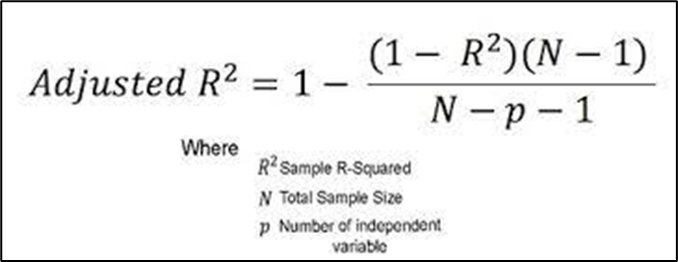

In [130]:
xtrain.shape

(1168, 161)

In [131]:
xtrain.shape[0]

1168

In [132]:
xtrain.shape[1]

161

In [133]:
def adj_r2(xtrain, ytrain, model):
    # Get the r2 score
    r2 = model.score(xtrain, ytrain)
    # Get number of rows and columns
    N = xtrain.shape[0]
    p = xtrain.shape[1]
    # Calculate r2_adjusted
    num = (1-r2)*(N-1)
    den = N-p-1
    r2_adj = 1 - num/den
    return r2_adj

In [134]:
from PM3func import adj_r2

In [135]:
adj_r2(xtrain, ytrain, model)

0.9143447489718801


### Predict results for train and test

In [136]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [137]:
ypred_tr[0:5]

array([[ 58242.],
       [124110.],
       [153428.],
       [221190.],
       [215994.]])

In [138]:
ytrain.head()

SalePrice
710       52000
1098     128000
1286     143000
992      187000
631      209500

In [139]:
ypred_ts[0:5]

array([[187630.],
       [204510.],
       [231410.],
       [213812.],
       [ 79824.]])

In [140]:
ytest.head()

SalePrice
880      157000
605      205000
1166     245350
216      210000
970      135000

### Apply the ridge regularization

In [141]:
from sklearn.linear_model import Ridge
model1 = Ridge(alpha=10)
model1.fit(xtrain, ytrain)

Ridge(alpha=10)

In [142]:
model1.score(xtrain, ytrain)

0.8904434946572907

In [143]:
model1.score(xtest, ytest)

0.834233487257064

In [144]:
evaluate_model(xtrain, ytrain, model1)

Mean squared Error :678037051.95
Root Mean squared Error : 26039.14
Mean Absolute Error : 15722.42
R2 Score : 0.8904


In [145]:
evaluate_model(xtest, ytest, model1)

Mean squared Error :1123451373.21
Root Mean squared Error : 33517.93
Mean Absolute Error : 17441.88
R2 Score : 0.8342


### 5- Fold Cross Validation Apply

In [146]:
from sklearn.model_selection import cross_val_score

In [147]:
r2_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='r2')
r2_scores

array([-2.12330725e+20, -1.34295720e+17,  9.08746154e-01, -4.62634869e+19,
       -4.87699564e+17])

In [148]:
r2_scores.mean()

-5.184324152006767e+19

In [149]:
mse_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='neg_mean_squared_error')
mse_scores

array([-1.37184142e+30, -7.97358335e+26, -4.76174715e+08, -3.32995534e+29,
       -2.94435455e+27])

In [150]:
mse_scores.mean()

-3.417157331731124e+29

In [151]:
rmse_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores

array([-1.17125634e+15, -2.82375342e+13, -2.18214279e+04, -5.77057652e+14,
       -5.42619070e+13])

In [152]:
rmse_scores.mean()

-366162687095964.2

In [153]:
mae_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='neg_mean_absolute_error')
mae_scores

array([-1.65854054e+14, -3.46018173e+12, -1.60811624e+04, -3.78043038e+13,
       -7.23315734e+12])

In [154]:
mae_scores.mean()

-42870339431133.516

### Creating and tuning Ridge model

In [155]:
import numpy as np
alphas = np.arange(0.1, 100, 0.1)
alphas

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15

In [156]:
params = {'alpha':alphas}

In [157]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rr = Ridge()
gscv1 = GridSearchCV(rr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv1.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [158]:
gscv1.best_params_

{'alpha': 23.1}

In [159]:
gscv1.best_score_

-968851588.2212203

In [160]:
best_ridge = gscv1.best_estimator_
best_ridge

Ridge(alpha=23.1)

In [161]:
best_ridge.score(xtrain, ytrain)

0.8829393478410554

In [162]:
best_ridge.score(xtest, ytest)

0.8302526194040343

In [163]:
r2_scores1 = cross_val_score(best_ridge, xtrain, ytrain, cv=5, scoring='r2')
r2_scores1

array([0.66548075, 0.84803232, 0.90385186, 0.8791327 , 0.93225426])

In [164]:
r2_scores1.mean()

0.845750378892375

In [165]:
evaluate_model(xtrain, ytrain, best_ridge)

Mean squared Error :724479657.70
Root Mean squared Error : 26916.16
Mean Absolute Error : 15989.09
R2 Score : 0.8829


In [166]:
evaluate_model(xtest, ytest, best_ridge)

Mean squared Error :1150430956.61
Root Mean squared Error : 33918.00
Mean Absolute Error : 17601.28
R2 Score : 0.8303


### Hyperparameter tuning lasso model

In [167]:
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [168]:
from sklearn.linear_model import Lasso
ls = Lasso()
gscv2 = GridSearchCV(ls, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv2.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [169]:
gscv2.best_params_

{'alpha': 99.9}

In [170]:
gscv2.best_score_

-921871228.1669109

In [171]:
best_lasso = gscv2.best_estimator_
best_lasso

Lasso(alpha=99.9)

In [172]:
best_lasso.score(xtrain, ytrain)

0.9157339094671896

In [173]:
best_lasso.score(xtest, ytest)

0.8246903740491083

In [174]:
evaluate_model(xtrain, ytrain, best_lasso)

Mean squared Error :521516558.29
Root Mean squared Error : 22836.74
Mean Absolute Error : 15300.29
R2 Score : 0.9157


In [175]:
evaluate_model(xtest, ytest, best_lasso)

Mean squared Error :1188128028.71
Root Mean squared Error : 34469.23
Mean Absolute Error : 17536.51
R2 Score : 0.8247


### Predict results for train and test

In [176]:
ypred_tr = best_ridge.predict(xtrain)
ypred_ts = best_ridge.predict(xtest)

In [177]:
ypred_tr[0:5]

array([[ 62930.54731617],
       [107078.69315917],
       [168133.90582424],
       [221871.82008054],
       [220268.04098322]])

In [178]:
ytrain.head()

SalePrice
710       52000
1098     128000
1286     143000
992      187000
631      209500

In [179]:
ypred_ts[0:5]

array([[173974.5250194 ],
       [207976.53627134],
       [238297.5171462 ],
       [213290.17997713],
       [ 80920.04547752]])

In [180]:
ytest.head()

SalePrice
880      157000
605      205000
1166     245350
216      210000
970      135000

### Select ridge model because it has high r2 score in test results

### Out of sample predictions with best ridge model

In [181]:
xnew = pd.read_csv('sample_set.csv')

In [182]:
xnew.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [185]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'YearRemodAdd',
                                  'MasVnrArea', 'BsmtFinSF1', 'GrLivArea',
                                  'BsmtFullBath', 'Fireplaces', 'GarageCars',
                                  'WoodDeckSF', 'ScreenPorch', 'PoolArea',
                                  'YrSold']),
                                ('cat',
                                 Pipelin...
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Street', 'LandContour', 'Utilities',
                                  'Neighborhood', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'MasVnrType', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'HeatingQC', 'KitchenQual',
                                  'Functional', 'GarageCond', 'PavedDrive',
                                  'Fence', 'MiscFeature'])])

### To Preprocess out of sample data pre.transform

In [187]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0        -0.872563      0.110763         -0.795151          0.381743   
1        -0.872563      0.375850         -0.071836          0.381743   
2         0.073375      0.332053         -0.795151         -0.517200   
3         0.073375     -0.054002         -0.071836          0.381743   
4         1.492282     -0.552407          1.374795         -0.517200   

   num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  num__BsmtFinSF1  \
0       -0.340077          -1.156380        -0.570750         0.053428   
1       -0.439440          -1.301740         0.027027         1.051363   
2        0.852269           0.636400        -0.570750         0.761852   
3        0.885390           0.636400        -0.460051         0.347326   
4        0.686666           0.345679        -0.570750        -0.396190   

   num__GrLivArea  num__BsmtFullBath  ...  cat__Fence_GdPrv  cat__Fence_GdWo  \
0       -1.179256          -0.819964  ...               0.0              0.0   
1       -0.354966          -0.819964  ...               0.0              0.0   
2        0.216136          -0.819964  ...               0.0              0.0   
3        0.168544          -0.819964  ...               0.0              0.0   
4       -0.448246          -0.819964  ...               0.0              0.0   

   cat__Fence_MnPrv  cat__Fence_MnWw  cat__Fence_NotAvailable  \
0               1.0              0.0                      0.0   
1               0.0              0.0                      1.0   
2               1.0              0.0                      0.0   
3               0.0              0.0                      1.0   
4               0.0              0.0                      1.0   

   cat__MiscFeature_Gar2  cat__MiscFeature_NotAvailable  \
0                    0.0                            1.0   
1                    1.0                            0.0   
2                    0.0                            1.0   
3                    0.0                            1.0   
4                    0.0                            1.0   

   cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  
0                    0.0                    0.0                    0.0  
1                    0.0                    0.0                    0.0  
2                    0.0                    0.0                    0.0  
3                    0.0                    0.0                    0.0  
4                    0.0                    0.0                    0.0  

[5 rows x 161 columns]

### predict the results

In [188]:
preds = best_ridge.predict(xnew_pre)
preds[0:5]

array([[117390.02616695],
       [148256.89197378],
       [173120.06930687],
       [181845.80319292],
       [195707.69872992]])

### Save above results in dataframe

In [191]:
df_final = xnew[['Id']]
df_final

Id
0     1461
1     1462
2     1463
3     1464
4     1465
...    ...
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]

In [192]:
df_final['SalePrice_pred']=preds

In [ ]:
df_final['SalePrice_pred'] = df_final['SalePrice_pred'].apply(round, args=(2,1))

In [193]:
df_final

Id  SalePrice_pred
0     1461   117390.026167
1     1462   148256.891974
2     1463   173120.069307
3     1464   181845.803193
4     1465   195707.698730
...    ...             ...
1454  2915    81468.346324
1455  2916    79685.015247
1456  2917   175343.831702
1457  2918   110773.856630
1458  2919   222393.428874

[1459 rows x 2 columns]

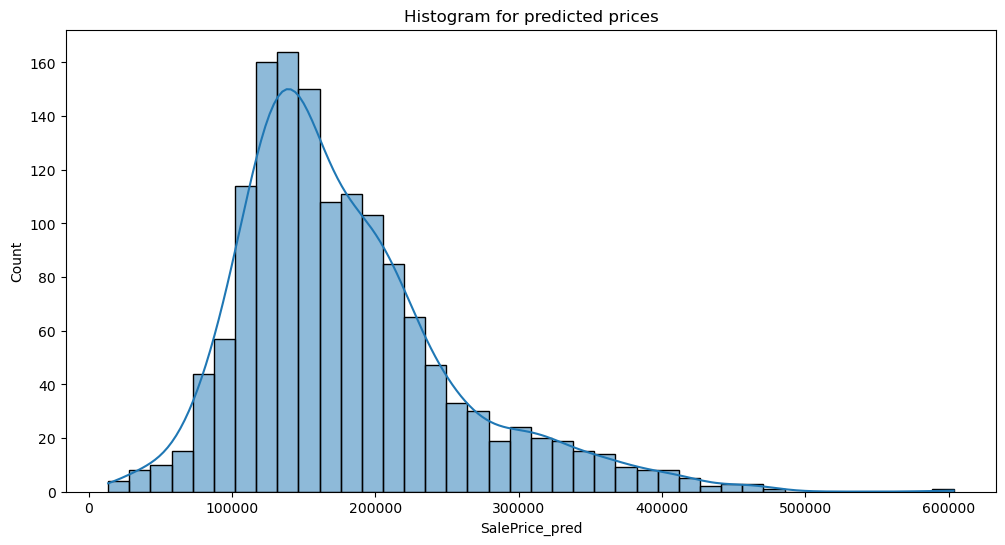

In [194]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_final, x='SalePrice_pred', kde=True)
plt.title('Histogram for predicted prices')
plt.show()

### Save above results to csv

In [195]:
df_final.to_csv('ResultSalePrice.csv', index=False)